# ART-Reproduce-Main01
## 1. Preps
### 1.1 Imports

In [1]:
from __future__ import division
import math
from math import *
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn as sns
import theano
import warnings
from numpy.random import binomial, randn, uniform
from sklearn.model_selection import train_test_split

from scipy.stats import norm
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
from hpd import *


Bad key "text.kerning_factor" on line 4 in
C:\Anaconda2\envs\rdkit-env-3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


### 1.2 Other Stuff

In [2]:
# %matplotlib inline
sns.set()
warnings.filterwarnings('ignore')
import sys
print("%s/%s" %(sys._getframe().f_code.co_filename, sys._getframe().f_code.co_name))

<ipython-input-2-b9eb80f85e32>/<module>


## 2. Create Synthetic Data

### 2.1

In [3]:
#--------------------------------------------------------------------------------#
#--------------------------------------------------------------------------------#
# Inputs to be changed
x_dimension=10 #<<<<<
x_mean, x_std, n_data = 5, 5, 50 #<<<<<
sd_test_y_noise = 0.2 #<<<<<
#Function_test="easy"
Function_test="medium"
#Function_test="dffclt"

#--------------------------------------------------------------------------------#
#--------------------------------------------------------------------------------#
#----------------------------------------#
# Basic parameters
#x_dimension=5 #<<<<<
#test_x_vec=np.array([1,2,3])
n_predictors=x_dimension
#----------------------------------------#
def F_easy(x_vec):
    dms=len(x_vec) # dms : dimension
    return 0 - ( np.linalg.norm(x_vec-np.ones(dms)*5) )**2 / dms + math.exp( 0-(np.linalg.norm(x_vec))**2 ) + 25

def F_medium(x_vec):
    dms=len(x_vec) # dms : dimension
    return  (np.linalg.norm(x_vec,4))**4 / dms - 16 * (np.linalg.norm(x_vec))**2 / dms + 5 * np.sum(x_vec) / dms

def F_dffclt(x_vec):
    dms=len(x_vec)
    return np.sum( [ (x_i**(1/2))*math.sin(x_i) for x_i in list(x_vec) ] )

#----------------------------------------#
if Function_test=="dffclt":
    # Random X values:
    np.random.seed(1)
    #x_mean, x_std, n_data = 5, 5, 54 #<<<<<
    #x_test_np_array = norm.rvs(x_mean, x_std, n_predictors*n_data).reshape(n_data, -1) # n_data was 100 here
    x_test_np_array = np.random.uniform(low=0.0, high=12.0, size=n_predictors*n_data).reshape(n_data, -1) # n_data was 100 here
    
    print("norm.rvs generated x_test_np_array: \n",x_test_np_array[0:5],"\n",x_test_np_array.shape,"\n......\n\n")
    x_test_df = pd.DataFrame(x_test_np_array, columns=['X%s' % i for i in range(0, n_predictors)])
    print("dataframe x_test_df: \n",x_test_df.head(5),"\n",x_test_df.shape,"\n......\n\n")

    # Random Y values generated from linear model with true parameter values:
    #sd_test_y_noise = 0.2 #<<<<<
    tau_test_y_noise = 1/sd_test_y_noise**2
    y_test_np_array = np.array( [ F_dffclt(x_n) + norm.rvs(0, sd_test_y_noise) for x_n in list(x_test_np_array) ] )
    #y_test_np_array = np.array( [ F_dffclt(x_n) for x_n in list(x_test_np_array) ] )
    print("y_test_np_array: \n",y_test_np_array,"\n",y_test_np_array.shape,"\n\n")

    n_vali=10
    #x_vali_np_array = norm.rvs(x_mean, x_std, n_predictors*n_vali).reshape(n_vali, -1)
    x_vali_np_array = np.random.uniform(low=0.0, high=12.0, size=n_predictors*n_vali).reshape(n_vali, -1)
    print(x_vali_np_array)
    y_vali_np_array = np.array( [ F_dffclt(x_n) + norm.rvs(0, sd_test_y_noise) for x_n in list(x_vali_np_array) ] )

if Function_test=="medium":
    # Random X values:
    np.random.seed(1)
    #x_mean, x_std, n_data = 5, 5, 54 #<<<<<
    #x_test_np_array = norm.rvs(x_mean, x_std, n_predictors*n_data).reshape(n_data, -1) # n_data was 100 here
    x_test_np_array = np.random.uniform(low=-4.0, high=4.0, size=n_predictors*n_data).reshape(n_data, -1) # n_data was 100 here

    
    '''
    n_data=n_data+len(x_recommend)
    x_test_np_array=np.append(x_test_np_array, x_recommend).reshape(n_data, -1)
    '''
    
    
    print("norm.rvs generated x_test_np_array: \n",x_test_np_array[0:5],"\n",x_test_np_array.shape,"\n......\n\n")
    x_test_df = pd.DataFrame(x_test_np_array, columns=['X%s' % i for i in range(0, n_predictors)])
    print("dataframe x_test_df: \n",x_test_df.head(5),"\n",x_test_df.shape,"\n......\n\n")

    # Random Y values generated from linear model with true parameter values:
    #sd_test_y_noise = 0.2 #<<<<<
    tau_test_y_noise = 1/sd_test_y_noise**2
    y_test_np_array = np.array( [ F_medium(x_n) + norm.rvs(0, sd_test_y_noise) for x_n in list(x_test_np_array) ] )
    #y_test_np_array = np.array( [ F_medium(x_n) for x_n in list(x_test_np_array) ] )
    print("y_test_np_array: \n",y_test_np_array,"\n",y_test_np_array.shape,"\n\n")

    n_vali=10
    #x_vali_np_array = norm.rvs(x_mean, x_std, n_predictors*n_vali).reshape(n_vali, -1)
    x_vali_np_array = np.random.uniform(low=-4.0, high=4.0, size=n_predictors*n_vali).reshape(n_vali, -1)
    print(x_vali_np_array)
    y_vali_np_array = np.array( [ F_medium(x_n) + norm.rvs(0, sd_test_y_noise) for x_n in list(x_vali_np_array) ] )
    
if Function_test=="easy":
    # Random X values:
    np.random.seed(1)
    #x_mean, x_std, n_data = 5, 5, 54 #<<<<<
    #x_test_np_array = norm.rvs(x_mean, x_std, n_predictors*n_data).reshape(n_data, -1) # n_data was 100 here
    x_test_np_array = np.random.uniform(low=-5.0, high=10.0, size=n_predictors*n_data).reshape(n_data, -1) # n_data was 100 here

    print("norm.rvs generated x_test_np_array: \n",x_test_np_array[0:5],"\n",x_test_np_array.shape,"\n......\n\n")
    x_test_df = pd.DataFrame(x_test_np_array, columns=['X%s' % i for i in range(0, n_predictors)])
    print("dataframe x_test_df: \n",x_test_df.head(5),"\n",x_test_df.shape,"\n......\n\n")

    # Random Y values generated from linear model with true parameter values:
    #sd_test_y_noise = 0.2 #<<<<<
    tau_test_y_noise = 1/sd_test_y_noise**2
    y_test_np_array = np.array( [ F_easy(x_n) + norm.rvs(0, sd_test_y_noise) for x_n in list(x_test_np_array) ] )
    #y_test_np_array = np.array( [ F_easy(x_n) for x_n in list(x_test_np_array) ] )
    print("y_test_np_array: \n",y_test_np_array,"\n",y_test_np_array.shape,"\n\n")

    n_vali=10
    #x_vali_np_array = norm.rvs(x_mean, x_std, n_predictors*n_vali).reshape(n_vali, -1)
    x_vali_np_array = np.random.uniform(low=-5.0, high=10.0, size=n_predictors*n_vali).reshape(n_vali, -1)
    print(x_vali_np_array)
    y_vali_np_array = np.array( [ F_easy(x_n) + norm.rvs(0, sd_test_y_noise) for x_n in list(x_vali_np_array) ] )
    
    


norm.rvs generated x_test_np_array: 
 [[-0.66382396  1.76259595 -3.999085   -1.58133942 -2.82595287 -3.26129124
  -2.50991831 -1.23551418 -0.82586021  0.31053387]
 [-0.64644388  1.481756   -2.364382    3.02493949 -3.78089925  1.36374008
  -0.66156158  0.46951863 -2.87690449 -2.41518809]
 [ 2.40595655  3.74609261 -1.49260657  1.53858093  3.01111322  3.15685331
  -3.31964631 -3.68756173 -2.64135664  3.02514003]
 [-3.21322533 -0.631139    3.66311624  0.26532228  1.53501691 -1.47587495
   1.49200742  2.67700538 -3.85369378  2.00115452]
 [ 3.91088871  1.98532524 -1.75644806  2.31423463 -3.17419195 -0.41685179
   3.26876402 -1.65108681 -1.69779729 -2.95977142]] 
 (50, 10) 
......


dataframe x_test_df: 
          X0        X1        X2        X3        X4        X5        X6  \
0 -0.663824  1.762596 -3.999085 -1.581339 -2.825953 -3.261291 -2.509918   
1 -0.646444  1.481756 -2.364382  3.024939 -3.780899  1.363740 -0.661562   
2  2.405957  3.746093 -1.492607  1.538581  3.011113  3.156853 -3.31

### 2.2  Prepare for level 0 learning

In [4]:
#--------------------------------------------------------------------------------#
#--------------------------------------------------------------------------------#
# Obtain Train/CV set for ML models based on following variables
x_test_np_array
x_test_df
y_test_np_array
x_dimension
n_data
#--------------------------------------------------------------------------------#
#--------------------------------------------------------------------------------#
K_CV=5 #<<<<<
train_cv_dataset_list_x=[[] for i in range(K_CV)]
train_cv_dataset_list_y=[[] for i in range(K_CV)]
def get_train_cv_index(K_CV, n_data):
    dataset_len=int(n_data/K_CV)
    index_list=[[] for i in range(K_CV)]
    for i in range(K_CV):
        index_list[i]= list(range(n_data)[i*dataset_len:i*dataset_len+dataset_len])
    index_list[-1] = list(index_list[-1]) + list(range(n_data)[dataset_len*K_CV:])
    return index_list
index_list = get_train_cv_index(K_CV, n_data)


#----------------------------------------#
for i in range(K_CV):
    for j in range(n_data):
        if j not in index_list[i]:
            train_cv_dataset_list_x[i].append(x_test_np_array[j])
            train_cv_dataset_list_y[i].append(y_test_np_array[j])
    train_cv_dataset_list_x[i]=np.array(train_cv_dataset_list_x[i])
    train_cv_dataset_list_y[i]=np.array(train_cv_dataset_list_y[i])
#print(train_cv_dataset_list_y)

#----------------------------------------#
print(index_list)
print(train_cv_dataset_list_y)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [30, 31, 32, 33, 34, 35, 36, 37, 38, 39], [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]]
[array([-23.24037173, -49.40346462, -41.03783119, -30.65712134,
       -47.96750733, -37.56947107, -30.94169241, -24.43407509,
       -40.57971791, -39.35234151, -17.24434342, -40.58214477,
       -43.10452157, -19.52389202, -34.01764704, -16.28668924,
       -28.7117195 , -24.84921912, -35.42004103, -30.52803295,
       -33.99106401, -49.15279918, -26.06947609, -40.34388925,
       -39.01529661, -30.91663067, -24.45924275, -42.26668461,
       -28.07688643, -31.27648663, -36.1771179 , -34.86356179,
       -46.46230567, -28.57011923, -36.12867853, -36.27879379,
       -43.20072844, -26.08902887, -23.73337165, -33.61699404]), array([-37.14017605, -37.42549404, -45.89850959, -31.06630395,
       -41.55535216, -34.76209909, -22.63851153, -46.8283905 ,
       -26.67480077, -25.45090459, -17.2

### 2.3 Model Configuration 

In [5]:
#--------------------------------------------------------------------------------#
#--------------------------------------------------------------------------------#
# Obtain Train/CV set for ML models based on following variables
x_test_np_array
x_test_df
y_test_np_array
x_dimension
n_data

#--------------------------------------------------------------------------------#
# Prep for ML model training
ML_model_list=["RF","NN","SVM","KRR","KNN","GPR","GBR","TPOT"]

#----------------------------------------#
from sklearn.preprocessing import StandardScaler
ss1= StandardScaler()

#----------------------------------------#
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=10, max_depth=5, random_state=1)

#----------------------------------------#
from sklearn.neural_network import MLPRegressor
NN = MLPRegressor(solver='lbfgs', alpha=10, hidden_layer_sizes=(10, 4), max_iter=200, random_state=1)

#----------------------------------------#
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
steps = [		('scaler',StandardScaler()),
        		('svr',SVR())]
pipeline =Pipeline(steps)

#for grid search
c_gs =[10,100,1000,10000]
g_gs = [1e-2,1e-1,1e0]
#for random search
c_rs = np.linspace(10, 10000, num=40, endpoint=True)
g_rs = np.linspace(1e-2, 1e0, num=30, endpoint=True)
#set of parameters for grid search
parameters_gs = {'svr__C':c_gs, 'svr__gamma':g_gs, 'svr__kernel': ['rbf', 'poly']}
#set of parameters for random search
parameters_rs = {'svr__C':c_rs, 'svr__gamma':g_rs, 'svr__kernel': ['rbf', 'poly']}

from sklearn.metrics import SCORERS
#cvo = GridSearchCV(pipeline, parameters_gs, cv=7, scoring=None)
cvo = RandomizedSearchCV(pipeline, parameters_rs, cv=5, scoring=None, n_iter=50, random_state=1)

print("Start Grid Search")
#cvo.fit(x_test_np_array, y_test_np_array)
#best_C, best_kernel, best_gamma = cvo.best_params_['svr__C'], cvo.best_params_['svr__kernel'], cvo.best_params_['svr__gamma']
best_C, best_kernel, best_gamma = 522.3076923076923, "rbf", 0.01
print(best_C, best_kernel, best_gamma)
print("End Grid Search")

#SVM = SVR(C=best_C, kernel=best_kernel, gamma=best_gamma, epsilon=0.2)
SVM = SVR(C=1, kernel='poly', gamma='scale', epsilon=0.2)

#----------------------------------------#
from sklearn.kernel_ridge import KernelRidge
KRR = KernelRidge(alpha=1.0, kernel='poly')

#----------------------------------------#
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=2)

#----------------------------------------#
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, ConstantKernel, RBF
from sklearn.gaussian_process.kernels import Matern, RationalQuadratic, ExpSineSquared, DotProduct
kernels = [1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)),
           1.0 * RationalQuadratic(length_scale=1.0, alpha=0.1),
           1.0 * ExpSineSquared(length_scale=1.0, periodicity=3.0, length_scale_bounds=(0.1, 10.0),periodicity_bounds=(1.0, 10.0)), 
           ConstantKernel(0.1, (0.01, 10.0)) * (DotProduct(sigma_0=1.0, sigma_0_bounds=(0.1, 10.0)) ** 2),
           1.0 * Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0), nu=1.5),
           1.0 * DotProduct() + WhiteKernel(),
           1**2 + Matern(length_scale=2, nu=1.5) + WhiteKernel(noise_level=1)]

# 0.316**2 * DotProduct(sigma_0=1) ** 2
GPR = GaussianProcessRegressor(kernel=kernels[3], random_state=1)

#----------------------------------------#
from sklearn import ensemble
params = {'n_estimators': 500, 'max_depth': 8, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
GBR = ensemble.GradientBoostingRegressor(**params)

#----------------------------------------#
from tpot import TPOTRegressor
pipeline_optimizer = TPOTRegressor(generations=15, population_size=15, cv=K_CV, random_state=1, verbosity=2)
#pipeline_optimizer.fit(ss1.fit_transform(x_test_np_array), y_test_np_array)
#y_pred_vali=pipeline_optimizer.predict(ss1.transform(x_vali_np_array))
#pipeline_optimizer.export('tpot_exported_pipeline03.py')

Start Grid Search
522.3076923076923 rbf 0.01
End Grid Search


### 2.4 Train models for level 0 learning

In [6]:
#----------------------------------------#
ML_model_list=["RF","NN","SVM","KRR","KNN","GPR","GBR","pipeline_optimizer"]
y_predictions_list=[[] for i in y_test_np_array]
for current_model in ML_model_list:
    for i in range(len(index_list)):
        one_index_set=index_list[i]
        x_train=train_cv_dataset_list_x[i]
        y_train=train_cv_dataset_list_y[i]
        locals()[current_model].fit(ss1.fit_transform(x_train), y_train)
        for j in one_index_set:
            y_pred=locals()[current_model].predict(ss1.transform(x_test_np_array[j].reshape(1, -1)))
            y_predictions_list[j].append( y_pred[0] )
y_predictions_nparray=np.array(y_predictions_list)

Generation 1 - Current best internal CV score: -46.65303650134073
Generation 2 - Current best internal CV score: -46.65303650134073
Generation 3 - Current best internal CV score: -46.65303650134073
Generation 4 - Current best internal CV score: -41.391004496020635
Generation 5 - Current best internal CV score: -41.391004496020635
Generation 6 - Current best internal CV score: -41.391004496020635
Generation 7 - Current best internal CV score: -37.89411284350071
Generation 8 - Current best internal CV score: -37.89411284350071
Generation 9 - Current best internal CV score: -36.428540062127375
Generation 10 - Current best internal CV score: -36.428540062127375
Generation 11 - Current best internal CV score: -36.428540062127375
Generation 12 - Current best internal CV score: -36.428540062127375
Generation 13 - Current best internal CV score: -36.428540062127375
Generation 14 - Current best internal CV score: -36.428540062127375
Generation 15 - Current best internal CV score: -36.4285400621

Generation 1 - Current best internal CV score: -58.648183187392206
Generation 2 - Current best internal CV score: -57.997335833561976
Generation 3 - Current best internal CV score: -57.997335833561976
Generation 4 - Current best internal CV score: -53.94730871364
Generation 5 - Current best internal CV score: -45.694947481704716
Generation 6 - Current best internal CV score: -45.694947481704716
Generation 7 - Current best internal CV score: -45.694947481704716
Generation 8 - Current best internal CV score: -45.694947481704716
Generation 9 - Current best internal CV score: -45.694947481704716
Generation 10 - Current best internal CV score: -42.362895777129175
Generation 11 - Current best internal CV score: -42.362895777129175
Generation 12 - Current best internal CV score: -41.1257119487772
Generation 13 - Current best internal CV score: -41.1257119487772
Generation 14 - Current best internal CV score: -41.1257119487772
Generation 15 - Current best internal CV score: -35.57695482292068


Generation 1 - Current best internal CV score: -39.74070592596848
Generation 2 - Current best internal CV score: -39.74070592596848
Generation 3 - Current best internal CV score: -39.74070592596848
Generation 4 - Current best internal CV score: -39.74070592596848
Generation 5 - Current best internal CV score: -34.787784389003086
Generation 6 - Current best internal CV score: -34.787784389003086
Generation 7 - Current best internal CV score: -34.787784389003086
Generation 8 - Current best internal CV score: -34.787784389003086
Generation 9 - Current best internal CV score: -34.787784389003086
Generation 10 - Current best internal CV score: -34.787784389003086
Generation 11 - Current best internal CV score: -34.787784389003086
Generation 12 - Current best internal CV score: -34.787784389003086
Generation 13 - Current best internal CV score: -32.36877044970719
Generation 14 - Current best internal CV score: -32.36877044970719
Generation 15 - Current best internal CV score: -32.36877044970

Generation 1 - Current best internal CV score: -51.27730822530528
Generation 2 - Current best internal CV score: -51.27730822530528
Generation 3 - Current best internal CV score: -51.27730822530528
Generation 4 - Current best internal CV score: -51.27730822530528
Generation 5 - Current best internal CV score: -51.27730822530528
Generation 6 - Current best internal CV score: -50.89088985669227
Generation 7 - Current best internal CV score: -50.739058700455544
Generation 8 - Current best internal CV score: -50.739058700455544
Generation 9 - Current best internal CV score: -49.822529887291864
Generation 10 - Current best internal CV score: -49.822529887291864
Generation 11 - Current best internal CV score: -44.68965947390373
Generation 12 - Current best internal CV score: -44.68965947390373
Generation 13 - Current best internal CV score: -44.68965947390373
Generation 14 - Current best internal CV score: -44.68965947390373
Generation 15 - Current best internal CV score: -44.68965947390373


Generation 1 - Current best internal CV score: -63.90143140530188
Generation 2 - Current best internal CV score: -63.90143140530188
Generation 3 - Current best internal CV score: -63.90143140530188
Generation 4 - Current best internal CV score: -63.90143140530188
Generation 5 - Current best internal CV score: -47.37753975912537
Generation 6 - Current best internal CV score: -47.37753975912537
Generation 7 - Current best internal CV score: -47.37753975912537
Generation 8 - Current best internal CV score: -47.37753975912537
Generation 9 - Current best internal CV score: -47.37753975912537
Generation 10 - Current best internal CV score: -47.37753975912537
Generation 11 - Current best internal CV score: -47.258382276264484
Generation 12 - Current best internal CV score: -47.258382276264484
Generation 13 - Current best internal CV score: -46.36897604297165
Generation 14 - Current best internal CV score: -46.36897604297165
Generation 15 - Current best internal CV score: -46.36897604297165

B

In [7]:
y_predictions_nparray

array([[-37.92759829, -37.42786259, -35.03086368, -35.99576317,
        -37.01849171, -28.75284283, -44.34716749, -47.92097264],
       [-38.79065538, -35.13029873, -35.05991672, -27.29603131,
        -26.23190357, -20.81663678, -44.70200435, -41.79258799],
       [-29.88580756, -28.46478032, -33.51071205, -35.27459941,
        -30.51316851, -46.7310242 , -34.29970459, -29.14478724],
       [-30.13779532, -22.89139927, -33.75959599, -22.72962249,
        -26.46305278, -22.87209236, -21.39694775, -27.35390502],
       [-31.91055318, -40.98493094, -35.52483992, -42.8032228 ,
        -36.50318031, -52.57896182, -37.31822232, -50.0613674 ],
       [-39.21501292, -51.25172389, -34.05673053, -38.80982135,
        -34.63510227, -43.0202654 , -36.8970863 , -39.04015333],
       [-30.92911309, -39.40012737, -34.77494188, -34.00182043,
        -36.21651643, -31.69174245, -34.77436615, -35.3079619 ],
       [-40.00136346, -27.18224702, -34.25988757, -28.47886754,
        -36.59165764, -29.6246903

## 3. Ensemble Model
### 3.1

,X0,X1,X2,X3,X4,X5,X6,X7,y
0,-37.927598,-37.427863,-35.030864,-35.995763,-37.018492,-28.752843,-44.347167,-47.920973,-37.140176
1,-38.790655,-35.130299,-35.059917,-27.296031,-26.231904,-20.816637,-44.702004,-41.792588,-37.425494
2,-29.885808,-28.464780,-33.510712,-35.274599,-30.513169,-46.731024,-34.299705,-29.144787,-45.898510
3,-30.137795,-22.891399,-33.759596,-22.729622,-26.463053,-22.872092,-21.396948,-27.353905,-31.066304
4,-31.910553,-40.984931,-35.524840,-42.803223,-36.503180,-52.578962,-37.318222,-50.061367,-41.555352
5,-39.215013,-51.251724,-34.056731,-38.809821,-34.635102,-43.020265,-36.897086,-39.040153,-34.762099
6,-30.929113,-39.400127,-34.774942,-34.001820,-36.216516,-31.691742,-34.774366,-35.307962,-22.638512
7,-40.001363,-27.182247,-34.259888,-28.478868,-36.591658,-29.624690,-42.270065,-44.467831,-46.828391
8,-34.082663,-34.274561,-34.410589,-32.458376,-37.999879,-34.806687,-42.607313,-25.696655,-26.674801
9,-30.058311,-28.584299,-33.803692,-27.485708,-26.255481,-26.610823,-16.909382,-18.701487,-25.450905


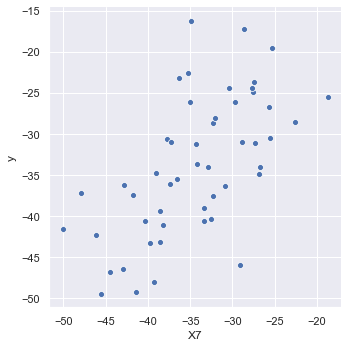

In [8]:
num_ML_models=len(ML_model_list)
z_level_1_learner = pd.DataFrame(y_predictions_nparray, columns=['X%s' % i for i in range(0, num_ML_models)])
y_level_1_learner = y_test_np_array

model_data=z_level_1_learner.copy()
df_y=pd.DataFrame(y_level_1_learner)
df_y.columns=["y"]
model_data["y"]=df_y

display(model_data.head(20))
_ = sns.relplot(x='X7', y='y', data=model_data)


In [9]:
x_train=model_data.drop(["y"],axis=1)

y_tensor = theano.shared(model_data.y.values.astype('float64'))
x_tensor = theano.shared(x_train.values.astype('float64'))
print(x_tensor)


<TensorType(float64, matrix)>


In [10]:
with pm.Model() as model:
    
    # define the priors
    beta1 = pm.Dirichlet('beta1', a=np.array([1]*num_ML_models), shape=num_ML_models)
    sd = pm.HalfNormal('sd', 10)

    # define the likelihood
    mu = pm.math.dot(beta1, x_tensor.T)
    yl = pm.Normal('yl', mu, sd, observed=y_tensor)

In [11]:
# Generate a MCMC chain
with model:
    hmc_trace = pm.sample(draws=5000, tune=1000, cores=6)
    #trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (6 chains in 6 jobs)
NUTS: [sd, beta1]
Sampling 6 chains, 0 divergences: 100%|██████████████████████████████████████| 36000/36000 [00:51<00:00, 699.72draws/s]


,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
beta1[0],0.107,0.092,0.000,0.274,0.001,0.000,33108.0,31675.0,22601.0,14708.0,1.0
beta1[1],0.040,0.039,0.000,0.110,0.000,0.000,35198.0,30133.0,24266.0,13907.0,1.0
beta1[2],0.114,0.092,0.000,0.282,0.000,0.000,38153.0,33979.0,28232.0,15097.0,1.0
beta1[3],0.071,0.064,0.000,0.189,0.000,0.000,40652.0,32545.0,30740.0,16126.0,1.0
beta1[4],0.078,0.068,0.000,0.204,0.000,0.000,38320.0,31039.0,28630.0,15265.0,1.0
beta1[5],0.067,0.055,0.000,0.167,0.000,0.000,38869.0,34108.0,29490.0,16135.0,1.0
beta1[6],0.131,0.096,0.000,0.304,0.000,0.000,39968.0,34223.0,32311.0,15805.0,1.0
beta1[7],0.392,0.144,0.112,0.655,0.001,0.001,33104.0,33104.0,33243.0,20474.0,1.0
sd,7.089,0.768,5.707,8.548,0.005,0.003,27996.0,27056.0,28956.0,20907.0,1.0


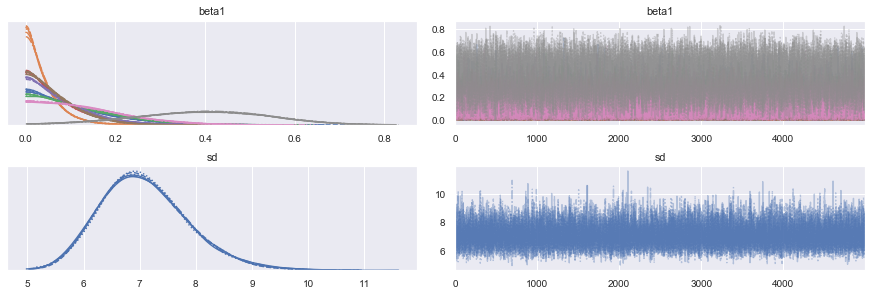

In [12]:
pm.traceplot(hmc_trace)
pm.summary(hmc_trace)

In [13]:
map_tensor_batch = {y_tensor: pm.Minibatch(model_data.y.values.astype('float64'), n_data),
                    x_tensor: pm.Minibatch(x_train.values.astype('float64'), n_data)}
with model:
    advi_fit = pm.fit(method=pm.ADVI(), n=30000,
                      more_replacements=map_tensor_batch)

Average Loss = 173.31: 100%|███████████████████████████████████████████████████| 30000/30000 [00:15<00:00, 1883.20it/s]
Finished [100%]: Average Loss = 173.27


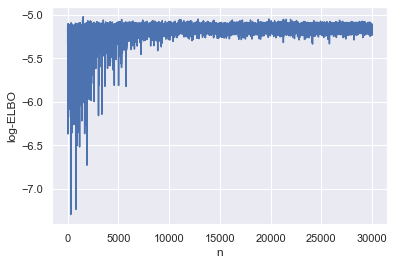

In [14]:
advi_elbo = pd.DataFrame(
    {'log-ELBO': -np.log(advi_fit.hist),
     'n': np.arange(advi_fit.hist.shape[0])})

_ = sns.lineplot(y='log-ELBO', x='n', data=advi_elbo)

arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNIN

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
beta1[0],0.131,0.133,0.001,0.386,0.001,0.001,9867.0,9867.0,9937.0,9877.0,NaN
beta1[1],0.050,0.063,0.000,0.160,0.001,0.000,10142.0,9613.0,9856.0,10056.0,NaN
beta1[2],0.128,0.119,0.002,0.356,0.001,0.001,10066.0,9812.0,10175.0,9766.0,NaN
beta1[3],0.083,0.093,0.000,0.259,0.001,0.001,10094.0,10094.0,10047.0,9645.0,NaN
beta1[4],0.087,0.092,0.001,0.265,0.001,0.001,9651.0,9536.0,9475.0,9322.0,NaN
beta1[5],0.071,0.075,0.000,0.207,0.001,0.001,9613.0,9613.0,9784.0,9707.0,NaN
beta1[6],0.126,0.112,0.000,0.340,0.001,0.001,9745.0,9743.0,9527.0,9919.0,NaN
beta1[7],0.324,0.158,0.041,0.603,0.002,0.001,10048.0,10048.0,10048.0,9266.0,NaN
sd,7.309,0.869,5.719,8.923,0.009,0.006,9902.0,9863.0,9937.0,9600.0,NaN


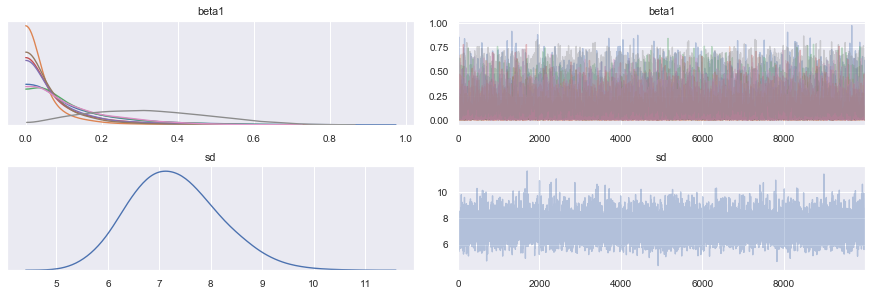

In [15]:
advi_trace = advi_fit.sample(10000)
pm.traceplot(advi_trace)
pm.summary(advi_trace)

In [16]:
y_pred_compare_with_real=[]
for i in range(n_data):
    #print(x_train[i:i+1])
    x_tensor.set_value(x_train[i:i+1].values)
    hmc_posterior_pred = pm.sample_posterior_predictive(hmc_trace, 50, model)
    #print(hmc_posterior_pred['yl'].shape)
    print(np.mean(hmc_posterior_pred['yl']), y_test_np_array[i])
    y_pred_compare_with_real.append(np.mean(hmc_posterior_pred['yl']))

 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.82it/s]

-41.595460070353894 -37.14017605479541


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 69.73it/s]

-36.95674347030885 -37.42549403917103


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.92it/s]

-32.08388456478055 -45.89850959376511


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.13it/s]

-27.006086605202423 -31.066303954485623


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.97it/s]

-42.682164094435365 -41.555352156004105


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-38.619908398232425 -34.76209908815369


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.97it/s]

-34.40266250494169 -22.638511528261265


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.64it/s]

-38.77774168249901 -46.82839050061368


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 69.15it/s]

-32.10882008429556 -26.674800769085866


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.99it/s]

-23.734213045409014 -25.450904587990326


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.19it/s]

-30.26486430681802 -23.240371726407798


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 76.38it/s]

-37.54516961311718 -49.40346462056494


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.92it/s]

-39.14359120506659 -41.03783118518995


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 76.38it/s]

-35.84027804062633 -30.657121339503146


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.47it/s]

-38.897994265610095 -47.96750732762544


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.97it/s]

-32.08414504335173 -37.56947106966904


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.60it/s]

-30.683783471909816 -30.9416924100941


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 75.22it/s]

-29.483032579259902 -24.43407509098518


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 66.56it/s]

-30.226595567697142 -40.57971791430612


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 75.67it/s]

-31.381563411905333 -39.35234151274372


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.88it/s]

-30.473556598504917 -17.24434341825947


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.94it/s]

-39.578562890331895 -40.58214476835968


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.97it/s]

-38.00661049534308 -43.10452156896535


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.94it/s]

-27.80982345997299 -19.523892021805928


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.62it/s]

-30.755056558699916 -34.01764703855052


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.99it/s]

-33.78541474803097 -16.28668923775601


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 76.39it/s]

-31.270840290524436 -28.711719498908323


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.27it/s]

-28.484928088156337 -24.849219122675148


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 76.39it/s]

-34.853870861135064 -35.42004102632523


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.85it/s]

-28.54298295072593 -30.52803294613477


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.20it/s]

-26.76373129503518 -33.991064009215364


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.03it/s]

-39.099069876124894 -49.15279917628573


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.59it/s]

-31.92666190808905 -26.06947609257748


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.26it/s]

-35.09367782372215 -40.343889253474075


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.60it/s]

-33.01909068868308 -39.015296610736584


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.99it/s]

-35.55709962213115 -30.916630671596632


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.25it/s]

-33.46933791611379 -24.45924275293514


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.27it/s]

-45.65069856128876 -42.26668460882956


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 79.86it/s]

-30.884330255283846 -28.076886432205377


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 80.57it/s]

-35.163293384054946 -31.276486630050726


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 75.12it/s]

-40.695665767108686 -36.177117904711345


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.24it/s]

-27.87027460190956 -34.86356178563886


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.63it/s]

-39.14845333162815 -46.462305672704595


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.59it/s]

-26.25982879940218 -28.57011922848187


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.62it/s]

-36.21660953669573 -36.128678527076524


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.97it/s]

-27.776831497247727 -36.278793789938916


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.60it/s]

-35.16486894621831 -43.200728440529076


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.95it/s]

-32.28616602618588 -26.089028867379675


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.62it/s]

-29.245337879350387 -23.73337164621177


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 73.58it/s]

-31.332792271641676 -33.61699404000714


### 3.2 Make Predictions from raw x's ( x >>> z >>> y_hat )

In [17]:
np.random.seed(1)
x_new_np_array=np.random.uniform(low=-4.0, high=4.0, size=n_predictors).reshape(1, -1)

def y_hat_from_raw_x(x_new_np_array,RF,NN,SVM,KRR,KNN,GPR,GBR,pipeline_optimizer,ss1,hmc_trace):
    #print(x_new_np_array)
    ML_model_list=["RF","NN","SVM","KRR","KNN","GPR","GBR","pipeline_optimizer"]
    y_new_list=[]
    for current_model in ML_model_list:
        y_pred=locals()[current_model].predict(ss1.transform(x_new_np_array))
        y_new_list.append(y_pred[0])
    y_new_nparray=np.array([y_new_list])
    print(y_new_nparray)
    df_y_new=pd.DataFrame(y_new_nparray, columns=['X%s' % i for i in range(0, num_ML_models)])


    #print(df_y_new)
    #y_tensor.set_value(validate_data.y.values)
    x_tensor.set_value(df_y_new.values)
    hmc_posterior_pred = pm.sample_posterior_predictive(hmc_trace, 50, model)
    #print(hmc_posterior_pred['yl'].shape)
    print(np.mean(hmc_posterior_pred['yl']))
    return np.mean(hmc_posterior_pred['yl'])


y_samplings=y_hat_from_raw_x(x_new_np_array,RF,NN,SVM,KRR,KNN,GPR,GBR,pipeline_optimizer,ss1,hmc_trace)

#hmc_predictions = np.mean(y_samplings)
#hmc_predictions_std = np.std(y_samplings)

print(y_samplings)
#sns.distplot(hmc_posterior_pred['yl'])

 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 76.40it/s]

[[-33.72658798 -37.28890927 -35.57426139 -36.90013929 -31.60482607
  -37.14017605 -37.11797666 -37.673012  ]]


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 71.98it/s]

-36.170457825082636
-36.170457825082636


In [18]:
def BOUND(x,lb_x,ub_x):
    for i in range(len(x)):
        x[i,0]=max(min(ub_x[i,0],x[i,0]),lb_x[i,0])
    return x


In [19]:

def ASA(func_x,lb_x,ub_x,x_0,T0,num_steps,qf, RF,NN,SVM,KRR,KNN,GPR,GBR,pipeline_optimizer,ss1,hmc_trace):
    N=len(x_0)
    print(N, x_0)
    lk=5*N
    dx=ub_x-lb_x
    #c=2*num_steps**(1.0/N)
    c=2*exp(-qf+0.0/N)
    print ("c",c)
    x_old=x_0
    Tk=T0
    x_list=[]
    y_list=[]
    for k in range(num_steps+1)[1:]:
        for i in range(lk+1)[1:]:
            f_old=-func_x(x_old.reshape(1, -1), RF,NN,SVM,KRR,KNN,GPR,GBR,pipeline_optimizer,ss1,hmc_trace)
            u=np.random.rand(N).reshape(N,1)
            y1=np.sign(u-1.0/2)
            y2=Tk
            y3=(1+1.0/Tk)**abs(2*u-1)-1
            y=y1*y2*y3
            x=x_old+y*dx
            x=BOUND(x,lb_x,ub_x)
            f_new=-func_x(x.reshape(1, -1), RF,NN,SVM,KRR,KNN,GPR,GBR,pipeline_optimizer,ss1,hmc_trace)
            x_list.append(x.reshape(1, -1))
            y_list.append(-f_new)
            if f_new<f_old:
                x_old=x
            elif exp((f_old-f_new-0.0)/np.linalg.norm(Tk,2))>np.random.rand(1)[0]:
                x_old=x
        #print(x_old)
        #Tk=T0*exp(-c*(num_steps+1-k)**qf)
        Tk=T0*exp(-c*k**(qf+0.0/N))
        
        f_final=func_x(x_old.reshape(1, -1), RF,NN,SVM,KRR,KNN,GPR,GBR,pipeline_optimizer,ss1,hmc_trace)
        
    return x_old,f_final, x_list, y_list

x_0=np.random.uniform(low=-4.0, high=4.0, size=n_predictors).reshape(n_predictors, -1)

lb_x=np.array([-4]*n_predictors).reshape((n_predictors,1))
ub_x=np.array([4]*n_predictors).reshape((n_predictors,1))
T0=np.array([200]*n_predictors).reshape((n_predictors,1))
num_steps=10

x,f,x_list, y_list=ASA(y_hat_from_raw_x,lb_x,ub_x,x_0,T0,num_steps,0.90, RF,NN,SVM,KRR,KNN,GPR,GBR,pipeline_optimizer,ss1,hmc_trace)

 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.90it/s]

10 [[-1.35188453]
 [ 1.27767843]
 [-0.26765207]
 [ 3.03385256]
 [-1.84263787]
 [-1.16144521]
 [-1.43716568]
 [ 0.41390376]
 [-2.49424468]
 [-2.61404583]]
c 0.8131393194811982
[[-29.49849179 -28.29869147 -34.8097335  -30.30567431 -34.18359322
  -32.4667037  -16.80950157 -25.15901893]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.80it/s]

-27.265603828367336
[[-29.70692271 -30.98838898 -32.83784669 -33.74139137 -29.61987622
  -49.85784504 -30.90671616 -34.16557919]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 66.86it/s]

-33.8544567781414
[[-29.70692271 -30.98838898 -32.83784669 -33.74139137 -29.61987622
  -49.85784504 -30.90671616 -34.16557919]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 78.62it/s]

-33.38430525595531
[[-33.98337545 -46.7769984  -35.85625077 -46.77952706 -44.99280469
  -47.67589905 -36.64380099 -42.82993565]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.20it/s]

-40.72014071516761
[[-33.98337545 -46.7769984  -35.85625077 -46.77952706 -44.99280469
  -47.67589905 -36.64380099 -42.82993565]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 76.39it/s]

-41.04855463017671
[[-29.9256033  -34.04409227 -32.95571725 -30.24039155 -26.79010197
  -41.8363642  -30.85781341 -35.6740765 ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 69.74it/s]

-33.260449844718835
[[-29.9256033  -34.04409227 -32.95571725 -30.24039155 -26.79010197
  -41.8363642  -30.85781341 -35.6740765 ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.95it/s]

-33.491176070626665
[[-32.98181162 -56.03495676 -27.96432619 -52.25653811 -26.58548113
  -65.53772431 -44.71450704 -40.01341255]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 76.02it/s]

-40.37805181244901
[[-32.98181162 -56.03495676 -27.96432619 -52.25653811 -26.58548113
  -65.53772431 -44.71450704 -40.01341255]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.14it/s]

-40.33125911903925
[[-32.85089398 -43.72606916 -30.9245061  -38.4166657  -26.58548113
  -37.05123776 -44.71450704 -28.44673864]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.60it/s]

-33.16907007070058
[[-32.85089398 -43.72606916 -30.9245061  -38.4166657  -26.58548113
  -37.05123776 -44.71450704 -28.44673864]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 76.40it/s]

-33.20593227836549
[[-26.48495738 -30.32881492 -32.34196445 -23.51457016 -26.58548113
   -8.03222089 -27.69772693 -28.00830817]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.99it/s]

-26.705258344296507
[[-26.48495738 -30.32881492 -32.34196445 -23.51457016 -26.58548113
   -8.03222089 -27.69772693 -28.00830817]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.36it/s]

-26.53106896282991
[[-30.18127279 -44.4299847  -35.11876491 -47.34265623 -36.93135369
  -36.57495255 -45.57227313 -40.64671869]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.49it/s]

-39.254378287810376
[[-30.18127279 -44.4299847  -35.11876491 -47.34265623 -36.93135369
  -36.57495255 -45.57227313 -40.64671869]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.97it/s]

-39.520586446357136
[[-31.05983592 -37.31113535 -33.11238632 -29.61923572 -28.9756437
  -37.42794873 -27.9425535  -30.36360411]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 75.24it/s]

-31.118648507884767
[[-31.05983592 -37.31113535 -33.11238632 -29.61923572 -28.9756437
  -37.42794873 -27.9425535  -30.36360411]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.73it/s]

-30.972063857564383
[[-31.47083379 -42.13988409 -31.02992228 -32.41058099 -26.26806459
  -22.82518889 -27.51506402 -31.33928477]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.90it/s]

-30.591399406778276
[[-31.47083379 -42.13988409 -31.02992228 -32.41058099 -26.26806459
  -22.82518889 -27.51506402 -31.33928477]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.15it/s]

-30.40116902271654
[[-34.82749624 -46.99667691 -31.99565451 -41.20908314 -26.58548113
  -40.22260386 -44.05800109 -30.56824663]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.88it/s]

-34.56260058083144
[[-34.82749624 -46.99667691 -31.99565451 -41.20908314 -26.58548113
  -40.22260386 -44.05800109 -30.56824663]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.94it/s]

-34.594029044488515
[[-38.8316939  -39.06600802 -35.27165199 -44.43359948 -38.87251059
  -39.0643245  -39.73437378 -47.11627196]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.57it/s]

-41.78634764068045
[[-38.8316939  -39.06600802 -35.27165199 -44.43359948 -38.87251059
  -39.0643245  -39.73437378 -47.11627196]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.92it/s]

-41.87736529603379
[[-39.72885878 -58.85325351 -37.32015276 -37.75724449 -35.30300943
  -44.83960058 -28.7055826  -48.05736033]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.25it/s]

-41.91826089060215
[[-39.72885878 -58.85325351 -37.32015276 -37.75724449 -35.30300943
  -44.83960058 -28.7055826  -48.05736033]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.97it/s]

-42.04372382734414
[[-33.64426172 -40.44446536 -33.72210781 -43.3761206  -36.02098807
  -61.78199177 -47.49462833 -46.01057778]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.85it/s]

-43.10136233853939
[[-33.64426172 -40.44446536 -33.72210781 -43.3761206  -36.02098807
  -61.78199177 -47.49462833 -46.01057778]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.28it/s]

-43.158388283367444
[[-36.10114117 -35.26594118 -33.06336999 -33.44705852 -34.32830217
  -20.33372568 -45.60750494 -39.65813839]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 75.65it/s]

-36.820026097747935
[[-36.10114117 -35.26594118 -33.06336999 -33.44705852 -34.32830217
  -20.33372568 -45.60750494 -39.65813839]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.10it/s]

-37.01038663547294
[[-38.98187575 -50.28273929 -30.95119079 -46.02196459 -32.03636696
  -66.49083206 -43.73239666 -43.05631171]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.14it/s]

-42.06864782184628
[[-38.98187575 -50.28273929 -30.95119079 -46.02196459 -32.03636696
  -66.49083206 -43.73239666 -43.05631171]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.72it/s]

-42.142586609337165
[[-32.36063078 -38.73904261 -36.92204927 -41.31310216 -32.10078032
  -28.07074194 -40.38102079 -39.80460562]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.14it/s]

-37.37218672884617
[[-32.36063078 -38.73904261 -36.92204927 -41.31310216 -32.10078032
  -28.07074194 -40.38102079 -39.80460562]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 76.40it/s]

-37.15024417173259
[[-27.48806785 -30.33728757 -31.04133147 -47.40141922 -32.10078032
  -40.91833303 -24.68494022 -40.19365178]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.90it/s]

-35.01792444148171
[[-27.48806785 -30.33728757 -31.04133147 -47.40141922 -32.10078032
  -40.91833303 -24.68494022 -40.19365178]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.94it/s]

-35.271515966073004
[[-34.6021951  -24.0080659  -32.91264493 -28.43954182 -24.65423094
  -34.32445417 -44.93859306 -34.85512072]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.88it/s]

-34.228702053708425
[[-34.6021951  -24.0080659  -32.91264493 -28.43954182 -24.65423094
  -34.32445417 -44.93859306 -34.85512072]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.61it/s]

-34.16540402910624
[[-32.56452045 -25.70372755 -32.98851076 -24.29552017 -26.25548076
  -16.4899291  -28.01350205 -28.00916931]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.97it/s]

-27.93349438963166
[[-32.56452045 -25.70372755 -32.98851076 -24.29552017 -26.25548076
  -16.4899291  -28.01350205 -28.00916931]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.15it/s]

-27.82528061829349
[[-40.46054084 -40.61493505 -33.57650657 -37.96012533 -25.25177559
  -43.4296727  -28.71238495 -41.07741873]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.90it/s]

-37.36732690855183
[[-40.46054084 -40.61493505 -33.57650657 -37.96012533 -25.25177559
  -43.4296727  -28.71238495 -41.07741873]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.59it/s]

-37.33302516640775
[[-39.66729475 -38.68630458 -35.03895478 -38.20975491 -33.20668267
  -35.38719521 -42.59769231 -39.46451775]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.63it/s]

-38.502326406792896
[[-39.66729475 -38.68630458 -35.03895478 -38.20975491 -33.20668267
  -35.38719521 -42.59769231 -39.46451775]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.51it/s]

-38.49938712198119
[[-37.18324886 -36.10226414 -36.47701784 -39.64565829 -33.20668267
  -32.69852269 -28.10931011 -35.07499873]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-34.63742471824478
[[-37.18324886 -36.10226414 -36.47701784 -39.64565829 -33.20668267
  -32.69852269 -28.10931011 -35.07499873]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.16it/s]

-34.65531406372597
[[-34.99539695 -40.65519897 -34.5821889  -33.53277232 -35.9293157
  -48.84096741 -33.55741102 -34.50600714]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.83it/s]

-35.59659460678512
[[-34.99539695 -40.65519897 -34.5821889  -33.53277232 -35.9293157
  -48.84096741 -33.55741102 -34.50600714]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 60.47it/s]

-35.47563829840093
[[-39.35647445 -47.72943573 -38.40702709 -51.53369552 -44.50266926
  -55.56704723 -48.21466182 -48.37144852]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.47it/s]

-46.2645458713973
[[-39.35647445 -47.72943573 -38.40702709 -51.53369552 -44.50266926
  -55.56704723 -48.21466182 -48.37144852]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.81it/s]

-46.25485196551312
[[-40.34957531 -44.31195761 -36.41976246 -52.66637979 -40.69086022
  -51.16983676 -29.26496976 -48.76153174]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.12it/s]

-43.25451738314511
[[-40.34957531 -44.31195761 -36.41976246 -52.66637979 -40.69086022
  -51.16983676 -29.26496976 -48.76153174]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.12it/s]

-43.344618953944895
[[-37.02322541 -46.4824886  -35.91735892 -49.69626224 -40.69086022
  -48.04707217 -29.7451931  -45.88910041]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.99it/s]

-41.58419449905649
[[-37.02322541 -46.4824886  -35.91735892 -49.69626224 -40.69086022
  -48.04707217 -29.7451931  -45.88910041]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.87it/s]

-41.20774713054088
[[-38.56500403 -43.74656573 -37.43852962 -44.35330981 -44.27482605
  -37.2290137  -28.61172993 -42.95640532]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.64it/s]

-39.59619576381588
[[-38.56500403 -43.74656573 -37.43852962 -44.35330981 -44.27482605
  -37.2290137  -28.61172993 -42.95640532]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.66it/s]

-39.87031683857818
[[-38.21713428 -47.97538691 -42.46090159 -57.25387252 -42.55384169
  -72.88177038 -28.1195858  -48.20886286]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.60it/s]

-45.65206259716204
[[-38.21713428 -47.97538691 -42.46090159 -57.25387252 -42.55384169
  -72.88177038 -28.1195858  -48.20886286]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 75.27it/s]

-45.459410617453514
[[-37.72132307 -35.52375794 -34.62315357 -41.85605115 -28.67298136
  -39.98044285 -28.04971569 -39.15713062]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 76.39it/s]

-36.38612254080769
[[-37.72132307 -35.52375794 -34.62315357 -41.85605115 -28.67298136
  -39.98044285 -28.04971569 -39.15713062]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.28it/s]

-36.48454251341018
[[-35.24303381 -44.87881782 -32.65450201 -46.94598694 -36.02098807
  -55.94706671 -39.83707444 -46.79702411]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 75.98it/s]

-42.47661211813566
[[-35.24303381 -44.87881782 -32.65450201 -46.94598694 -36.02098807
  -55.94706671 -39.83707444 -46.79702411]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 69.16it/s]

-42.55867707652694
[[-34.44870128 -43.19125593 -34.21091014 -44.59103375 -26.95749908
  -53.06731239 -36.68438711 -41.27429293]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.36it/s]

-38.92077282537018
[[-34.44870128 -43.19125593 -34.21091014 -44.59103375 -26.95749908
  -53.06731239 -36.68438711 -41.27429293]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.91it/s]

-38.96147619717148
[[-29.49693756 -32.9272042  -32.9530844  -27.51584817 -30.78687601
  -14.86207903 -27.23543634 -27.72795506]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.40it/s]

-28.345911203193573
[[-29.49693756 -32.9272042  -32.9530844  -27.51584817 -30.78687601
  -14.86207903 -27.23543634 -27.72795506]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.59it/s]

-28.252497106680273
[[-38.87299581 -49.46707319 -36.23969797 -55.65923351 -35.64279083
  -64.71160746 -40.5224926  -46.5530332 ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.92it/s]

-44.83326225355048
[[-38.87299581 -49.46707319 -36.23969797 -55.65923351 -35.64279083
  -64.71160746 -40.5224926  -46.5530332 ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.94it/s]

-44.37181742286856
[[-30.87238362 -31.92347292 -34.51270232 -36.04661895 -31.43819931
  -36.68374308 -37.09272357 -41.53201778]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 57.86it/s]

-37.1058388082038
[[-30.87238362 -31.92347292 -34.51270232 -36.04661895 -31.43819931
  -36.68374308 -37.09272357 -41.53201778]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.08it/s]

-37.1097480729305
[[-33.38074193 -40.25759428 -35.55024419 -39.95845113 -32.64506602
  -23.64459694 -39.68665707 -47.44274192]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.59it/s]

-39.838590836292184
[[-33.38074193 -40.25759428 -35.55024419 -39.95845113 -32.64506602
  -23.64459694 -39.68665707 -47.44274192]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.59it/s]

-39.73679507527643
[[-36.72960359 -32.06254477 -34.63350508 -32.53594488 -39.31231433
   -2.75251691 -29.1937151  -42.94571489]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.60it/s]

-35.415420437477906
[[-36.72960359 -32.06254477 -34.63350508 -32.53594488 -39.31231433
   -2.75251691 -29.1937151  -42.94571489]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.99it/s]

-35.38182402616021
[[-40.04842232 -53.76633571 -36.90307811 -47.55336005 -39.84608932
  -42.4605422  -39.57353398 -45.48370567]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.01it/s]

-42.79467843126318
[[-40.04842232 -53.76633571 -36.90307811 -47.55336005 -39.84608932
  -42.4605422  -39.57353398 -45.48370567]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 80.55it/s]

-42.85072295869108
[[-40.48440492 -47.96322159 -36.65992765 -34.26527077 -32.45259807
  -31.68985793 -38.90691472 -35.60538007]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.97it/s]

-36.62657262192463
[[-40.48440492 -47.96322159 -36.65992765 -34.26527077 -32.45259807
  -31.68985793 -38.90691472 -35.60538007]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.11it/s]

-36.54259077178015
[[-35.89267308 -59.75415926 -36.34727421 -63.5836497  -40.03471492
  -52.63816417 -27.48378704 -48.32462451]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.27it/s]

-43.785746155326095
[[-35.89267308 -59.75415926 -36.34727421 -63.5836497  -40.03471492
  -52.63816417 -27.48378704 -48.32462451]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.13it/s]

-43.90310976796756
[[-34.99293599 -38.07100112 -36.61283012 -44.5401423  -44.54753755
  -21.36806425 -40.45498448 -50.12751199]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.27it/s]

-42.37349638819454
[[-34.99293599 -38.07100112 -36.61283012 -44.5401423  -44.54753755
  -21.36806425 -40.45498448 -50.12751199]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.62it/s]

-42.35721617096131
[[-35.58289826 -38.4612142  -31.96967794 -43.10860764 -30.78687601
  -54.97103288 -27.63325511 -37.23377389]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.47it/s]

-36.04192947377808
[[-35.58289826 -38.4612142  -31.96967794 -43.10860764 -30.78687601
  -54.97103288 -27.63325511 -37.23377389]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.59it/s]

-36.29301987750969
[[-37.6336354  -32.35688814 -33.90076168 -41.75207991 -31.09655865
  -27.0267276  -28.01282343 -39.14803346]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.38it/s]

-35.15923065149736
[[-37.6336354  -32.35688814 -33.90076168 -41.75207991 -31.09655865
  -27.0267276  -28.01282343 -39.14803346]]


  8%|██████▋                                                                            | 4/50 [00:00<00:01, 30.81it/s]

-35.093605864796714
[[-42.54141554 -41.26225299 -35.96539458 -43.42810768 -31.0474209
  -29.45144887 -33.46604078 -49.09861095]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 57.57it/s]

-41.52619697441594
[[-42.54141554 -41.26225299 -35.96539458 -43.42810768 -31.0474209
  -29.45144887 -33.46604078 -49.09861095]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.49it/s]

-41.71107700791362
[[-38.72435095 -46.8544593  -35.65645939 -42.46812687 -32.03636696
  -44.20915664 -43.40008328 -41.1150564 ]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.53it/s]

-40.308865329129915
[[-38.72435095 -46.8544593  -35.65645939 -42.46812687 -32.03636696
  -44.20915664 -43.40008328 -41.1150564 ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.26it/s]

-40.33251574595388
[[-41.15339395 -64.72300837 -38.1340132  -58.73072079 -45.35407567
  -56.79491708 -27.69707499 -47.56012006]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.82it/s]

-44.876683636369556
[[-41.15339395 -64.72300837 -38.1340132  -58.73072079 -45.35407567
  -56.79491708 -27.69707499 -47.56012006]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.37it/s]

-44.7192529571643
[[-43.72208249 -61.8937201  -42.00376213 -51.56835786 -41.91101838
  -33.86836101 -39.25587481 -50.08383386]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.81it/s]

-46.040823007935195
[[-43.72208249 -61.8937201  -42.00376213 -51.56835786 -41.91101838
  -33.86836101 -39.25587481 -50.08383386]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.85it/s]

-45.819699925245914
[[-35.71522176 -30.41198282 -34.77793282 -37.56387047 -34.27771308
  -33.96375769 -42.59462172 -49.30150907]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.49it/s]

-41.1914436081599
[[-35.71522176 -30.41198282 -34.77793282 -37.56387047 -34.27771308
  -33.96375769 -42.59462172 -49.30150907]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.81it/s]

-41.60368445829708
[[-40.33040858 -49.24042666 -36.38290829 -47.94690333 -40.03471492
  -53.03535555 -31.32876753 -47.33869979]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.26it/s]

-43.05869304304028
[[-40.33040858 -49.24042666 -36.38290829 -47.94690333 -40.03471492
  -53.03535555 -31.32876753 -47.33869979]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 55.70it/s]

-42.86275901587099
[[-39.99808746 -35.73608322 -36.28078316 -39.12015524 -26.85609164
  -41.61903457 -38.65756619 -41.14617633]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.81it/s]

-38.82949381597536
[[-39.99808746 -35.73608322 -36.28078316 -39.12015524 -26.85609164
  -41.61903457 -38.65756619 -41.14617633]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.92it/s]

-38.67963819426481
[[-44.43824666 -47.18232176 -36.48601062 -44.11635306 -33.62847277
  -26.71384679 -29.19772673 -48.274193  ]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 61.03it/s]

-40.88200580974093
[[-44.43824666 -47.18232176 -36.48601062 -44.11635306 -33.62847277
  -26.71384679 -29.19772673 -48.274193  ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.69it/s]

-41.195326256323334
[[-44.43824666 -47.18232176 -36.48601062 -44.11635306 -33.62847277
  -26.71384679 -29.19772673 -48.274193  ]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.99it/s]

-41.06086435163054
[[-35.64316735 -39.23408305 -38.3019702  -46.66956228 -33.32581043
  -39.36272021 -28.62642571 -43.26297165]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 76.76it/s]

-39.06111471135869
[[-35.64316735 -39.23408305 -38.3019702  -46.66956228 -33.32581043
  -39.36272021 -28.62642571 -43.26297165]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.14it/s]

-39.19952806474909
[[-33.46873381 -37.97384531 -36.13512002 -40.70478977 -31.60482607
  -40.61713538 -28.59980914 -37.36217986]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.47it/s]

-35.528077348346955
[[-33.46873381 -37.97384531 -36.13512002 -40.70478977 -31.60482607
  -40.61713538 -28.59980914 -37.36217986]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.34it/s]

-35.93588347584164
[[-34.47253357 -43.66914617 -35.27739223 -43.97073255 -33.24436789
  -44.47798191 -30.24761292 -38.80611908]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 75.89it/s]

-37.18079971531459
[[-34.47253357 -43.66914617 -35.27739223 -43.97073255 -33.24436789
  -44.47798191 -30.24761292 -38.80611908]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.81it/s]

-37.26121245868945
[[-37.62826337 -48.64034975 -35.4318058  -50.64284142 -35.81018794
  -49.9859905  -29.7451931  -43.22719912]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.16it/s]

-40.449670790109494
[[-37.62826337 -48.64034975 -35.4318058  -50.64284142 -35.81018794
  -49.9859905  -29.7451931  -43.22719912]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.27it/s]

-40.5579596561204
[[-30.75391763 -44.20464086 -31.17460048 -40.98104121 -31.79213049
  -49.09406401 -24.3917196  -34.65913122]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.98it/s]

-33.8951959215894
[[-30.75391763 -44.20464086 -31.17460048 -40.98104121 -31.79213049
  -49.09406401 -24.3917196  -34.65913122]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.97it/s]

-34.114360507919855
[[-40.90226642 -43.22681455 -35.35338031 -40.91779915 -28.67298136
  -47.386031   -28.03501992 -41.09557886]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-38.29389870502685
[[-40.90226642 -43.22681455 -35.35338031 -40.91779915 -28.67298136
  -47.386031   -28.03501992 -41.09557886]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.01it/s]

-38.1073223505232
[[-37.43768624 -43.9036472  -35.53643963 -41.26158234 -35.64279083
  -44.28995693 -40.65994217 -39.77103579]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 69.15it/s]

-39.511834404730095
[[-37.43768624 -43.9036472  -35.53643963 -41.26158234 -35.64279083
  -44.28995693 -40.65994217 -39.77103579]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.25it/s]

-39.270707853962854
[[-39.36976069 -33.01265306 -34.88189289 -28.81866655 -25.45934761
  -23.91794144 -39.32006753 -40.65708075]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.05it/s]

-36.358512917091595
[[-39.36976069 -33.01265306 -34.88189289 -28.81866655 -25.45934761
  -23.91794144 -39.32006753 -40.65708075]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 57.30it/s]

-36.13980778731871
[[-29.53294968 -38.30838992 -32.48052604 -39.15252342 -28.29834247
  -61.3320211  -28.48598529 -38.57506003]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 62.67it/s]

-36.1831722035605
[[-29.53294968 -38.30838992 -32.48052604 -39.15252342 -28.29834247
  -61.3320211  -28.48598529 -38.57506003]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 75.67it/s]

-36.383816000231754
[[-41.36771056 -56.85913155 -39.39230427 -51.0226916  -44.54753755
  -50.60290667 -37.73560132 -46.55322989]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.18it/s]

-44.61527336386143
[[-41.36771056 -56.85913155 -39.39230427 -51.0226916  -44.54753755
  -50.60290667 -37.73560132 -46.55322989]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 62.67it/s]

-44.657146239522774
[[-32.11444602 -38.57937235 -38.80129857 -47.65636742 -44.20938062
  -38.41537648 -39.38086065 -35.21392464]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 49.31it/s]

-37.82336470670523
[[-32.11444602 -38.57937235 -38.80129857 -47.65636742 -44.20938062
  -38.41537648 -39.38086065 -35.21392464]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.27it/s]

-37.451596588033695
[[-26.77585145 -39.02401442 -33.0713281  -36.67715182 -36.93135369
  -42.56699018 -16.73716163 -34.34220323]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.62it/s]

-32.266274594183706
[[-26.77585145 -39.02401442 -33.0713281  -36.67715182 -36.93135369
  -42.56699018 -16.73716163 -34.34220323]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.99it/s]

-32.172752438338364
[[-36.23680128 -44.59719399 -33.09712627 -44.14597702 -36.91876986
  -81.01664409 -39.82498806 -37.42747969]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-40.50004723610264
[[-36.23680128 -44.59719399 -33.09712627 -44.14597702 -36.91876986
  -81.01664409 -39.82498806 -37.42747969]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 76.37it/s]

-40.400981424816
[[-31.68234654 -32.55432615 -30.85171645 -37.96872533 -34.38987306
  -52.36151583 -31.62610444 -36.7780524 ]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.23it/s]

-35.41947187741587
[[-31.68234654 -32.55432615 -30.85171645 -37.96872533 -34.38987306
  -52.36151583 -31.62610444 -36.7780524 ]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.16it/s]

-35.27643906206193
[[-28.02573073 -41.38905421 -28.80528864 -38.22616385 -29.57159519
  -57.35467661 -29.7174565  -34.19900006]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.40it/s]

-33.75308355705566
[[-28.02573073 -41.38905421 -28.80528864 -38.22616385 -29.57159519
  -57.35467661 -29.7174565  -34.19900006]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.85it/s]

-33.60182634200368
[[-30.43190299 -23.44493229 -29.49954499 -23.36154592 -26.77076953
  -25.71060974 -26.87748532 -34.12559528]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 69.15it/s]

-29.99287828542299
[[-30.43190299 -23.44493229 -29.49954499 -23.36154592 -26.77076953
  -25.71060974 -26.87748532 -34.12559528]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.00it/s]

-29.888035039548996
[[-33.36432838 -28.9808964  -31.39461116 -31.87760844 -32.33738419
  -46.41081332 -30.62517908 -34.05033436]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 67.98it/s]

-33.67631651816877
[[-33.36432838 -28.9808964  -31.39461116 -31.87760844 -32.33738419
  -46.41081332 -30.62517908 -34.05033436]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.49it/s]

-33.56646987554601
[[-28.6713561  -37.88572646 -33.3066862  -45.36683636 -35.79355905
  -41.54359469 -21.8638824  -34.90548632]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.14it/s]

-33.55953099470412
[[-28.6713561  -37.88572646 -33.3066862  -45.36683636 -35.79355905
  -41.54359469 -21.8638824  -34.90548632]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.38it/s]

-33.6518997637836
[[-30.53901547 -39.26358701 -27.88221054 -33.70937426 -28.62900938
  -39.43948593 -23.96619181 -37.30976631]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.49it/s]

-32.857113269843275
[[-30.53901547 -39.26358701 -27.88221054 -33.70937426 -28.62900938
  -39.43948593 -23.96619181 -37.30976631]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.62it/s]

-33.28113716569595
[[-30.07674777 -32.14124095 -34.58544435 -31.72677926 -34.04875201
  -26.30180557 -27.92715446 -38.59688165]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.13it/s]

-34.13466993844767
[[-30.07674777 -32.14124095 -34.58544435 -31.72677926 -34.04875201
  -26.30180557 -27.92715446 -38.59688165]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.33it/s]

-34.02469890741636
[[-36.47616315 -43.0067813  -36.65460783 -43.69444212 -39.79872069
  -48.0409826  -33.32027474 -38.59177644]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.36it/s]

-38.70396308494881
[[-36.47616315 -43.0067813  -36.65460783 -43.69444212 -39.79872069
  -48.0409826  -33.32027474 -38.59177644]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.25it/s]

-38.874041337876335
[[-28.97175986 -33.52778643 -35.37280671 -29.87852922 -36.50318031
  -23.40165282 -28.14454123 -35.68561092]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 69.15it/s]

-32.6873215110773
[[-28.97175986 -33.52778643 -35.37280671 -29.87852922 -36.50318031
  -23.40165282 -28.14454123 -35.68561092]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.24it/s]

-32.522355723713225
[[-32.01242575 -48.70813679 -36.17795102 -47.41021139 -35.95113757
  -46.11486316 -28.01424649 -49.08772871]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.11it/s]

-41.642939898341155
[[-32.01242575 -48.70813679 -36.17795102 -47.41021139 -35.95113757
  -46.11486316 -28.01424649 -49.08772871]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.23it/s]

-41.3503525277226
[[-32.53995282 -35.38142502 -32.18170579 -33.19521337 -30.78687601
  -23.16455584 -31.1132982  -34.05066723]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 78.17it/s]

-32.2612325031279
[[-32.53995282 -35.38142502 -32.18170579 -33.19521337 -30.78687601
  -23.16455584 -31.1132982  -34.05066723]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.61it/s]

-32.266973977579156
[[-32.20253062 -42.82910203 -34.84107933 -43.23594796 -32.25954848
  -47.43919155 -29.09463758 -39.72694853]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.59it/s]

-37.01866399292536
[[-32.20253062 -42.82910203 -34.84107933 -43.23594796 -32.25954848
  -47.43919155 -29.09463758 -39.72694853]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.81it/s]

-37.38301122981079
[[-29.66607135 -39.60544247 -31.31487513 -40.30693598 -28.25860427
  -46.71362667 -32.39158041 -43.27197481]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.27it/s]

-37.6011709162378
[[-29.66607135 -39.60544247 -31.31487513 -40.30693598 -28.25860427
  -46.71362667 -32.39158041 -43.27197481]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 62.11it/s]

-37.25305970817828
[[-24.98707024 -32.91917653 -30.62874254 -32.2730574  -28.25860427
  -38.26388678 -16.80998493 -27.48801797]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.83it/s]

-27.595810781592736
[[-24.98707024 -32.91917653 -30.62874254 -32.2730574  -28.25860427
  -38.26388678 -16.80998493 -27.48801797]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.62it/s]

-27.25795298475529
[[-35.47060753 -34.99027331 -30.9165267  -35.32420249 -30.99542652
  -49.05440778 -43.54757497 -41.20575035]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.89it/s]

-38.52061183606995
[[-35.47060753 -34.99027331 -30.9165267  -35.32420249 -30.99542652
  -49.05440778 -43.54757497 -41.20575035]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.34it/s]

-38.703087166280405
[[-27.09231794 -21.55007257 -29.55351802 -24.46073043 -24.44665892
  -22.0317369  -27.90517357 -25.92462427]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 78.62it/s]

-26.134292069440857
[[-27.09231794 -21.55007257 -29.55351802 -24.46073043 -24.44665892
  -22.0317369  -27.90517357 -25.92462427]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.28it/s]

-26.313882629812205
[[-29.31983827 -38.1525128  -37.69871591 -40.58665658 -32.10078032
  -24.54056473 -42.26040833 -35.04064174]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.25it/s]

-35.28067333069853
[[-29.31983827 -38.1525128  -37.69871591 -40.58665658 -32.10078032
  -24.54056473 -42.26040833 -35.04064174]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.38it/s]

-35.48818080833044
[[-33.83491897 -46.65340115 -35.38461981 -39.57256731 -28.66226021
  -39.91959665 -39.90291807 -39.79079934]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.91it/s]

-38.06704968012995
[[-33.83491897 -46.65340115 -35.38461981 -39.57256731 -28.66226021
  -39.91959665 -39.90291807 -39.79079934]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.61it/s]

-38.152166721687905
[[-30.15661899 -39.78750599 -35.5161274  -41.02401767 -33.78188216
  -41.95862394 -41.58488414 -33.55574012]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 68.85it/s]

-35.84452505592491
[[-30.15661899 -39.78750599 -35.5161274  -41.02401767 -33.78188216
  -41.95862394 -41.58488414 -33.55574012]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.15it/s]

-35.809722436236974
[[-39.84824966 -56.36274226 -39.78199766 -58.96708054 -41.22843154
  -63.77554951 -43.61235814 -47.90909284]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.29it/s]

-46.894755204059855
[[-39.84824966 -56.36274226 -39.78199766 -58.96708054 -41.22843154
  -63.77554951 -43.61235814 -47.90909284]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.49it/s]

-46.95000558117989
[[-42.21637059 -37.72300195 -36.53645717 -36.9064664  -32.74853697
  -12.21797313 -38.89704011 -45.53895106]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-39.13801798438694
[[-42.21637059 -37.72300195 -36.53645717 -36.9064664  -32.74853697
  -12.21797313 -38.89704011 -45.53895106]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.49it/s]

-39.02691605556417
[[-43.19746363 -54.37253998 -35.28961203 -49.38190522 -35.13353583
  -68.07430008 -40.03779695 -45.67024671]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.66it/s]

-44.51005092898733
[[-43.19746363 -54.37253998 -35.28961203 -49.38190522 -35.13353583
  -68.07430008 -40.03779695 -45.67024671]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.27it/s]

-44.748291943240716
[[-31.6192846  -36.91030595 -32.74573411 -42.02810949 -30.73486268
  -71.31842097 -31.82486547 -31.32901848]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.60it/s]

-34.887042296965575
[[-31.6192846  -36.91030595 -32.74573411 -42.02810949 -30.73486268
  -71.31842097 -31.82486547 -31.32901848]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 76.37it/s]

-35.11186240700234
[[-39.75810862 -36.918724   -34.46194469 -43.84220149 -30.73486268
  -61.55951339 -40.71915836 -41.58444378]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 56.22it/s]

-40.76939078923696
[[-39.75810862 -36.918724   -34.46194469 -43.84220149 -30.73486268
  -61.55951339 -40.71915836 -41.58444378]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.27it/s]

-40.796516572633365
[[-39.84824966 -55.86618454 -39.27681222 -57.95060922 -41.22843154
  -62.88874996 -43.6466168  -46.81071077]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.82it/s]

-46.487973534799515
[[-39.84824966 -55.86618454 -39.27681222 -57.95060922 -41.22843154
  -62.88874996 -43.6466168  -46.81071077]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.48it/s]

-46.1562101023181
[[-29.86360524 -36.53136091 -33.4781557  -31.30705797 -31.29635662
  -35.41568118 -43.52295776 -30.70849799]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.27it/s]

-33.30287354228
[[-29.86360524 -36.53136091 -33.4781557  -31.30705797 -31.29635662
  -35.41568118 -43.52295776 -30.70849799]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 76.38it/s]

-33.19880114580299
[[-43.61044944 -35.33118634 -36.30104732 -39.98074986 -33.36296368
  -20.66027138 -39.5937065  -48.13105264]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.99it/s]

-41.1286403486277
[[-29.86360524 -36.53136091 -33.4781557  -31.30705797 -31.29635662
  -35.41568118 -43.52295776 -30.70849799]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 69.71it/s]

-33.263599845617286
[[-29.41560368 -42.4198125  -33.20327347 -35.51246594 -31.29635662
  -39.15095746 -44.93158223 -40.997081  ]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.49it/s]

-38.06557497947374
[[-29.41560368 -42.4198125  -33.20327347 -35.51246594 -31.29635662
  -39.15095746 -44.93158223 -40.997081  ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.14it/s]

-37.922077552551926
[[-39.72697916 -41.50834811 -37.95899542 -45.61309096 -36.50318031
  -48.37750837 -34.34865056 -41.40224851]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.99it/s]

-40.37404130768669
[[-39.72697916 -41.50834811 -37.95899542 -45.61309096 -36.50318031
  -48.37750837 -34.34865056 -41.40224851]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 75.82it/s]

-40.081325400270124
[[-24.87999046 -15.66207603 -30.75782186 -19.67376832 -20.86879691
  -33.19013879 -16.64340962 -30.47164197]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.95it/s]

-26.42077344118773
[[-24.87999046 -15.66207603 -30.75782186 -19.67376832 -20.86879691
  -33.19013879 -16.64340962 -30.47164197]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.14it/s]

-26.528144871316314
[[-32.85191107 -41.80567239 -39.48052135 -51.74099702 -36.50318031
  -53.16544621 -39.32248108 -41.15532944]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.62it/s]

-40.71082995397036
[[-32.85191107 -41.80567239 -39.48052135 -51.74099702 -36.50318031
  -53.16544621 -39.32248108 -41.15532944]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.24it/s]

-40.823389166807125
[[-25.40466828 -35.1166973  -33.69798815 -30.74595968 -22.97803146
  -35.60050277 -16.82217196 -37.06671447]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.47it/s]

-31.32358594688605
[[-25.40466828 -35.1166973  -33.69798815 -30.74595968 -22.97803146
  -35.60050277 -16.82217196 -37.06671447]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 69.76it/s]

-31.099086543631355
[[-30.01676464 -42.61552471 -30.79972645 -37.50053661 -31.03397522
  -47.7203741  -30.74992631 -33.89191613]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.82it/s]

-33.67157511073026
[[-30.01676464 -42.61552471 -30.79972645 -37.50053661 -31.03397522
  -47.7203741  -30.74992631 -33.89191613]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 75.68it/s]

-33.74967454033902
[[-36.94821965 -57.53136707 -31.6375026  -53.21190477 -36.79343713
  -54.07735487 -29.20146092 -43.93388538]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.82it/s]

-41.14038443440335
[[-36.94821965 -57.53136707 -31.6375026  -53.21190477 -36.79343713
  -54.07735487 -29.20146092 -43.93388538]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.47it/s]

-40.960568651967186
[[-32.60603964 -47.66930755 -33.92556721 -39.29752601 -42.2864201
  -32.55538151 -33.22531542 -38.75370446]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.34it/s]

-36.83380412923408
[[-32.60603964 -47.66930755 -33.92556721 -39.29752601 -42.2864201
  -32.55538151 -33.22531542 -38.75370446]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.86it/s]

-36.783747252922886
[[-29.46292787 -36.69053799 -32.88248751 -30.76762064 -32.25954848
  -16.0506382  -33.54894143 -35.54590419]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.84it/s]

-32.418276902547426
[[-29.46292787 -36.69053799 -32.88248751 -30.76762064 -32.25954848
  -16.0506382  -33.54894143 -35.54590419]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.57it/s]

-32.494721113657846
[[-38.59196064 -44.86830569 -38.57871305 -41.2422562  -33.324597
  -16.0882128  -27.04352412 -46.3447857 ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.38it/s]

-39.128490974889175
[[-38.59196064 -44.86830569 -38.57871305 -41.2422562  -33.324597
  -16.0882128  -27.04352412 -46.3447857 ]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-38.687120566811416
[[-38.59196064 -44.86830569 -38.57871305 -41.2422562  -33.324597
  -16.0882128  -27.04352412 -46.3447857 ]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 61.55it/s]

-38.64406495944773
[[-39.12523349 -46.88533426 -36.53243696 -52.79575168 -35.64279083
  -59.48625264 -40.5224926  -45.96069718]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.92it/s]

-44.053118978514455
[[-39.12523349 -46.88533426 -36.53243696 -52.79575168 -35.64279083
  -59.48625264 -40.5224926  -45.96069718]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.30it/s]

-43.92154431298478
[[-30.14345575 -28.51194128 -34.45692623 -32.9418041  -32.10078032
  -47.94853975 -29.05256753 -34.1355947 ]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.92it/s]

-33.570500486324136
[[-30.14345575 -28.51194128 -34.45692623 -32.9418041  -32.10078032
  -47.94853975 -29.05256753 -34.1355947 ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.24it/s]

-33.55238505399958
[[-31.98817383 -42.10221157 -31.90836413 -32.4840783  -32.03636696
  -49.39534923 -44.58837142 -37.6596194 ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.40it/s]

-37.26412639788808
[[-31.98817383 -42.10221157 -31.90836413 -32.4840783  -32.03636696
  -49.39534923 -44.58837142 -37.6596194 ]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.47it/s]

-37.58900958110518
[[-33.01199185 -43.01416201 -30.71667529 -33.05533152 -36.93135369
  -31.3063199  -46.82941977 -33.51057129]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.47it/s]

-35.010633975448556
[[-33.01199185 -43.01416201 -30.71667529 -33.05533152 -36.93135369
  -31.3063199  -46.82941977 -33.51057129]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.84it/s]

-35.37624039830046
[[-34.02035949 -48.16360259 -34.56746581 -38.35030293 -44.20938062
  -10.58619089 -33.55075262 -35.1951489 ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.90it/s]

-34.4454392035053
[[-34.02035949 -48.16360259 -34.56746581 -38.35030293 -44.20938062
  -10.58619089 -33.55075262 -35.1951489 ]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.39it/s]

-34.71376469642189
[[-33.55845819 -36.63084674 -28.95746832 -28.65221296 -27.55818205
  -43.99658021 -45.73037942 -30.93286548]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.91it/s]

-33.58147750533434
[[-33.55845819 -36.63084674 -28.95746832 -28.65221296 -27.55818205
  -43.99658021 -45.73037942 -30.93286548]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.25it/s]

-33.50174491423814
[[-35.90994049 -43.38913779 -34.73812149 -42.71513454 -37.01849171
  -52.88750411 -27.04352412 -41.48736791]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-38.53409120502448
[[-35.90994049 -43.38913779 -34.73812149 -42.71513454 -37.01849171
  -52.88750411 -27.04352412 -41.48736791]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.49it/s]

-38.66787244204681
[[-34.03785358 -34.2769703  -35.59206561 -24.96983554 -30.05180497
    8.02809607 -45.04423294 -36.9370784 ]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.01it/s]

-33.331349879703524
[[-34.03785358 -34.2769703  -35.59206561 -24.96983554 -30.05180497
    8.02809607 -45.04423294 -36.9370784 ]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 61.03it/s]

-33.00500153270915
[[-26.98364419 -26.24669991 -33.31847125 -21.57726945 -25.23279222
  -16.19564662 -23.86660091 -26.41179313]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 62.32it/s]

-26.0711000123613
[[-26.98364419 -26.24669991 -33.31847125 -21.57726945 -25.23279222
  -16.19564662 -23.86660091 -26.41179313]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.86it/s]

-25.969135894781612
[[-36.16465713 -42.62393703 -35.87989273 -38.39769881 -44.27361262
  -34.63349955 -43.00591454 -40.02121818]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 51.86it/s]

-39.62641404645867
[[-36.16465713 -42.62393703 -35.87989273 -38.39769881 -44.27361262
  -34.63349955 -43.00591454 -40.02121818]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.84it/s]

-39.487708473431724
[[-38.92681402 -46.77560804 -38.7285153  -49.5196483  -42.55384169
  -64.30774462 -40.32460631 -48.76787909]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.60it/s]

-45.5221236040159
[[-38.92681402 -46.77560804 -38.7285153  -49.5196483  -42.55384169
  -64.30774462 -40.32460631 -48.76787909]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.84it/s]

-45.237152588349886
[[-38.00871129 -44.54499192 -34.94819317 -46.76160326 -33.8341045
  -77.47688207 -40.10836176 -43.01780858]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.12it/s]

-42.872675660296956
[[-38.00871129 -44.54499192 -34.94819317 -46.76160326 -33.8341045
  -77.47688207 -40.10836176 -43.01780858]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.21it/s]

-42.81551125908991
[[-37.57652274 -50.99944874 -32.21191297 -46.26527541 -44.76142974
  -36.86480777 -29.10080591 -49.21775811]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.14it/s]

-41.8332995097745
[[-37.57652274 -50.99944874 -32.21191297 -46.26527541 -44.76142974
  -36.86480777 -29.10080591 -49.21775811]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.12it/s]

-41.757075169875996
[[-31.61798783 -45.23094596 -33.86172421 -35.81457418 -38.0010929
  -24.95782279 -34.71844556 -42.63947083]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-37.33912773835983
[[-31.61798783 -45.23094596 -33.86172421 -35.81457418 -38.0010929
  -24.95782279 -34.71844556 -42.63947083]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.08it/s]

-37.44864267881077
[[-30.07325996 -34.9594945  -32.18789413 -33.90488302 -32.25954848
  -29.67157008 -31.04700524 -39.90070039]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.60it/s]

-34.85813196574569
[[-30.07325996 -34.9594945  -32.18789413 -33.90488302 -32.25954848
  -29.67157008 -31.04700524 -39.90070039]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.88it/s]

-35.03410655515246
[[-33.64599992 -39.16519849 -34.88712508 -45.84938434 -36.50318031
  -48.14273795 -34.17855345 -41.33352778]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.93it/s]

-38.88705038993731
[[-33.64599992 -39.16519849 -34.88712508 -45.84938434 -36.50318031
  -48.14273795 -34.17855345 -41.33352778]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-38.64217964831362
[[-36.33154513 -43.04799283 -35.95859113 -40.39724036 -32.03636696
  -40.77822399 -44.70530139 -40.66177457]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.85it/s]

-39.42860019905698
[[-36.33154513 -43.04799283 -35.95859113 -40.39724036 -32.03636696
  -40.77822399 -44.70530139 -40.66177457]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.29it/s]

-39.59074275809646
[[-28.77699601 -53.2980581  -31.6302657  -44.37205661 -29.88901173
  -48.22560197 -44.71450704 -30.97531824]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 58.98it/s]

-34.97729288373499
[[-28.77699601 -53.2980581  -31.6302657  -44.37205661 -29.88901173
  -48.22560197 -44.71450704 -30.97531824]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.99it/s]

-35.337659473343415
[[-34.29063383 -46.67097571 -35.50729049 -34.65289364 -33.62725934
  -19.39980799 -42.28975575 -35.58744389]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 57.28it/s]

-35.476801570039115
[[-34.29063383 -46.67097571 -35.50729049 -34.65289364 -33.62725934
  -19.39980799 -42.28975575 -35.58744389]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 69.75it/s]

-35.55966611628361
[[-41.44445616 -45.36964815 -36.985421   -42.86009286 -34.88966117
  -39.187633   -44.48168219 -42.81148995]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.99it/s]

-41.52173148873453
[[-41.44445616 -45.36964815 -36.985421   -42.86009286 -34.88966117
  -39.187633   -44.48168219 -42.81148995]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.76it/s]

-41.398065653662314
[[-39.53000731 -37.65380078 -36.60612802 -34.74145769 -28.67298136
  -16.83361996 -29.24142135 -41.97297894]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.39it/s]

-36.055587513196656
[[-39.53000731 -37.65380078 -36.60612802 -34.74145769 -28.67298136
  -16.83361996 -29.24142135 -41.97297894]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.02it/s]

-36.03910042032226
[[-39.39906538 -38.79771634 -36.93978563 -35.0386472  -35.9293157
  -15.7522867  -29.33834217 -46.79447494]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.59it/s]

-38.54541853510684
[[-39.39906538 -38.79771634 -36.93978563 -35.0386472  -35.9293157
  -15.7522867  -29.33834217 -46.79447494]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.59it/s]

-38.733924821983265
[[-38.55913656 -40.41195175 -37.68708726 -34.18691954 -37.01849171
  -19.681423   -39.19553424 -45.77420821]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.49it/s]

-39.71103559247433
[[-38.55913656 -40.41195175 -37.68708726 -34.18691954 -37.01849171
  -19.681423   -39.19553424 -45.77420821]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 63.81it/s]

-40.00453623085985
[[-34.56308303 -46.15359123 -34.3554176  -34.0445484  -25.23279222
  -28.74874742 -44.07132821 -42.89505659]]


 10%|████████▎                                                                          | 5/50 [00:00<00:00, 47.75it/s]

-38.223387452814215
[[-34.56308303 -46.15359123 -34.3554176  -34.0445484  -25.23279222
  -28.74874742 -44.07132821 -42.89505659]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 48.91it/s]

-38.43273695036835
[[-34.46202642 -49.8930578  -31.86809488 -41.93807654 -36.93135369
  -64.78173276 -45.1006855  -34.72284195]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 59.99it/s]

-38.669471282475676
[[-34.46202642 -49.8930578  -31.86809488 -41.93807654 -36.93135369
  -64.78173276 -45.1006855  -34.72284195]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 63.25it/s]

-38.83902246139328
[[-32.45420611 -39.31684766 -31.60598343 -34.66875302 -36.93135369
  -45.26532619 -46.64459808 -35.14586952]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 59.49it/s]

-36.97803768900695
[[-32.45420611 -39.31684766 -31.60598343 -34.66875302 -36.93135369
  -45.26532619 -46.64459808 -35.14586952]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 54.20it/s]

-36.73435550600838
[[-32.51614825 -36.70321625 -33.77607982 -37.20985758 -27.86786469
  -33.06812156 -44.79883721 -34.40412307]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.72it/s]

-35.028202544351295
[[-32.51614825 -36.70321625 -33.77607982 -37.20985758 -27.86786469
  -33.06812156 -44.79883721 -34.40412307]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 76.38it/s]

-35.410087222336976
[[-31.04663912 -32.11492436 -31.88238772 -31.75655257 -32.70961021
  -48.74497774 -30.8748827  -33.85888209]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 59.44it/s]

-33.6771173188274
[[-31.04663912 -32.11492436 -31.88238772 -31.75655257 -32.70961021
  -48.74497774 -30.8748827  -33.85888209]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.47it/s]

-33.76442224258097
[[-29.70860101 -22.61266298 -29.88655577 -24.4217397  -23.6764966
  -51.38813024 -27.93306168 -30.55752071]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 63.61it/s]

-30.17044628695787
[[-29.70860101 -22.61266298 -29.88655577 -24.4217397  -23.6764966
  -51.38813024 -27.93306168 -30.55752071]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 69.75it/s]

-30.127652086973413
[[-26.72364803 -39.93321552 -33.88432433 -34.83870855 -23.6764966
  -19.8652845  -16.57822798 -40.19287426]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 57.30it/s]

-32.372916778226895
[[-26.72364803 -39.93321552 -33.88432433 -34.83870855 -23.6764966
  -19.8652845  -16.57822798 -40.19287426]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 68.19it/s]

-32.14491085590656
[[-31.67819036 -46.02385676 -34.57133152 -38.92768699 -24.65423094
  -24.90999817 -42.21316141 -35.6866508 ]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.50it/s]

-35.05269010430393
[[-31.67819036 -46.02385676 -34.57133152 -38.92768699 -24.65423094
  -24.90999817 -42.21316141 -35.6866508 ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.29it/s]

-34.835813113222706
[[-30.99373704 -37.85960019 -35.52892767 -37.65988293 -34.245899
  -37.57428575 -41.86390655 -31.23518914]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.98it/s]

-34.41317484546419
[[-30.99373704 -37.85960019 -35.52892767 -37.65988293 -34.245899
  -37.57428575 -41.86390655 -31.23518914]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.49it/s]

-34.2151130166248
[[-34.36805806 -48.53362534 -33.84849608 -41.22487838 -25.23279222
  -40.35859069 -42.19621993 -46.19456698]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.81it/s]

-40.547234354884594
[[-34.36805806 -48.53362534 -33.84849608 -41.22487838 -25.23279222
  -40.35859069 -42.19621993 -46.19456698]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.85it/s]

-40.37886198240267
[[-34.27997417 -39.36204201 -33.2219068  -36.20417613 -23.80038923
  -30.15281575 -44.07132821 -31.02660122]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.14it/s]

-33.154305756214974
[[-34.27997417 -39.36204201 -33.2219068  -36.20417613 -23.80038923
  -30.15281575 -44.07132821 -31.02660122]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 56.69it/s]

-33.26131323436186
[[-28.04174358 -28.32519969 -33.44899425 -35.04874422 -30.05180497
  -43.47251741 -23.78954769 -19.99384734]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.92it/s]

-26.844688834163943
[[-28.04174358 -28.32519969 -33.44899425 -35.04874422 -30.05180497
  -43.47251741 -23.78954769 -19.99384734]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.13it/s]

-26.680107711932664
[[-32.72473489 -29.52257609 -23.63679041 -33.59353516 -21.38213187
  -46.34517251 -24.19779782 -37.16064522]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 67.98it/s]

-32.07033591016431
[[-32.72473489 -29.52257609 -23.63679041 -33.59353516 -21.38213187
  -46.34517251 -24.19779782 -37.16064522]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 54.69it/s]

-32.1771705910337
[[-28.21580571 -33.78639406 -34.1243357  -24.14202774 -23.0993464
   -8.36161735 -25.41408589 -35.04341284]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 53.24it/s]

-29.844309081601118
[[-28.21580571 -33.78639406 -34.1243357  -24.14202774 -23.0993464
   -8.36161735 -25.41408589 -35.04341284]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.48it/s]

-29.584395287764732
[[-33.98503173 -44.00706716 -35.87466275 -33.29532445 -30.05180497
  -23.69927787 -43.00591454 -39.84123208]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.72it/s]

-37.07254017487068
[[-33.98503173 -44.00706716 -35.87466275 -33.29532445 -30.05180497
  -23.69927787 -43.00591454 -39.84123208]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.49it/s]

-37.151886977277044
[[-40.11094495 -55.43321019 -38.33217467 -53.62425648 -33.55365364
  -74.69089144 -28.26792901 -48.27674229]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 55.36it/s]

-44.592763877497674
[[-40.11094495 -55.43321019 -38.33217467 -53.62425648 -33.55365364
  -74.69089144 -28.26792901 -48.27674229]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 55.70it/s]

-44.86696195749151
[[-41.84602374 -59.35791657 -36.68194106 -55.29987663 -42.2864201
  -63.11299222 -28.63436057 -42.77458931]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 54.38it/s]

-42.744929363230625
[[-41.84602374 -59.35791657 -36.68194106 -55.29987663 -42.2864201
  -63.11299222 -28.63436057 -42.77458931]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.39it/s]

-42.79220454375293
[[-40.54133216 -45.69210534 -35.01489316 -37.3110285  -32.94352515
  -43.56378456 -38.32773887 -36.61830115]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.99it/s]

-37.64147447505056
[[-40.54133216 -45.69210534 -35.01489316 -37.3110285  -32.94352515
  -43.56378456 -38.32773887 -36.61830115]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 55.19it/s]

-37.42835804254978
[[-31.65438992 -38.26271473 -34.99357649 -32.53954989 -31.0474209
  -27.28595111 -40.18877781 -37.01600465]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 58.41it/s]

-35.15156318912091
[[-31.65438992 -38.26271473 -34.99357649 -32.53954989 -31.0474209
  -27.28595111 -40.18877781 -37.01600465]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.49it/s]

-35.20274292924723
[[-45.9552499  -57.60786316 -40.42201799 -60.78606626 -45.83507461
  -49.15185129 -39.064295   -48.82945228]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.97it/s]

-47.18956627851048
[[-45.9552499  -57.60786316 -40.42201799 -60.78606626 -45.83507461
  -49.15185129 -39.064295   -48.82945228]]


 10%|████████▎                                                                          | 5/50 [00:00<00:00, 45.79it/s]

-46.92700066645877
[[-45.06166006 -55.66604615 -43.80045663 -67.59194051 -45.83507461
  -43.47221843 -37.79664634 -50.90423334]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.81it/s]

-48.044596767372035
[[-45.06166006 -55.66604615 -43.80045663 -67.59194051 -45.83507461
  -43.47221843 -37.79664634 -50.90423334]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.85it/s]

-47.93531425338157
[[-38.35603723 -54.39347415 -40.78387939 -55.34449867 -38.67821172
  -60.78207532 -40.57325613 -48.70992782]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 58.41it/s]

-46.409374374202706
[[-38.35603723 -54.39347415 -40.78387939 -55.34449867 -38.67821172
  -60.78207532 -40.57325613 -48.70992782]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.79it/s]

-46.202776403906846
[[-40.31911208 -44.83205729 -37.30596787 -46.65076716 -44.19187133
  -51.40132722 -40.89711892 -42.94672487]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 63.80it/s]

-42.573455578137
[[-40.31911208 -44.83205729 -37.30596787 -46.65076716 -44.19187133
  -51.40132722 -40.89711892 -42.94672487]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 63.81it/s]

-42.44268534699318
[[-42.43517179 -51.03780142 -35.55462558 -51.35144824 -44.54753755
  -69.97231364 -40.9122236  -47.9368506 ]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 63.81it/s]

-46.090848490361395
[[-42.43517179 -51.03780142 -35.55462558 -51.35144824 -44.54753755
  -69.97231364 -40.9122236  -47.9368506 ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.27it/s]

-46.16565739793242
[[-43.35186649 -61.83753676 -35.43075237 -60.90035587 -44.54753755
  -70.17823818 -40.05419966 -48.94040125]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 61.57it/s]

-47.41860837788413
[[-43.35186649 -61.83753676 -35.43075237 -60.90035587 -44.54753755
  -70.17823818 -40.05419966 -48.94040125]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 60.51it/s]

-47.65406027876592
[[-26.84851768 -40.45250482 -33.32205685 -32.74357633 -26.78046931
  -34.63760956 -16.85414269 -39.9451943 ]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.60it/s]

-32.72357852694738
[[-26.84851768 -40.45250482 -33.32205685 -32.74357633 -26.78046931
  -34.63760956 -16.85414269 -39.9451943 ]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 61.43it/s]

-32.99797223180745
[[-32.55579658 -44.5989224  -32.52173777 -39.97024405 -29.57159519
  -27.33671939 -24.83684131 -37.47644962]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.81it/s]

-34.018042479650056
[[-32.55579658 -44.5989224  -32.52173777 -39.97024405 -29.57159519
  -27.33671939 -24.83684131 -37.47644962]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 61.83it/s]

-33.905781277158724
[[-32.55579658 -44.5989224  -32.52173777 -39.97024405 -29.57159519
  -27.33671939 -24.83684131 -37.47644962]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.99it/s]

-33.89519780088397
[[-37.54232703 -41.38643138 -35.56957314 -34.0207172  -32.0501474
  -19.86162431 -39.45412582 -34.52150107]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.84it/s]

-34.756928387967285
[[-37.54232703 -41.38643138 -35.56957314 -34.0207172  -32.0501474
  -19.86162431 -39.45412582 -34.52150107]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 61.49it/s]

-34.797848688769
[[-40.91949916 -45.20505779 -38.6886502  -43.96908411 -33.32581043
  -24.3005579  -28.10931011 -47.9425052 ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.60it/s]

-40.42816166777788
[[-40.91949916 -45.20505779 -38.6886502  -43.96908411 -33.32581043
  -24.3005579  -28.10931011 -47.9425052 ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.29it/s]

-40.16593175166847
[[-40.03083452 -45.11299331 -39.89515289 -45.2746839  -44.27482605
  -30.388563   -38.62863226 -47.8371948 ]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.59it/s]

-43.06171458848002
[[-40.03083452 -45.11299331 -39.89515289 -45.2746839  -44.27482605
  -30.388563   -38.62863226 -47.8371948 ]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.39it/s]

-42.873553129920595
[[-36.40864237 -42.83240758 -37.5436283  -42.44179073 -36.15715891
  -48.8513764  -29.69382378 -42.8467009 ]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.49it/s]

-39.5975303809843
[[-36.40864237 -42.83240758 -37.5436283  -42.44179073 -36.15715891
  -48.8513764  -29.69382378 -42.8467009 ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.62it/s]

-39.89456262286911
[[-41.30934049 -57.6933195  -39.48871233 -60.62660766 -44.27482605
  -75.66981892 -28.74554302 -49.38171725]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.86it/s]

-46.86194308998912
[[-41.30934049 -57.6933195  -39.48871233 -60.62660766 -44.27482605
  -75.66981892 -28.74554302 -49.38171725]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.49it/s]

-46.810667912975376
[[-40.21243453 -57.14671786 -36.65183884 -61.19764055 -45.83507461
  -59.97231086 -47.31778922 -45.96680414]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 61.57it/s]

-46.586110263222785
[[-40.21243453 -57.14671786 -36.65183884 -61.19764055 -45.83507461
  -59.97231086 -47.31778922 -45.96680414]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 75.98it/s]

-46.52186635803985
[[-35.41119629 -27.45956398 -31.41264327 -32.36296465 -36.93135369
  -19.96720708 -42.7311714  -37.55222075]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.14it/s]

-35.114355722955054
[[-35.41119629 -27.45956398 -31.41264327 -32.36296465 -36.93135369
  -19.96720708 -42.7311714  -37.55222075]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.91it/s]

-35.27664852705656
[[-34.68770097 -30.4643459  -32.31267697 -30.97836636 -32.74853697
  -35.02401689 -44.83834828 -34.86107835]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.59it/s]

-35.17521644228377
[[-34.68770097 -30.4643459  -32.31267697 -30.97836636 -32.74853697
  -35.02401689 -44.83834828 -34.86107835]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.30it/s]

-35.36022361140298
[[-36.851752   -47.37373042 -41.29874221 -53.06277715 -44.19187133
  -40.28868211 -41.44823753 -47.49166416]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.21it/s]

-44.11798821183072
[[-36.851752   -47.37373042 -41.29874221 -53.06277715 -44.19187133
  -40.28868211 -41.44823753 -47.49166416]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.83it/s]

-44.379568271225274
[[-37.02988551 -50.33194584 -37.54372982 -50.59818146 -33.8341045
  -36.68059971 -28.06934969 -46.73083089]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 58.77it/s]

-40.82568925771636
[[-37.02988551 -50.33194584 -37.54372982 -50.59818146 -33.8341045
  -36.68059971 -28.06934969 -46.73083089]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.49it/s]

-40.93165758006716
[[-41.14652994 -45.98285944 -35.89006465 -28.10627965 -32.45259807
  -14.27347215 -28.7055826  -47.56743192]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.85it/s]

-38.16162120863316
[[-41.14652994 -45.98285944 -35.89006465 -28.10627965 -32.45259807
  -14.27347215 -28.7055826  -47.56743192]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.91it/s]

-38.31633141217396
[[-38.03123326 -60.1886336  -36.07771479 -37.34745771 -32.45259807
  -40.60023407 -28.7055826  -48.77957669]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.47it/s]

-41.35856893827708
[[-38.03123326 -60.1886336  -36.07771479 -37.34745771 -32.45259807
  -40.60023407 -28.7055826  -48.77957669]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.14it/s]

-41.44716591883798
[[-37.63315442 -48.06659516 -34.38495655 -38.75483154 -27.8829249
  -48.05579894 -34.90451264 -37.13163584]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 69.39it/s]

-37.037421362324956
[[-37.63315442 -48.06659516 -34.38495655 -38.75483154 -27.8829249
  -48.05579894 -34.90451264 -37.13163584]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.19it/s]

-37.12670690208187
[[-35.64663541 -44.68013378 -32.82822835 -40.2024535  -32.64706683
  -33.7387653  -29.24327855 -46.20531549]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.24it/s]

-38.986790437499806
[[-35.64663541 -44.68013378 -32.82822835 -40.2024535  -32.64706683
  -33.7387653  -29.24327855 -46.20531549]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.11it/s]

-39.06452835249573
[[-39.74881912 -58.21358729 -36.38344519 -48.83996233 -32.10078032
  -71.80380549 -32.07662336 -42.86512085]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.26it/s]

-42.274212047364635
[[-39.74881912 -58.21358729 -36.38344519 -48.83996233 -32.10078032
  -71.80380549 -32.07662336 -42.86512085]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.28it/s]

-42.32993268857866
[[-40.20718833 -57.43278272 -35.77810914 -48.57127776 -35.37386436
  -58.73040263 -36.65360406 -40.93650025]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.45it/s]

-41.51135078377058
[[-40.20718833 -57.43278272 -35.77810914 -48.57127776 -35.37386436
  -58.73040263 -36.65360406 -40.93650025]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.24it/s]

-41.49433619031986
[[-36.07881194 -47.28478574 -33.01478632 -49.32401068 -32.83936488
  -84.45217869 -27.63325511 -31.14561315]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.61it/s]

-36.78572057497385
[[-36.07881194 -47.28478574 -33.01478632 -49.32401068 -32.83936488
  -84.45217869 -27.63325511 -31.14561315]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.24it/s]

-36.955608874704936
[[-39.70997201 -40.35034369 -35.67938611 -36.82464872 -28.29875452
  -41.02720647 -28.24685739 -42.15132254]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.47it/s]

-37.79687257153344
[[-39.70997201 -40.35034369 -35.67938611 -36.82464872 -28.29875452
  -41.02720647 -28.24685739 -42.15132254]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.63it/s]

-38.17577775924878
[[-35.04926837 -34.23398264 -34.11720577 -34.94696323 -39.24777014
  -46.94229637 -45.12510653 -42.88697574]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.22it/s]

-40.26518703844535
[[-35.04926837 -34.23398264 -34.11720577 -34.94696323 -39.24777014
  -46.94229637 -45.12510653 -42.88697574]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 68.56it/s]

-40.351496575181514
[[-34.0382537  -35.05920763 -34.96573628 -34.42890409 -26.58327224
  -41.19023406 -26.27903794 -43.01208271]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.81it/s]

-36.5636834221486
[[-34.0382537  -35.05920763 -34.96573628 -34.42890409 -26.58327224
  -41.19023406 -26.27903794 -43.01208271]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.26it/s]

-36.83939199919926
[[-36.75424492 -47.50962334 -35.52073493 -44.91804322 -28.70030531
  -52.84027726 -27.5206793  -48.62729577]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.96it/s]

-41.453927807392795
[[-36.75424492 -47.50962334 -35.52073493 -44.91804322 -28.70030531
  -52.84027726 -27.5206793  -48.62729577]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.84it/s]

-41.30660448694981
[[-38.32629056 -63.12269245 -37.70495103 -60.46295419 -47.99059484
  -69.05616011 -31.44027817 -48.96245599]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.14it/s]

-46.53214055869589
[[-38.32629056 -63.12269245 -37.70495103 -60.46295419 -47.99059484
  -69.05616011 -31.44027817 -48.96245599]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.21it/s]

-46.5123818378766
[[-32.81602626 -47.56401337 -31.03987779 -50.17544592 -38.6148428
  -57.07244589 -42.95896074 -36.61796772]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.51it/s]

-39.04373488099902
[[-32.81602626 -47.56401337 -31.03987779 -50.17544592 -38.6148428
  -57.07244589 -42.95896074 -36.61796772]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.81it/s]

-39.11056206591178
[[-33.69415417 -27.12239712 -28.23658099 -39.87547704 -26.46305278
  -61.29106061 -43.73930794 -38.85297488]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 59.51it/s]

-37.79621383750645
[[-33.69415417 -27.12239712 -28.23658099 -39.87547704 -26.46305278
  -61.29106061 -43.73930794 -38.85297488]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.60it/s]

-37.83743567784031
[[-30.34653956 -46.40969509 -33.43349234 -46.02246799 -32.71446852
  -54.09749641 -41.42278401 -34.71438599]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.27it/s]

-37.45240277689941
[[-30.34653956 -46.40969509 -33.43349234 -46.02246799 -32.71446852
  -54.09749641 -41.42278401 -34.71438599]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.59it/s]

-37.05509547719077
[[-30.76538778 -34.04093779 -33.28292002 -35.5064619  -25.63099523
  -43.5388411  -29.33264287 -34.01611948]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.62it/s]

-32.967161264715294
[[-30.76538778 -34.04093779 -33.28292002 -35.5064619  -25.63099523
  -43.5388411  -29.33264287 -34.01611948]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.11it/s]

-33.09128975049083
[[-30.40834238 -30.85251261 -34.29066197 -25.53657879 -33.62725934
  -12.15902032 -43.2290338  -37.08925779]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.94it/s]

-33.819740040490984
[[-30.40834238 -30.85251261 -34.29066197 -25.53657879 -33.62725934
  -12.15902032 -43.2290338  -37.08925779]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.47it/s]

-33.886893498533695
[[-35.81207191 -48.20836707 -35.55092474 -42.0250562  -35.37386436
  -46.08023524 -32.16060711 -33.96234085]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.99it/s]

-36.17558029189293
[[-35.81207191 -48.20836707 -35.55092474 -42.0250562  -35.37386436
  -46.08023524 -32.16060711 -33.96234085]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.30it/s]

-35.94984858815758
[[-39.79248067 -42.54027383 -35.77470039 -43.81327717 -38.87251059
  -25.96428334 -28.66471133 -46.13927947]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 69.43it/s]

-39.86270556800249
[[-39.79248067 -42.54027383 -35.77470039 -43.81327717 -38.87251059
  -25.96428334 -28.66471133 -46.13927947]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.49it/s]

-39.72723066821939
[[-32.86932129 -37.44125077 -31.53457389 -33.53603395 -30.78687601
    4.36857104 -31.88246494 -38.72494751]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.62it/s]

-32.465642731564984
[[-32.86932129 -37.44125077 -31.53457389 -33.53603395 -30.78687601
    4.36857104 -31.88246494 -38.72494751]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.26it/s]

-32.56451518713233
[[-38.44336212 -39.18817782 -34.77731384 -45.19007976 -35.97723093
  -61.13838011 -28.67940711 -47.99193827]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.10it/s]

-42.121353516197914
[[-38.44336212 -39.18817782 -34.77731384 -45.19007976 -35.97723093
  -61.13838011 -28.67940711 -47.99193827]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.28it/s]

-42.09787903830243
[[-41.14599658 -45.37842166 -36.91593565 -42.90337695 -33.20668267
  -43.87486635 -35.82576185 -40.64612366]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.62it/s]

-39.65569829503485
[[-41.14599658 -45.37842166 -36.91593565 -42.90337695 -33.20668267
  -43.87486635 -35.82576185 -40.64612366]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.59it/s]

-39.705903878503214
[[-36.27784014 -54.35008295 -39.2221515  -46.33180227 -42.62542555
  -58.71027064 -34.95119181 -42.05133845]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 58.97it/s]

-41.93623015552511
[[-36.27784014 -54.35008295 -39.2221515  -46.33180227 -42.62542555
  -58.71027064 -34.95119181 -42.05133845]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.01it/s]

-42.16832971756412
[[-42.04217198 -36.84060176 -38.32868879 -37.1115732  -33.17244665
  -31.39127254 -34.06636146 -42.8858712 ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.99it/s]

-39.1550416697022
[[-42.04217198 -36.84060176 -38.32868879 -37.1115732  -33.17244665
  -31.39127254 -34.06636146 -42.8858712 ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 67.98it/s]

-38.91733319335131
[[-39.75698801 -50.24077857 -37.09970441 -42.52117297 -39.23166261
  -35.65546011 -38.84884526 -46.97727732]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 68.80it/s]

-42.255388899046665
[[-39.75698801 -50.24077857 -37.09970441 -42.52117297 -39.23166261
  -35.65546011 -38.84884526 -46.97727732]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.83it/s]

-42.253691698201244
[[-37.59634435 -48.22571311 -37.20459178 -45.02632002 -34.35099033
  -59.69726517 -27.80733967 -40.58280874]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.87it/s]

-39.708725435238755
[[-37.59634435 -48.22571311 -37.20459178 -45.02632002 -34.35099033
  -59.69726517 -27.80733967 -40.58280874]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 76.39it/s]

-39.666951347610656
[[-34.85735999 -36.9721605  -37.39691306 -42.51791742 -31.60482607
  -46.78191898 -28.64862219 -46.56433098]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.62it/s]

-39.98128037164515
[[-34.85735999 -36.9721605  -37.39691306 -42.51791742 -31.60482607
  -46.78191898 -28.64862219 -46.56433098]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 69.75it/s]

-39.85819602711697
[[-34.43319977 -35.31993259 -32.35630902 -34.62391855 -26.76389551
  -52.66829626 -33.26056248 -31.36735504]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.36it/s]

-33.55100597537146
[[-34.43319977 -35.31993259 -32.35630902 -34.62391855 -26.76389551
  -52.66829626 -33.26056248 -31.36735504]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 69.73it/s]

-33.422813580119694
[[-35.10849407 -41.12323541 -34.97427568 -40.92033438 -30.05180497
  -48.59439084 -43.00591454 -30.91190495]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.59it/s]

-35.68553562418719
[[-35.10849407 -41.12323541 -34.97427568 -40.92033438 -30.05180497
  -48.59439084 -43.00591454 -30.91190495]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.21it/s]

-35.382084156713184
[[-36.55639169 -50.93727186 -35.62921478 -39.58459273 -40.2650078
  -49.80062048 -37.69975627 -42.76650221]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.06it/s]

-40.6998569897498
[[-36.55639169 -50.93727186 -35.62921478 -39.58459273 -40.2650078
  -49.80062048 -37.69975627 -42.76650221]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 68.56it/s]

-40.82634318995298
[[-29.91338133 -40.67642662 -35.07251975 -45.21304478 -32.10078032
  -41.46497291 -24.68494022 -39.74150254]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.27it/s]

-35.944096495135994
[[-29.91338133 -40.67642662 -35.07251975 -45.21304478 -32.10078032
  -41.46497291 -24.68494022 -39.74150254]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.81it/s]

-36.20336650483246
[[-32.32204522 -42.08986518 -34.14561988 -38.23421419 -30.92978457
  -56.75632785 -32.89318413 -38.7028788 ]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.48it/s]

-37.388553284253085
[[-32.32204522 -42.08986518 -34.14561988 -38.23421419 -30.92978457
  -56.75632785 -32.89318413 -38.7028788 ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.99it/s]

-37.2812622790574
[[-31.45056798 -39.17664982 -31.61417139 -32.56430662 -26.25548076
  -41.370416   -32.2201354  -39.83477006]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.09it/s]

-35.466692659967116
[[-31.45056798 -39.17664982 -31.61417139 -32.56430662 -26.25548076
  -41.370416   -32.2201354  -39.83477006]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.99it/s]

-35.3381631528742
[[-39.96209375 -35.60308503 -38.81578293 -32.96170566 -39.4904231
  -21.57649383 -37.40141997 -48.10890284]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.72it/s]

-40.76748971878687
[[-39.96209375 -35.60308503 -38.81578293 -32.96170566 -39.4904231
  -21.57649383 -37.40141997 -48.10890284]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.26it/s]

-40.81202549782478
[[-32.631264   -50.66206398 -36.84796532 -46.86718286 -30.10650184
  -49.89053508 -42.93619785 -49.34220704]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.59it/s]

-43.72055746186351
[[-32.631264   -50.66206398 -36.84796532 -46.86718286 -30.10650184
  -49.89053508 -42.93619785 -49.34220704]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.25it/s]

-43.46721949437986
[[-36.26998797 -62.54185246 -36.90281662 -56.23180556 -38.88504146
  -87.50088504 -33.4773359  -43.09324272]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.16it/s]

-44.39743814113082
[[-36.26998797 -62.54185246 -36.90281662 -56.23180556 -38.88504146
  -87.50088504 -33.4773359  -43.09324272]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.49it/s]

-44.555949764308025
[[-32.00270325 -56.51511207 -36.38912528 -51.23507802 -34.04093423
  -67.49616078 -33.04259802 -46.00340642]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.47it/s]

-42.92910241435277
[[-32.00270325 -56.51511207 -36.38912528 -51.23507802 -34.04093423
  -67.49616078 -33.04259802 -46.00340642]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.47it/s]

-42.82086300581816
[[-36.17463413 -56.95045964 -34.50031278 -56.27786392 -43.14648762
  -72.44084589 -32.08927536 -41.47597909]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.14it/s]

-42.223144264783336
[[-36.17463413 -56.95045964 -34.50031278 -56.27786392 -43.14648762
  -72.44084589 -32.08927536 -41.47597909]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.61it/s]

-42.25026729342615
[[-35.29439768 -63.84753726 -41.74094788 -62.22185781 -44.19187133
  -70.55662958 -41.65269921 -49.7598564 ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.62it/s]

-48.30052964278914
[[-36.17463413 -56.95045964 -34.50031278 -56.27786392 -43.14648762
  -72.44084589 -32.08927536 -41.47597909]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.17it/s]

-42.31571206860937
[[-35.32622704 -49.70184171 -32.25349262 -50.48230688 -39.95807832
  -58.94902388 -24.75478876 -36.93416159]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.81it/s]

-37.495203046083354
[[-35.32622704 -49.70184171 -32.25349262 -50.48230688 -39.95807832
  -58.94902388 -24.75478876 -36.93416159]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.81it/s]

-37.50181733309263
[[-35.32622704 -49.70184171 -32.25349262 -50.48230688 -39.95807832
  -58.94902388 -24.75478876 -36.93416159]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.98it/s]

-37.540398944294814
[[-39.05042954 -53.28196077 -37.95531348 -50.1623529  -35.37386436
  -65.16681957 -34.04980471 -40.50019506]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 63.81it/s]

-41.501408755542336
[[-39.05042954 -53.28196077 -37.95531348 -50.1623529  -35.37386436
  -65.16681957 -34.04980471 -40.50019506]]


 10%|████████▎                                                                          | 5/50 [00:00<00:00, 46.42it/s]

-41.39251039115018
[[-40.84451034 -53.20855794 -37.34226835 -50.5133117  -42.55384169
  -53.05584918 -28.09154617 -39.8210285 ]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 54.20it/s]

-40.23053720812424
[[-40.84451034 -53.20855794 -37.34226835 -50.5133117  -42.55384169
  -53.05584918 -28.09154617 -39.8210285 ]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 63.23it/s]

-40.29799185766065
[[-37.32440923 -48.50175991 -40.74787445 -50.61407273 -42.55384169
  -43.19302499 -27.6024702  -47.98860544]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.39it/s]

-42.68065509371959
[[-37.32440923 -48.50175991 -40.74787445 -50.61407273 -42.55384169
  -43.19302499 -27.6024702  -47.98860544]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 63.23it/s]

-42.61751174314724
[[-37.45898835 -51.80890333 -35.74217324 -44.61478994 -39.45459987
  -57.46440919 -42.9332045  -46.56195039]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.85it/s]

-43.752783043175654
[[-37.45898835 -51.80890333 -35.74217324 -44.61478994 -39.45459987
  -57.46440919 -42.9332045  -46.56195039]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 62.11it/s]

-43.71957427302809
[[-32.98829683 -24.9116147  -35.31057883 -29.85135597 -32.10078032
   -8.59244517 -24.71363388 -39.36280872]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.39it/s]

-32.5577878638547
[[-32.98829683 -24.9116147  -35.31057883 -29.85135597 -32.10078032
   -8.59244517 -24.71363388 -39.36280872]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.60it/s]

-32.41856907457219
[[-38.62239448 -32.95857202 -36.04533099 -32.18184785 -32.74853697
  -18.16193372 -40.53517277 -34.00267188]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.85it/s]

-34.38123445689357
[[-38.62239448 -32.95857202 -36.04533099 -32.18184785 -32.74853697
  -18.16193372 -40.53517277 -34.00267188]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 53.24it/s]

-34.357059443513464
[[-38.97935539 -41.55802637 -37.12330177 -39.69774643 -37.28283505
  -35.09463038 -41.71993285 -30.59025149]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.27it/s]

-35.836734536738376
[[-38.97935539 -41.55802637 -37.12330177 -39.69774643 -37.28283505
  -35.09463038 -41.71993285 -30.59025149]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.63it/s]

-35.58378059166687
[[-41.09002668 -47.5324371  -38.60984934 -39.0768149  -32.10078032
  -13.71272258 -38.85141171 -46.54298515]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 57.85it/s]

-40.29770345962437
[[-41.09002668 -47.5324371  -38.60984934 -39.0768149  -32.10078032
  -13.71272258 -38.85141171 -46.54298515]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 63.07it/s]

-40.081385808125695
[[-38.33487711 -62.141032   -39.0680887  -51.76361032 -41.22843154
  -70.09757021 -33.47454395 -48.61085667]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.84it/s]

-45.8013078784844
[[-38.33487711 -62.141032   -39.0680887  -51.76361032 -41.22843154
  -70.09757021 -33.47454395 -48.61085667]]


 10%|████████▎                                                                          | 5/50 [00:00<00:00, 48.67it/s]

-45.808374324999285
[[-40.8738892  -74.02061216 -40.51993529 -63.89387545 -43.09036601
  -97.71828408 -33.03057204 -48.65509944]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 55.70it/s]

-49.49041693907432
[[-40.8738892  -74.02061216 -40.51993529 -63.89387545 -43.09036601
  -97.71828408 -33.03057204 -48.65509944]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 58.98it/s]

-49.30070054076753
[[-43.1282038  -54.80744881 -40.54213105 -58.30064154 -44.96645603
  -53.03844276 -33.02572475 -49.61997193]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.85it/s]

-46.16588611083882
[[-43.1282038  -54.80744881 -40.54213105 -58.30064154 -44.96645603
  -53.03844276 -33.02572475 -49.61997193]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 62.67it/s]

-46.46297320592945
[[-25.87574662 -26.30698818 -32.71554738 -26.08788822 -24.08048704
  -38.32600505 -16.9565525  -28.0512854 ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.57it/s]

-27.174921200445528
[[-25.87574662 -26.30698818 -32.71554738 -26.08788822 -24.08048704
  -38.32600505 -16.9565525  -28.0512854 ]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.99it/s]

-27.185556649983717
[[-34.38795478 -44.94375656 -33.15102787 -37.22695631 -45.83507461
  -29.80121163 -46.70654529 -39.66947875]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.95it/s]

-38.889325861469736
[[-25.87574662 -26.30698818 -32.71554738 -26.08788822 -24.08048704
  -38.32600505 -16.9565525  -28.0512854 ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.73it/s]

-27.282468290474256
[[-42.04217198 -32.00855108 -36.84548388 -36.02493917 -39.2622813
  -34.41492529 -34.06636146 -42.09501409]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 61.04it/s]

-38.77769808580563
[[-42.04217198 -32.00855108 -36.84548388 -36.02493917 -39.2622813
  -34.41492529 -34.06636146 -42.09501409]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 63.81it/s]

-39.02041406119234
[[-38.81352786 -37.82293106 -37.16194741 -42.5281816  -42.68560309
  -25.15453488 -39.54489899 -46.57260372]]


 10%|████████▎                                                                          | 5/50 [00:00<00:00, 48.43it/s]

-41.15670815252941
[[-38.81352786 -37.82293106 -37.16194741 -42.5281816  -42.68560309
  -25.15453488 -39.54489899 -46.57260372]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.49it/s]

-41.158100423915876
[[-24.50644439 -20.67419785 -31.45902753 -29.35272377 -33.86350805
  -28.69330517 -16.71430765 -30.32734898]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.22it/s]

-27.811588746994968
[[-24.50644439 -20.67419785 -31.45902753 -29.35272377 -33.86350805
  -28.69330517 -16.71430765 -30.32734898]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-27.833927436067594
[[-34.71407862 -28.67961073 -33.93019888 -23.00181287 -23.78158793
  -13.74746802 -38.47937821 -40.61337448]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.21it/s]

-33.99306357715161
[[-34.71407862 -28.67961073 -33.93019888 -23.00181287 -23.78158793
  -13.74746802 -38.47937821 -40.61337448]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.39it/s]

-34.235395120222876
[[-35.87761372 -35.45564426 -34.29608615 -25.80394799 -30.96680398
  -11.54243138 -38.51499606 -45.90025311]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.61it/s]

-37.04301323400725
[[-35.87761372 -35.45564426 -34.29608615 -25.80394799 -30.96680398
  -11.54243138 -38.51499606 -45.90025311]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 58.41it/s]

-37.1608597972325
[[-27.40699998 -44.63786427 -33.40164913 -44.14077054 -32.2331006
  -59.70808907 -16.84553928 -34.58739566]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.84it/s]

-33.88732166844827
[[-27.40699998 -44.63786427 -33.40164913 -44.14077054 -32.2331006
  -59.70808907 -16.84553928 -34.58739566]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.99it/s]

-33.699755479787896
[[-29.03933306 -48.15166256 -33.49766785 -47.38374842 -44.20938062
  -64.99997535 -34.8751679  -40.14798864]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.58it/s]

-39.957496687252785
[[-29.03933306 -48.15166256 -33.49766785 -47.38374842 -44.20938062
  -64.99997535 -34.8751679  -40.14798864]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 68.56it/s]

-39.85648079936965
[[-30.50563132 -43.41731736 -37.89947986 -45.28787392 -36.04169255
  -53.54714862 -31.05217082 -39.57915397]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.99it/s]

-38.683693377253114
[[-30.50563132 -43.41731736 -37.89947986 -45.28787392 -36.04169255
  -53.54714862 -31.05217082 -39.57915397]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.57it/s]

-38.45885985361732
[[-33.14627243 -29.93829667 -35.60343337 -33.11711245 -36.02098807
  -33.5443813  -35.8411634  -39.58685402]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 62.11it/s]

-36.64727578667953
[[-33.14627243 -29.93829667 -35.60343337 -33.11711245 -36.02098807
  -33.5443813  -35.8411634  -39.58685402]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 59.57it/s]

-36.73547274639883
[[-34.41437625 -40.81289675 -35.89003397 -44.06862292 -35.70827902
  -45.95648664 -29.1197015  -34.04989057]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.85it/s]

-35.7400249638409
[[-34.41437625 -40.81289675 -35.89003397 -44.06862292 -35.70827902
  -45.95648664 -29.1197015  -34.04989057]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 75.26it/s]

-35.70098333760118
[[-34.6021951  -37.49021702 -33.05131236 -33.11513634 -26.25548076
  -43.9873815  -45.78862331 -34.33750924]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.60it/s]

-35.55912789847496
[[-34.6021951  -37.49021702 -33.05131236 -33.11513634 -26.25548076
  -43.9873815  -45.78862331 -34.33750924]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.80it/s]

-35.65895385734611
[[-34.51055714 -43.74104023 -35.23072002 -36.97790027 -32.84504869
  -24.48385683 -39.25316115 -36.63212642]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.49it/s]

-35.82108189327918
[[-34.51055714 -43.74104023 -35.23072002 -36.97790027 -32.84504869
  -24.48385683 -39.25316115 -36.63212642]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.47it/s]

-35.9192891634
[[-36.85591377 -40.13397885 -33.75488469 -42.33164715 -31.0474209
  -47.38460941 -39.8999502  -42.76780766]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-39.98545761235602
[[-36.85591377 -40.13397885 -33.75488469 -42.33164715 -31.0474209
  -47.38460941 -39.8999502  -42.76780766]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.45it/s]

-40.14455889851665
[[-35.63460484 -42.42241977 -34.42513448 -43.39936704 -31.0474209
  -25.44787191 -39.65324503 -43.35987308]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.24it/s]

-38.736439591198916
[[-35.63460484 -42.42241977 -34.42513448 -43.39936704 -31.0474209
  -25.44787191 -39.65324503 -43.35987308]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.81it/s]

-38.85702544113987
[[-34.7121692  -42.36393487 -33.87415695 -38.21800842 -25.56702176
  -16.69742414 -44.79883721 -39.27297434]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.47it/s]

-36.50166106616843
[[-34.7121692  -42.36393487 -33.87415695 -38.21800842 -25.56702176
  -16.69742414 -44.79883721 -39.27297434]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-36.382606682194606
[[-35.46305182 -38.84837134 -35.34011197 -35.76021849 -32.74853697
  -11.92492688 -43.82593248 -37.48317925]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.96it/s]

-36.04081895262747
[[-35.46305182 -38.84837134 -35.34011197 -35.76021849 -32.74853697
  -11.92492688 -43.82593248 -37.48317925]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.17it/s]

-35.82583285720522
[[-38.90684792 -42.01579583 -35.94082605 -40.54253474 -44.96645603
  -30.26169275 -39.64716073 -47.0245698 ]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.14it/s]

-41.799422228712004
[[-38.90684792 -42.01579583 -35.94082605 -40.54253474 -44.96645603
  -30.26169275 -39.64716073 -47.0245698 ]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.22it/s]

-41.75444048545999
[[-36.55170738 -56.1056561  -38.52369991 -53.13469837 -34.18359322
  -69.4863033  -39.84053701 -48.97961491]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.51it/s]

-45.84678122430529
[[-36.55170738 -56.1056561  -38.52369991 -53.13469837 -34.18359322
  -69.4863033  -39.84053701 -48.97961491]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.13it/s]

-45.898667712849125
[[-39.31967461 -48.2746164  -36.77313447 -42.87409889 -38.67821172
  -55.60743242 -40.1078575  -42.07740204]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.90it/s]

-41.99159601164635
[[-39.31967461 -48.2746164  -36.77313447 -42.87409889 -38.67821172
  -55.60743242 -40.1078575  -42.07740204]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.71it/s]

-41.63417324346459
[[-33.47799296 -43.77953658 -34.5150917  -35.14706458 -33.62725934
  -32.21515589 -43.47209938 -28.26267844]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 63.79it/s]

-33.45441772897785
[[-33.47799296 -43.77953658 -34.5150917  -35.14706458 -33.62725934
  -32.21515589 -43.47209938 -28.26267844]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.78it/s]

-33.35363945144682
[[-40.03268842 -46.42012176 -37.45911587 -45.38427881 -45.11709597
  -40.70184218 -42.57886335 -42.75556915]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.98it/s]

-41.96815101104521
[[-33.47799296 -43.77953658 -34.5150917  -35.14706458 -33.62725934
  -32.21515589 -43.47209938 -28.26267844]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.51it/s]

-33.2144033546267
[[-39.47274105 -29.94899138 -33.35799734 -30.32635978 -28.49305338
  -18.73721056 -27.67321553 -39.87327862]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.59it/s]

-34.16028245790113
[[-39.47274105 -29.94899138 -33.35799734 -30.32635978 -28.49305338
  -18.73721056 -27.67321553 -39.87327862]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 69.75it/s]

-34.42674647929068
[[-40.97933219 -39.07561943 -36.32434709 -42.91661407 -33.20668267
  -37.3236231  -28.74785416 -38.52581241]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.97it/s]

-37.250303479396166
[[-40.97933219 -39.07561943 -36.32434709 -42.91661407 -33.20668267
  -37.3236231  -28.74785416 -38.52581241]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.27it/s]

-36.9296621087127
[[-36.97427864 -46.57587102 -32.70667794 -48.12201001 -44.27482605
  -26.87647112 -28.63527834 -49.29107738]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.97it/s]

-41.08617706285339
[[-36.97427864 -46.57587102 -32.70667794 -48.12201001 -44.27482605
  -26.87647112 -28.63527834 -49.29107738]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 75.10it/s]

-40.9531552585967
[[-35.7561303  -44.27679007 -31.75677546 -43.2791262  -33.01652468
  -40.31588459 -29.61792151 -49.0262874 ]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-40.751974788491054
[[-35.7561303  -44.27679007 -31.75677546 -43.2791262  -33.01652468
  -40.31588459 -29.61792151 -49.0262874 ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 69.77it/s]

-40.50609349508346
[[-35.64316735 -40.30520547 -38.76923118 -54.32198906 -40.46301701
  -36.12278574 -28.04086306 -47.7941068 ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.97it/s]

-41.83002603643671
[[-35.64316735 -40.30520547 -38.76923118 -54.32198906 -40.46301701
  -36.12278574 -28.04086306 -47.7941068 ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 76.38it/s]

-41.54325813356169
[[-36.00267023 -30.32289743 -34.20856812 -33.73456295 -31.0474209
  -30.26681152 -32.06392965 -30.24322382]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.20it/s]

-31.877608528916596
[[-36.00267023 -30.32289743 -34.20856812 -33.73456295 -31.0474209
  -30.26681152 -32.06392965 -30.24322382]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.46it/s]

-31.988416665389213
[[-28.66811325 -40.23125413 -33.77198864 -31.27756288 -24.15532369
  -36.14000193 -45.60750494 -34.75415463]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.49it/s]

-34.6550659480058
[[-28.66811325 -40.23125413 -33.77198864 -31.27756288 -24.15532369
  -36.14000193 -45.60750494 -34.75415463]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.00it/s]

-34.69492091725187
[[-30.20242183 -46.95995825 -35.17718161 -42.72439985 -39.4904231
  -51.16834666 -31.96718013 -37.34119848]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 76.38it/s]

-37.14744561005695
[[-30.20242183 -46.95995825 -35.17718161 -42.72439985 -39.4904231
  -51.16834666 -31.96718013 -37.34119848]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.49it/s]

-37.20818878286833
[[-34.96767562 -30.17431612 -34.09819562 -31.67723797 -26.33219222
  -43.32063648 -32.44173652 -35.12888956]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.49it/s]

-33.94184235173932
[[-34.96767562 -30.17431612 -34.09819562 -31.67723797 -26.33219222
  -43.32063648 -32.44173652 -35.12888956]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 76.39it/s]

-34.271104245331465
[[-30.0396318  -49.14559    -33.42262237 -45.24777791 -38.94734723
  -52.19218636 -16.97604786 -39.80622029]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.36it/s]

-36.425761009339205
[[-30.0396318  -49.14559    -33.42262237 -45.24777791 -38.94734723
  -52.19218636 -16.97604786 -39.80622029]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 69.74it/s]

-36.37260864752229
[[-27.52561261 -41.06504661 -32.08864026 -48.15935593 -31.35139175
  -59.65080061 -26.9226357  -34.6330557 ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.95it/s]

-34.95457896745962
[[-27.52561261 -41.06504661 -32.08864026 -48.15935593 -31.35139175
  -59.65080061 -26.9226357  -34.6330557 ]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.22it/s]

-35.013329312837044
[[-25.95137912 -17.0750763  -31.67264519 -19.98581895 -20.56795418
   -7.90474833 -16.56655877 -30.56069872]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.49it/s]

-25.173011431994986
[[-25.95137912 -17.0750763  -31.67264519 -19.98581895 -20.56795418
   -7.90474833 -16.56655877 -30.56069872]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.14it/s]

-25.093000970794158
[[-30.19928717 -30.69133536 -31.51761597 -29.17890934 -25.61770371
  -47.30693749 -28.48854671 -30.87586454]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.84it/s]

-30.98326513226803
[[-30.19928717 -30.69133536 -31.51761597 -29.17890934 -25.61770371
  -47.30693749 -28.48854671 -30.87586454]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.85it/s]

-31.054571001209318
[[-33.31317145 -40.2518877  -33.3000449  -51.6980499  -39.9447868
  -62.35449294 -34.1719995  -46.0318532 ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.97it/s]

-41.97576914257643
[[-33.31317145 -40.2518877  -33.3000449  -51.6980499  -39.9447868
  -62.35449294 -34.1719995  -46.0318532 ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.03it/s]

-41.88794155533226
[[-28.7076223  -28.2405358  -32.77180127 -32.08619236 -32.46637821
  -26.28566624 -30.12525581 -46.12308763]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.36it/s]

-36.26851123463201
[[-28.7076223  -28.2405358  -32.77180127 -32.08619236 -32.46637821
  -26.28566624 -30.12525581 -46.12308763]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.26it/s]

-36.53734183747634
[[-29.93069879 -43.34923813 -32.12512674 -42.94268299 -31.03397522
  -40.84124862 -30.4108722  -40.33783112]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.81it/s]

-36.265944875991494
[[-29.93069879 -43.34923813 -32.12512674 -42.94268299 -31.03397522
  -40.84124862 -30.4108722  -40.33783112]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.49it/s]

-36.61928107666116
[[-29.93069879 -43.34923813 -32.12512674 -42.94268299 -31.03397522
  -40.84124862 -30.4108722  -40.33783112]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 76.69it/s]

-36.34033131419657
[[-28.03566905 -34.32869791 -34.81590332 -48.77958149 -39.9447868
  -50.61638946 -24.67907102 -37.33847463]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.49it/s]

-36.19156822449194
[[-28.03566905 -34.32869791 -34.81590332 -48.77958149 -39.9447868
  -50.61638946 -24.67907102 -37.33847463]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.81it/s]

-35.92974522424445
[[-37.55843648 -53.767757   -37.67567819 -56.14600089 -39.9447868
  -79.18805108 -36.77721616 -47.91474323]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.97it/s]

-45.97985152511316
[[-37.55843648 -53.767757   -37.67567819 -56.14600089 -39.9447868
  -79.18805108 -36.77721616 -47.91474323]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.39it/s]

-45.851152716317515
[[-35.01893463 -53.86621169 -35.35017364 -48.47913864 -39.95807832
  -49.38020913 -32.25297395 -45.50896898]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.49it/s]

-41.750349594654026
[[-35.01893463 -53.86621169 -35.35017364 -48.47913864 -39.95807832
  -49.38020913 -32.25297395 -45.50896898]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.95it/s]

-41.54729723802233
[[-35.42968353 -36.72936791 -33.60639198 -37.48769894 -30.10650184
  -45.56683008 -34.04835263 -45.91411144]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.63it/s]

-39.51567908292344
[[-35.42968353 -36.72936791 -33.60639198 -37.48769894 -30.10650184
  -45.56683008 -34.04835263 -45.91411144]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.37it/s]

-39.62941344067721
[[-28.49950594 -28.73152658 -31.34051875 -41.83771955 -37.30511455
  -44.19664659 -28.33028787 -37.06540482]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.36it/s]

-34.595153360073056
[[-28.49950594 -28.73152658 -31.34051875 -41.83771955 -37.30511455
  -44.19664659 -28.33028787 -37.06540482]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.99it/s]

-34.66827853121537
[[-37.66367788 -36.98678953 -34.29021747 -48.54554891 -30.73486268
  -79.90998637 -44.61852526 -39.9104538 ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.92it/s]

-41.825713768538286
[[-28.49950594 -28.73152658 -31.34051875 -41.83771955 -37.30511455
  -44.19664659 -28.33028787 -37.06540482]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.36it/s]

-34.720847907708794
[[-34.89141664 -36.26113363 -34.65858485 -34.15016702 -32.64506602
  -32.09435361 -42.53033543 -42.94261162]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.14it/s]

-38.614122731526045
[[-28.49950594 -28.73152658 -31.34051875 -41.83771955 -37.30511455
  -44.19664659 -28.33028787 -37.06540482]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.93it/s]

-34.75057899799206
[[-36.98214468 -27.22467377 -33.17121346 -23.80815221 -20.86879691
  -26.29390445 -34.8636878  -40.87872841]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.99it/s]

-34.60342404422665
[[-36.98214468 -27.22467377 -33.17121346 -23.80815221 -20.86879691
  -26.29390445 -34.8636878  -40.87872841]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.87it/s]

-34.757636830925776
[[-37.49221993 -47.05188912 -35.48198434 -50.2698778  -36.15715891
  -57.24629799 -28.89762043 -46.85034867]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 76.02it/s]

-42.25888530439166
[[-36.98214468 -27.22467377 -33.17121346 -23.80815221 -20.86879691
  -26.29390445 -34.8636878  -40.87872841]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.34it/s]

-34.693029166384925
[[-26.48473276 -23.64073813 -29.8947844  -20.74610351 -22.97803146
  -40.88105369 -16.92933384 -31.21232763]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.11it/s]

-27.365243716783333
[[-26.48473276 -23.64073813 -29.8947844  -20.74610351 -22.97803146
  -40.88105369 -16.92933384 -31.21232763]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 75.66it/s]

-27.839787046909514
[[-37.82883141 -36.36880765 -33.71017002 -40.46640501 -34.52780438
  -52.80878032 -40.79105679 -45.99779771]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.81it/s]

-41.56273933241631
[[-37.82883141 -36.36880765 -33.71017002 -40.46640501 -34.52780438
  -52.80878032 -40.79105679 -45.99779771]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.49it/s]

-41.574169868668136
[[-27.10892024 -42.09365348 -29.39541291 -35.91699401 -27.08131204
  -51.31858784 -16.62158679 -34.29009664]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 63.23it/s]

-31.639113031256326
[[-27.10892024 -42.09365348 -29.39541291 -35.91699401 -27.08131204
  -51.31858784 -16.62158679 -34.29009664]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.99it/s]

-31.25300691787652
[[-32.21756467 -29.28145484 -35.03695382 -29.94934669 -30.92978457
  -26.39584385 -24.65007515 -34.59558847]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.05it/s]

-31.823591635479783
[[-32.21756467 -29.28145484 -35.03695382 -29.94934669 -30.92978457
  -26.39584385 -24.65007515 -34.59558847]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.26it/s]

-31.844715758582158
[[-31.24067559 -23.36337672 -30.16749787 -22.02643818 -27.85528086
  -32.62184368 -24.60220852 -26.68593494]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-27.62192159937042
[[-31.24067559 -23.36337672 -30.16749787 -22.02643818 -27.85528086
  -32.62184368 -24.60220852 -26.68593494]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.94it/s]

-27.254917044264893
[[-26.9980951  -23.63815924 -31.28771973 -23.00318845 -21.38213187
  -23.49787171 -26.09018952 -27.49674801]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.14it/s]

-26.441245177157874
[[-26.9980951  -23.63815924 -31.28771973 -23.00318845 -21.38213187
  -23.49787171 -26.09018952 -27.49674801]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.49it/s]

-26.58507404634707
[[-31.72640847 -40.91771096 -30.84674418 -44.61430032 -26.78046931
  -63.69575579 -41.34618968 -39.36048309]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.54it/s]

-38.65607892928418
[[-31.72640847 -40.91771096 -30.84674418 -44.61430032 -26.78046931
  -63.69575579 -41.34618968 -39.36048309]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 76.37it/s]

-38.662209765763464
[[-29.80344791 -49.27385056 -33.44329294 -46.78821918 -35.56562003
  -52.18972981 -33.02584804 -41.24953979]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.84it/s]

-38.90844557094994
[[-29.80344791 -49.27385056 -33.44329294 -46.78821918 -35.56562003
  -52.18972981 -33.02584804 -41.24953979]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.39it/s]

-38.87629403677547
[[-33.84372971 -53.25977859 -34.29616001 -47.42271871 -37.77320808
  -54.3440515  -44.43726827 -42.89534397]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.78it/s]

-41.808794509225976
[[-29.80344791 -49.27385056 -33.44329294 -46.78821918 -35.56562003
  -52.18972981 -33.02584804 -41.24953979]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.61it/s]

-38.8910815399025
[[-37.69021813 -59.08343818 -37.33606633 -53.10613148 -43.14648762
  -62.15826564 -36.13076574 -47.24045372]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.90it/s]

-44.927900350736586
[[-37.69021813 -59.08343818 -37.33606633 -53.10613148 -43.14648762
  -62.15826564 -36.13076574 -47.24045372]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.49it/s]

-44.97487311011772
[[-38.61688823 -57.75910148 -43.64608395 -60.09072927 -44.54753755
  -56.39858165 -39.21475303 -49.61332241]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.49it/s]

-47.293010261417066
[[-38.61688823 -57.75910148 -43.64608395 -60.09072927 -44.54753755
  -56.39858165 -39.21475303 -49.61332241]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 69.75it/s]

-47.34384316268379
[[-29.32333421 -31.97384849 -33.70131397 -29.77640228 -29.50928942
  -24.33189032 -33.79849491 -43.38131556]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.82it/s]

-35.672870891314
[[-29.32333421 -31.97384849 -33.70131397 -29.77640228 -29.50928942
  -24.33189032 -33.79849491 -43.38131556]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.25it/s]

-35.77721778199795
[[-32.93769315 -36.15743807 -33.99632874 -31.13466816 -27.47196652
  -10.35780453 -33.80531977 -42.74690732]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.25it/s]

-35.400223995585755
[[-32.93769315 -36.15743807 -33.99632874 -31.13466816 -27.47196652
  -10.35780453 -33.80531977 -42.74690732]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.59it/s]

-35.06644095899803
[[-30.29147076 -40.76784255 -31.67851535 -39.59875069 -31.03397522
  -37.27085226 -30.83225835 -39.30004139]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.59it/s]

-35.666126834148905
[[-30.29147076 -40.76784255 -31.67851535 -39.59875069 -31.03397522
  -37.27085226 -30.83225835 -39.30004139]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.02it/s]

-35.443660411835424
[[-30.86755028 -41.86112093 -32.39385164 -37.85567862 -31.03397522
  -38.08734646 -28.99980861 -39.13917204]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.81it/s]

-35.58886592355221
[[-30.86755028 -41.86112093 -32.39385164 -37.85567862 -31.03397522
  -38.08734646 -28.99980861 -39.13917204]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.51it/s]

-35.193021408263135
[[-36.72064336 -46.84259775 -39.25127547 -50.3872797  -44.50266926
  -69.43808186 -28.56544673 -47.24156891]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 75.67it/s]

-43.99988552046963
[[-36.72064336 -46.84259775 -39.25127547 -50.3872797  -44.50266926
  -69.43808186 -28.56544673 -47.24156891]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.98it/s]

-44.001968508271986
[[-31.30383567 -32.71305752 -32.74923868 -24.16149245 -21.38213187
  -32.3283625  -45.29324303 -28.3885707 ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.27it/s]

-31.29689287589433
[[-31.30383567 -32.71305752 -32.74923868 -24.16149245 -21.38213187
  -32.3283625  -45.29324303 -28.3885707 ]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.47it/s]

-31.16795101668403
[[-32.96251409 -48.28226839 -34.19299087 -42.81093785 -30.05180497
  -41.85567046 -44.43726827 -38.73502563]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.97it/s]

-38.27854724902215
[[-32.96251409 -48.28226839 -34.19299087 -42.81093785 -30.05180497
  -41.85567046 -44.43726827 -38.73502563]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.99it/s]

-38.08145142808102
[[-34.80451447 -44.62659943 -36.03852415 -47.71285636 -33.62725934
  -55.65014976 -39.93355413 -46.08474043]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.81it/s]

-42.62405338946012
[[-32.96251409 -48.28226839 -34.19299087 -42.81093785 -30.05180497
  -41.85567046 -44.43726827 -38.73502563]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.36it/s]

-38.605988769964924
[[-33.62375074 -37.10106988 -33.8891273  -31.75989223 -24.64164711
  -34.420094   -24.61974749 -37.49105425]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.27it/s]

-33.33707420717343
[[-33.62375074 -37.10106988 -33.8891273  -31.75989223 -24.64164711
  -34.420094   -24.61974749 -37.49105425]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.95it/s]

-33.70375907814756
[[-38.76110792 -54.72706033 -36.66475672 -57.26364679 -36.02098807
  -78.36997552 -45.95845159 -40.5671926 ]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.79it/s]

-44.4264859874211
[[-38.76110792 -54.72706033 -36.66475672 -57.26364679 -36.02098807
  -78.36997552 -45.95845159 -40.5671926 ]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.14it/s]

-44.332647588027015
[[-36.37939495 -28.8073192  -33.91730419 -24.68062119 -26.58548113
  -23.37342763 -44.56014275 -30.57954192]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.61it/s]

-32.149093204878184
[[-36.37939495 -28.8073192  -33.91730419 -24.68062119 -26.58548113
  -23.37342763 -44.56014275 -30.57954192]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.99it/s]

-32.23064383798669
[[-33.53534452 -39.73632605 -37.08636866 -35.44486708 -36.67170276
  -30.68799655 -43.59497386 -34.89272487]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.47it/s]

-36.591915582620786
[[-33.53534452 -39.73632605 -37.08636866 -35.44486708 -36.67170276
  -30.68799655 -43.59497386 -34.89272487]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.90it/s]

-36.3048877295331
[[-36.82629291 -49.09994738 -35.21706485 -39.01611831 -31.60482607
  -47.41168848 -36.6817188  -42.06389658]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.22it/s]

-39.36678631032321
[[-36.82629291 -49.09994738 -35.21706485 -39.01611831 -31.60482607
  -47.41168848 -36.6817188  -42.06389658]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.35it/s]

-39.60098831288477
[[-32.65275424 -23.70217802 -32.06071216 -26.9993595  -24.64164711
  -25.06493308 -24.65183175 -35.06775344]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.25it/s]

-30.678766665002996
[[-32.65275424 -23.70217802 -32.06071216 -26.9993595  -24.64164711
  -25.06493308 -24.65183175 -35.06775344]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.58it/s]

-30.683890406078902
[[-35.66061389 -21.4631     -31.06776554 -30.57740415 -26.58548113
  -22.62758295 -43.98914259 -38.86511057]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.59it/s]

-35.108672932489675
[[-35.66061389 -21.4631     -31.06776554 -30.57740415 -26.58548113
  -22.62758295 -43.98914259 -38.86511057]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.12it/s]

-35.11505767188759
[[-39.70510425 -37.64060202 -35.50977036 -34.13981596 -38.51439185
  -38.8538375  -39.8442799  -47.173342  ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.59it/s]

-41.59051550488294
[[-35.66061389 -21.4631     -31.06776554 -30.57740415 -26.58548113
  -22.62758295 -43.98914259 -38.86511057]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.21it/s]

-34.96560281006524
[[-33.91053274 -43.82853359 -35.38710151 -43.35454606 -36.02098807
  -51.42263714 -45.95845159 -40.59607501]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.24it/s]

-40.19936238049871
[[-35.66061389 -21.4631     -31.06776554 -30.57740415 -26.58548113
  -22.62758295 -43.98914259 -38.86511057]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.25it/s]

-34.9937055533488
[[-35.37146387 -39.51101533 -30.62942567 -27.97660255 -36.93135369
  -11.08624978 -46.82941977 -37.78909847]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.49it/s]

-35.53233202886264
[[-35.37146387 -39.51101533 -30.62942567 -27.97660255 -36.93135369
  -11.08624978 -46.82941977 -37.78909847]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.59it/s]

-35.254032501451924
[[-34.42098801 -32.53620576 -33.88599578 -30.11066084 -32.64506602
  -41.02709325 -31.9648348  -31.53221015]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.81it/s]

-32.995858478483406
[[-34.42098801 -32.53620576 -33.88599578 -30.11066084 -32.64506602
  -41.02709325 -31.9648348  -31.53221015]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.77it/s]

-32.92498965039095
[[-42.5405114  -46.03221146 -37.81686297 -47.86654146 -44.15569829
  -44.92645021 -28.74785416 -41.90592063]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.60it/s]

-40.53547775042221
[[-42.5405114  -46.03221146 -37.81686297 -47.86654146 -44.15569829
  -44.92645021 -28.74785416 -41.90592063]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.25it/s]

-40.22958670540791
[[-39.80238605 -40.9368681  -35.60878565 -47.39176003 -32.64506602
  -79.00209466 -28.24685739 -46.69887807]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.81it/s]

-43.06732211603649
[[-42.5405114  -46.03221146 -37.81686297 -47.86654146 -44.15569829
  -44.92645021 -28.74785416 -41.90592063]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.26it/s]

-40.48185590795243
[[-41.883267   -56.61632094 -37.14323705 -49.29433823 -44.50266926
  -32.27529339 -39.60602221 -46.92248851]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.27it/s]

-43.480176304797034
[[-41.883267   -56.61632094 -37.14323705 -49.29433823 -44.50266926
  -32.27529339 -39.60602221 -46.92248851]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.81it/s]

-43.78728592674189
[[-37.80202337 -46.86849082 -35.84496966 -40.1881942  -31.0474209
  -29.31045079 -38.5072883  -39.37293275]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.90it/s]

-37.652710572337334
[[-37.80202337 -46.86849082 -35.84496966 -40.1881942  -31.0474209
  -29.31045079 -38.5072883  -39.37293275]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.49it/s]

-37.581731396003185
[[-32.53245975 -39.82656786 -35.14916181 -41.45471849 -31.43819931
  -51.38351128 -38.78291676 -42.85045734]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 63.23it/s]

-39.6641164731609
[[-32.53245975 -39.82656786 -35.14916181 -41.45471849 -31.43819931
  -51.38351128 -38.78291676 -42.85045734]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 58.98it/s]

-39.69159379166148
[[-33.96316453 -34.00389288 -36.1660737  -33.13878645 -32.99471362
  -27.80518811 -24.60258193 -30.77423593]]


  8%|██████▋                                                                            | 4/50 [00:00<00:01, 39.01it/s]

-31.208177238759074
[[-33.96316453 -34.00389288 -36.1660737  -33.13878645 -32.99471362
  -27.80518811 -24.60258193 -30.77423593]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 56.23it/s]

-31.459426739317486
[[-32.63068959 -39.81730523 -31.07225433 -35.61553618 -29.57159519
  -47.05899539 -27.40623129 -34.02029514]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 69.99it/s]

-33.4606223063902
[[-32.63068959 -39.81730523 -31.07225433 -35.61553618 -29.57159519
  -47.05899539 -27.40623129 -34.02029514]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 58.41it/s]

-33.45412389212741
[[-32.54532884 -33.94948807 -31.95063263 -35.38529719 -29.80565911
  -46.07497883 -42.20313121 -36.91941666]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.33it/s]

-36.19230955602337
[[-32.54532884 -33.94948807 -31.95063263 -35.38529719 -29.80565911
  -46.07497883 -42.20313121 -36.91941666]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 63.79it/s]

-36.292958351094725
[[-28.19661532 -22.94371222 -31.9085802  -34.56005949 -27.95776154
  -42.99814614 -24.68321448 -31.22348209]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 69.14it/s]

-30.674481407116023
[[-28.19661532 -22.94371222 -31.9085802  -34.56005949 -27.95776154
  -42.99814614 -24.68321448 -31.22348209]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 62.65it/s]

-30.780726803196536
[[-37.36577055 -40.23595416 -34.27550062 -45.72133829 -36.05206757
  -65.48950558 -29.18182693 -48.11204703]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 69.75it/s]

-42.429304477164685
[[-37.36577055 -40.23595416 -34.27550062 -45.72133829 -36.05206757
  -65.48950558 -29.18182693 -48.11204703]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 56.75it/s]

-42.681441377505855
[[-31.59529624 -37.13317789 -33.68108446 -24.67591128 -22.79668406
  -11.99660401 -23.13929759 -35.08048017]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 63.23it/s]

-30.282214842018934
[[-31.59529624 -37.13317789 -33.68108446 -24.67591128 -22.79668406
  -11.99660401 -23.13929759 -35.08048017]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.61it/s]

-30.08153939689163
[[-31.59529624 -37.13317789 -33.68108446 -24.67591128 -22.79668406
  -11.99660401 -23.13929759 -35.08048017]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 58.10it/s]

-30.04959159328728
[[-30.83862481 -38.0162537  -28.70714404 -33.12973965 -30.78687601
  -30.98054024 -30.07428575 -33.39766873]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.82it/s]

-31.760639635208012
[[-30.83862481 -38.0162537  -28.70714404 -33.12973965 -30.78687601
  -30.98054024 -30.07428575 -33.39766873]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 76.39it/s]

-32.005489780933914
[[-30.90913707 -36.72050564 -30.49388555 -36.08501452 -30.78687601
  -37.36644734 -23.82499792 -30.78088265]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.66it/s]

-30.841803737841005
[[-30.90913707 -36.72050564 -30.49388555 -36.08501452 -30.78687601
  -37.36644734 -23.82499792 -30.78088265]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 76.39it/s]

-30.655229175217578
[[-27.3676349  -22.28590969 -31.19046116 -30.09284483 -22.97803146
  -39.2174068  -16.73310506 -34.03194045]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.39it/s]

-29.65983753845786
[[-27.3676349  -22.28590969 -31.19046116 -30.09284483 -22.97803146
  -39.2174068  -16.73310506 -34.03194045]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 75.66it/s]

-29.54855220804406
[[-39.00023432 -21.45319284 -33.62852506 -22.10389351 -20.86879691
  -23.94579212 -33.35197518 -42.78850607]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.56it/s]

-35.0618483330619
[[-39.00023432 -21.45319284 -33.62852506 -22.10389351 -20.86879691
  -23.94579212 -33.35197518 -42.78850607]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 62.67it/s]

-34.98352175606013
[[-26.28403784 -30.95704254 -32.69357707 -30.21314918 -29.88901173
  -33.77452302 -16.76039068 -38.66660295]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.62it/s]

-31.86955833479585
[[-26.28403784 -30.95704254 -32.69357707 -30.21314918 -29.88901173
  -33.77452302 -16.76039068 -38.66660295]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 58.21it/s]

-32.05327856862315
[[-27.21551848 -33.24753549 -31.46785916 -25.23469163 -27.15333784
  -13.58844494 -16.77072891 -33.88691098]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.39it/s]

-28.251434684300424
[[-27.21551848 -33.24753549 -31.46785916 -25.23469163 -27.15333784
  -13.58844494 -16.77072891 -33.88691098]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.09it/s]

-28.22443959933694
[[-34.87216732 -52.15598338 -38.36457577 -60.87669829 -37.77320808
  -82.72570832 -39.99248199 -48.83990683]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.60it/s]

-47.07073400946566
[[-27.21551848 -33.24753549 -31.46785916 -25.23469163 -27.15333784
  -13.58844494 -16.77072891 -33.88691098]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.60it/s]

-28.63028074769253
[[-24.23719708 -26.60700075 -33.59680593 -25.69266443 -29.6956054
  -26.99924356 -16.57045049 -28.25421157]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 62.67it/s]

-26.98078904671485
[[-24.23719708 -26.60700075 -33.59680593 -25.69266443 -29.6956054
  -26.99924356 -16.57045049 -28.25421157]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-26.86226813203782
[[-28.4923363  -37.64319172 -35.48228837 -35.28122451 -26.85609164
  -40.49539474 -16.63579805 -34.01764698]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.38it/s]

-31.56306989697197
[[-28.4923363  -37.64319172 -35.48228837 -35.28122451 -26.85609164
  -40.49539474 -16.63579805 -34.01764698]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 61.57it/s]

-31.660646126041208
[[-37.26229867 -55.69004853 -39.27625996 -60.4873299  -39.45459987
  -77.14511812 -39.15180452 -49.54321965]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.47it/s]

-47.429303633477524
[[-28.4923363  -37.64319172 -35.48228837 -35.28122451 -26.85609164
  -40.49539474 -16.63579805 -34.01764698]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.16it/s]

-31.40309627363748
[[-26.47009153 -27.90569747 -33.47837717 -24.58535386 -23.78158793
  -23.61064866 -16.56044098 -31.42678971]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.60it/s]

-27.822460219153353
[[-26.47009153 -27.90569747 -33.47837717 -24.58535386 -23.78158793
  -23.61064866 -16.56044098 -31.42678971]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.85it/s]

-27.905355907044264
[[-23.99372707 -31.47116154 -32.21314463 -28.42762149 -32.84507693
  -39.63738914 -16.53624774 -34.51136275]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.13it/s]

-30.506482447201048
[[-23.99372707 -31.47116154 -32.21314463 -28.42762149 -32.84507693
  -39.63738914 -16.53624774 -34.51136275]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 76.37it/s]

-30.704938779985973
[[-32.21430988 -35.29723369 -36.66789945 -40.72488724 -26.85609164
  -39.07779703 -37.78309563 -46.08527808]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.79it/s]

-39.65223978236122
[[-23.99372707 -31.47116154 -32.21314463 -28.42762149 -32.84507693
  -39.63738914 -16.53624774 -34.51136275]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.60it/s]

-30.634056922325325
[[-27.52255184 -30.2512574  -28.57445925 -26.92336547 -19.76353048
  -55.57185777 -16.85517957 -35.06417325]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 69.75it/s]

-30.43323196278672
[[-27.52255184 -30.2512574  -28.57445925 -26.92336547 -19.76353048
  -55.57185777 -16.85517957 -35.06417325]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.94it/s]

-30.4718131880745
[[-33.04781907 -29.64866905 -35.21882031 -33.14645579 -29.6956054
  -33.56789867 -43.46953016 -45.50390743]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.12it/s]

-39.49067845587075
[[-33.04781907 -29.64866905 -35.21882031 -33.14645579 -29.6956054
  -33.56789867 -43.46953016 -45.50390743]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.82it/s]

-39.21336394948269
[[-38.26953458 -36.55393122 -38.14216091 -32.61833518 -40.28532438
  -14.01221113 -38.95672654 -47.29933276]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.99it/s]

-39.923391751987666
[[-38.26953458 -36.55393122 -38.14216091 -32.61833518 -40.28532438
  -14.01221113 -38.95672654 -47.29933276]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.58it/s]

-40.14119901026919
[[-29.9572238  -38.58743898 -35.40053215 -38.80728864 -32.99471362
  -28.05347741 -24.65047942 -26.79579996]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.13it/s]

-29.546507507215882
[[-29.9572238  -38.58743898 -35.40053215 -38.80728864 -32.99471362
  -28.05347741 -24.65047942 -26.79579996]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.00it/s]

-29.918458334295405
[[-32.67751469 -40.9753038  -32.67311815 -34.31208159 -26.58548113
  -28.16097305 -43.69206103 -33.47394953]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.97it/s]

-34.030252713707604
[[-32.67751469 -40.9753038  -32.67311815 -34.31208159 -26.58548113
  -28.16097305 -43.69206103 -33.47394953]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.48it/s]

-34.043334816735225
[[-33.97656279 -48.49691139 -29.69063314 -45.37807054 -29.57159519
  -34.34834429 -27.55841345 -37.2893823 ]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 57.10it/s]

-34.902213546639395
[[-33.97656279 -48.49691139 -29.69063314 -45.37807054 -29.57159519
  -34.34834429 -27.55841345 -37.2893823 ]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.84it/s]

-35.043282391215655
[[-35.42470116 -35.45459126 -33.42143219 -36.47231978 -34.32830217
  -21.1673456  -45.60750494 -36.53790211]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 69.91it/s]

-35.89298804013248
[[-35.42470116 -35.45459126 -33.42143219 -36.47231978 -34.32830217
  -21.1673456  -45.60750494 -36.53790211]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.47it/s]

-35.857252449597965
[[-31.43597215 -46.78861172 -30.29509063 -44.05544314 -31.74846373
  -44.65372253 -34.51652384 -40.91806339]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.84it/s]

-37.85724163002719
[[-31.43597215 -46.78861172 -30.29509063 -44.05544314 -31.74846373
  -44.65372253 -34.51652384 -40.91806339]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.97it/s]

-37.63014995987959
[[-35.65295186 -46.01097658 -32.91420815 -38.01300432 -36.10623675
  -19.19818268 -28.06934969 -39.67289778]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.49it/s]

-35.425099224032415
[[-35.65295186 -46.01097658 -32.91420815 -38.01300432 -36.10623675
  -19.19818268 -28.06934969 -39.67289778]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.38it/s]

-35.32542450643655
[[-35.64905574 -65.37435503 -39.0624816  -61.84549226 -44.19187133
  -76.55573208 -42.86000045 -49.91599616]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 78.10it/s]

-48.36953685374202
[[-35.65295186 -46.01097658 -32.91420815 -38.01300432 -36.10623675
  -19.19818268 -28.06934969 -39.67289778]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.47it/s]

-35.21548767526289
[[-35.14340011 -55.88774782 -34.37174183 -57.01769444 -45.35407567
  -61.94145043 -35.84232873 -39.64663026]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.59it/s]

-41.86502828498352
[[-35.14340011 -55.88774782 -34.37174183 -57.01769444 -45.35407567
  -61.94145043 -35.84232873 -39.64663026]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 76.40it/s]

-41.448548677093896
[[-37.22960039 -43.65102823 -35.08607138 -45.87456524 -42.2864201
  -45.02689465 -32.49353232 -35.78737137]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 75.71it/s]

-37.37590884340752
[[-37.22960039 -43.65102823 -35.08607138 -45.87456524 -42.2864201
  -45.02689465 -32.49353232 -35.78737137]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.49it/s]

-37.49835282762005
[[-37.47849549 -36.79373247 -33.77027764 -37.16837789 -31.43819931
  -44.09064044 -32.61978926 -49.0364192 ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.25it/s]

-41.12395442971482
[[-37.47849549 -36.79373247 -33.77027764 -37.16837789 -31.43819931
  -44.09064044 -32.61978926 -49.0364192 ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.59it/s]

-40.57761585476602
[[-38.47565112 -47.73226862 -38.14370563 -49.74182932 -41.66200182
  -64.68817555 -33.01682965 -48.30081665]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.98it/s]

-44.59060979170693
[[-38.47565112 -47.73226862 -38.14370563 -49.74182932 -41.66200182
  -64.68817555 -33.01682965 -48.30081665]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.25it/s]

-44.39595793105794
[[-41.18942659 -55.81265267 -36.83646785 -53.3942169  -36.79343713
  -72.85249171 -31.32876753 -47.00114382]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.29it/s]

-44.844707774053944
[[-41.18942659 -55.81265267 -36.83646785 -53.3942169  -36.79343713
  -72.85249171 -31.32876753 -47.00114382]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 78.67it/s]

-44.82696966832549
[[-36.28745708 -49.58327478 -32.03533962 -41.69799516 -34.32830217
  -65.89453046 -42.84382211 -38.78300196]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.26it/s]

-40.254603404383126
[[-36.28745708 -49.58327478 -32.03533962 -41.69799516 -34.32830217
  -65.89453046 -42.84382211 -38.78300196]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.48it/s]

-40.075852153976115
[[-38.98187575 -59.30561958 -33.59703832 -53.24583573 -44.19187133
  -82.85989835 -41.70181411 -42.20390431]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 76.40it/s]

-44.692956098571806
[[-36.28745708 -49.58327478 -32.03533962 -41.69799516 -34.32830217
  -65.89453046 -42.84382211 -38.78300196]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.26it/s]

-39.88967939609089
[[-32.22604615 -43.55372424 -32.64428279 -38.11347698 -23.80038923
  -33.36464142 -43.33822793 -37.30605368]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.16it/s]

-36.081671504449226
[[-32.22604615 -43.55372424 -32.64428279 -38.11347698 -23.80038923
  -33.36464142 -43.33822793 -37.30605368]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 63.81it/s]

-35.9545620442357
[[-31.26457136 -46.6852422  -31.16890134 -37.59138556 -24.15532369
  -37.35359384 -43.61546669 -37.74200152]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.79it/s]

-36.15577085618392
[[-31.26457136 -46.6852422  -31.16890134 -37.59138556 -24.15532369
  -37.35359384 -43.61546669 -37.74200152]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.25it/s]

-36.323747771363564
[[-30.33961606 -25.58108113 -34.43784353 -25.46527082 -31.0474209
  -19.77484787 -16.8101346  -37.05440365]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.27it/s]

-30.62148134484173
[[-30.33961606 -25.58108113 -34.43784353 -25.46527082 -31.0474209
  -19.77484787 -16.8101346  -37.05440365]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.61it/s]

-30.531441662955284
[[-26.06353839 -21.51573986 -30.14127231 -19.76917502 -20.24235757
  -38.45026377 -16.84399479 -34.25426657]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.82it/s]

-28.546912046000255
[[-26.06353839 -21.51573986 -30.14127231 -19.76917502 -20.24235757
  -38.45026377 -16.84399479 -34.25426657]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.97it/s]

-28.599761241120408
[[-36.39709396 -40.30105713 -34.3133603  -45.79585238 -35.79355905
  -44.30718524 -32.31558041 -45.5989933 ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.50it/s]

-40.31808560686794
[[-26.06353839 -21.51573986 -30.14127231 -19.76917502 -20.24235757
  -38.45026377 -16.84399479 -34.25426657]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 56.22it/s]

-28.531900492353696
[[-31.91276193 -34.997514   -33.99487137 -29.26650545 -31.0474209
  -27.41422948 -28.14603108 -36.51689186]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.90it/s]

-33.098849642371306
[[-26.06353839 -21.51573986 -30.14127231 -19.76917502 -20.24235757
  -38.45026377 -16.84399479 -34.25426657]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.22it/s]

-28.550893641995366
[[-28.88782528 -38.88377053 -30.98772682 -35.99073296 -31.79213049
  -42.91735446 -24.45598701 -34.22121017]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 76.39it/s]

-32.880941251296875
[[-28.88782528 -38.88377053 -30.98772682 -35.99073296 -31.79213049
  -42.91735446 -24.45598701 -34.22121017]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 62.67it/s]

-32.628920336012726
[[-28.56572518 -39.38047261 -31.22774472 -32.31138186 -32.64706683
  -49.61850877 -26.76633701 -34.02216765]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.82it/s]

-33.022604638323315
[[-28.88782528 -38.88377053 -30.98772682 -35.99073296 -31.79213049
  -42.91735446 -24.45598701 -34.22121017]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 53.47it/s]

-32.49406431138328
[[-36.35302989 -43.53228638 -33.41410088 -45.50856701 -35.5005053
  -39.12960896 -29.7451931  -45.99851839]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.92it/s]

-39.79232230229074
[[-36.35302989 -43.53228638 -33.41410088 -45.50856701 -35.5005053
  -39.12960896 -29.7451931  -45.99851839]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.99it/s]

-39.82274646172743
[[-36.36187061 -24.57188812 -32.22180091 -26.43527612 -28.70030531
  -36.05047126 -47.46854887 -42.40635657]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 61.03it/s]

-37.894939240692416
[[-36.36187061 -24.57188812 -32.22180091 -26.43527612 -28.70030531
  -36.05047126 -47.46854887 -42.40635657]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.83it/s]

-37.57432071949126
[[-33.07182429 -42.2159057  -33.84598367 -43.28532978 -36.16578508
  -32.31597985 -27.12052675 -45.52544126]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.14it/s]

-38.352754225453936
[[-33.07182429 -42.2159057  -33.84598367 -43.28532978 -36.16578508
  -32.31597985 -27.12052675 -45.52544126]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.49it/s]

-38.36677520933509
[[-37.67373082 -49.85860354 -36.16287927 -39.23376812 -26.58327224
  -38.22529437 -38.35574095 -49.44476017]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 63.45it/s]

-42.14030577097692
[[-33.07182429 -42.2159057  -33.84598367 -43.28532978 -36.16578508
  -32.31597985 -27.12052675 -45.52544126]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.99it/s]

-38.19203436995378
[[-33.69718041 -43.91033912 -35.79688445 -41.79412245 -33.8341045
  -38.43680017 -25.91400413 -39.78865366]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.21it/s]

-36.430956735797295
[[-33.69718041 -43.91033912 -35.79688445 -41.79412245 -33.8341045
  -38.43680017 -25.91400413 -39.78865366]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.99it/s]

-36.606978099285925
[[-32.91999771 -37.63059295 -35.2410917  -36.28115078 -39.24777014
  -38.79284972 -44.34475934 -35.17637172]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.38it/s]

-36.863785982055546
[[-32.91999771 -37.63059295 -35.2410917  -36.28115078 -39.24777014
  -38.79284972 -44.34475934 -35.17637172]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.92it/s]

-36.58349413451085
[[-29.18141829 -37.13860256 -32.8986757  -41.17350126 -38.6148428
  -38.42699111 -27.19322109 -38.76713761]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.87it/s]

-35.629006590769265
[[-29.18141829 -37.13860256 -32.8986757  -41.17350126 -38.6148428
  -38.42699111 -27.19322109 -38.76713761]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 75.67it/s]

-35.37698861576746
[[-37.83096822 -52.58091293 -35.33867857 -43.14253569 -38.6148428
  -46.71649201 -28.53740711 -41.64531209]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.40it/s]

-39.32522520407535
[[-37.83096822 -52.58091293 -35.33867857 -43.14253569 -38.6148428
  -46.71649201 -28.53740711 -41.64531209]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.99it/s]

-39.418774406418414
[[-30.17852514 -24.31573351 -30.44734659 -29.31238097 -30.78687601
  -46.67864078 -30.91982879 -30.77219351]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.97it/s]

-31.21044835587173
[[-30.17852514 -24.31573351 -30.44734659 -29.31238097 -30.78687601
  -46.67864078 -30.91982879 -30.77219351]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 81.28it/s]

-31.38922233413054
[[-34.91883824 -38.37641995 -32.51799217 -36.41420084 -32.74853697
  -39.11924667 -45.57918441 -40.72993183]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.98it/s]

-38.5168997376619
[[-30.17852514 -24.31573351 -30.44734659 -29.31238097 -30.78687601
  -46.67864078 -30.91982879 -30.77219351]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.97it/s]

-31.683085608129204
[[-33.53850303 -28.36950182 -32.32096692 -26.00460024 -25.35769898
  -31.14726328 -47.72669693 -41.18028564]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-36.735764036506474
[[-30.17852514 -24.31573351 -30.44734659 -29.31238097 -30.78687601
  -46.67864078 -30.91982879 -30.77219351]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.59it/s]

-31.493906625146703
[[-34.26965326 -30.27335079 -31.90072614 -34.44744253 -30.78687601
  -52.23660832 -42.95896074 -35.0102223 ]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.12it/s]

-35.96774704808583
[[-30.17852514 -24.31573351 -30.44734659 -29.31238097 -30.78687601
  -46.67864078 -30.91982879 -30.77219351]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.36it/s]

-31.352120501814998
[[-30.17852514 -24.31573351 -30.44734659 -29.31238097 -30.78687601
  -46.67864078 -30.91982879 -30.77219351]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 59.48it/s]

-31.471134610677463
[[-36.70860778 -36.56987577 -33.27425806 -35.22187024 -30.78687601
  -12.06944467 -29.69613492 -38.75233483]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.53it/s]

-33.78993771955265
[[-30.17852514 -24.31573351 -30.44734659 -29.31238097 -30.78687601
  -46.67864078 -30.91982879 -30.77219351]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.25it/s]

-31.44990940945546
[[-32.69104162 -37.0927426  -34.65182128 -40.4336673  -30.05180497
  -28.25054703 -44.07132821 -36.93760196]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.98it/s]

-36.34689992126044
[[-30.17852514 -24.31573351 -30.44734659 -29.31238097 -30.78687601
  -46.67864078 -30.91982879 -30.77219351]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.97it/s]

-30.92868828854721
[[-29.07045498 -42.09636565 -29.95609804 -39.9575975  -28.39430297
  -42.71454083 -26.92221245 -28.35560574]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.13it/s]

-30.353636125370976
[[-29.07045498 -42.09636565 -29.95609804 -39.9575975  -28.39430297
  -42.71454083 -26.92221245 -28.35560574]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.49it/s]

-30.888718900670938
[[-30.53208028 -33.94259028 -29.97561613 -31.44143465 -29.68442042
  -31.5606754  -29.80645158 -35.40095492]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.30it/s]

-32.5357401538229
[[-30.53208028 -33.94259028 -29.97561613 -31.44143465 -29.68442042
  -31.5606754  -29.80645158 -35.40095492]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.58it/s]

-32.38343552985819
[[-36.59118577 -42.9371801  -36.57525615 -42.98925642 -38.67821172
  -24.86471766 -45.03090582 -34.15522086]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.42it/s]

-36.72386751784102
[[-36.59118577 -42.9371801  -36.57525615 -42.98925642 -38.67821172
  -24.86471766 -45.03090582 -34.15522086]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.60it/s]

-36.75016110624516
[[-29.2296855  -42.08785916 -32.99638788 -35.73095513 -28.39430297
  -42.3954455  -27.14769177 -30.75772629]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.28it/s]

-31.774435870583908
[[-29.2296855  -42.08785916 -32.99638788 -35.73095513 -28.39430297
  -42.3954455  -27.14769177 -30.75772629]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.60it/s]

-31.696159920475516
[[-32.47390897 -43.84555859 -33.57173604 -37.99290907 -29.57159519
  -33.06382032 -44.90803134 -25.11908065]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.22it/s]

-31.85317921779966
[[-32.47390897 -43.84555859 -33.57173604 -37.99290907 -29.57159519
  -33.06382032 -44.90803134 -25.11908065]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.16it/s]

-32.053589054363115
[[-31.47589469 -29.76446301 -34.02906742 -29.66556316 -24.08048704
   -4.84337767 -23.98683932 -34.51578678]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.95it/s]

-30.133274376969837
[[-31.47589469 -29.76446301 -34.02906742 -29.66556316 -24.08048704
   -4.84337767 -23.98683932 -34.51578678]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.48it/s]

-29.68445612696918
[[-32.66604079 -38.16879704 -34.28500056 -38.24895412 -33.62725934
  -25.58441924 -45.61524078 -34.87792209]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.34it/s]

-35.58591483949744
[[-31.47589469 -29.76446301 -34.02906742 -29.66556316 -24.08048704
   -4.84337767 -23.98683932 -34.51578678]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.61it/s]

-29.75032415870058
[[-33.60677921 -50.84388654 -33.55661973 -48.35618808 -37.99987947
  -51.84714447 -32.8784974  -37.7996031 ]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.39it/s]

-38.29485128922459
[[-31.47589469 -29.76446301 -34.02906742 -29.66556316 -24.08048704
   -4.84337767 -23.98683932 -34.51578678]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.83it/s]

-29.541853785567394
[[-32.45174513 -36.67221534 -28.5853646  -43.45470226 -26.46305278
  -53.91847642 -44.02437441 -36.94923771]]


 10%|████████▎                                                                          | 5/50 [00:00<00:00, 47.47it/s]

-36.647200693798474
[[-31.47589469 -29.76446301 -34.02906742 -29.66556316 -24.08048704
   -4.84337767 -23.98683932 -34.51578678]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.49it/s]

-29.402891195114474
[[-36.76042638 -43.00045775 -33.5640371  -46.67550979 -29.81417509
  -53.86869901 -38.99337556 -40.65624396]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.68it/s]

-39.72068988033304
[[-31.47589469 -29.76446301 -34.02906742 -29.66556316 -24.08048704
   -4.84337767 -23.98683932 -34.51578678]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.60it/s]

-29.735786449700182
[[-30.81799808 -43.4276371  -34.54140021 -38.31449938 -36.60418851
  -40.2864718  -31.23927543 -28.8844837 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 81.30it/s]

-32.63673285809679
[[-31.47589469 -29.76446301 -34.02906742 -29.66556316 -24.08048704
   -4.84337767 -23.98683932 -34.51578678]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.54it/s]

-29.733249923776025
[[-35.54952044 -34.54002486 -33.79009999 -44.65014366 -33.20668267
  -33.8950524  -28.52993903 -46.22546298]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.97it/s]

-38.7883057173518
[[-35.54952044 -34.54002486 -33.79009999 -44.65014366 -33.20668267
  -33.8950524  -28.52993903 -46.22546298]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 61.58it/s]

-38.972245297545975
[[-33.29424688 -31.34542023 -32.50780571 -37.98833671 -32.64506602
  -69.09688762 -31.62797925 -34.87830221]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.12it/s]

-36.26561819313112
[[-33.29424688 -31.34542023 -32.50780571 -37.98833671 -32.64506602
  -69.09688762 -31.62797925 -34.87830221]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 75.63it/s]

-36.15112669706281
[[-29.13924985 -32.26461343 -30.55549316 -32.18326024 -27.08131204
  -47.60627543 -27.29804925 -34.27054524]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 63.81it/s]

-32.24326547177115
[[-29.13924985 -32.26461343 -30.55549316 -32.18326024 -27.08131204
  -47.60627543 -27.29804925 -34.27054524]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.49it/s]

-32.496045058746354
[[-34.86577277 -32.04904447 -35.76103906 -33.00774235 -35.13353583
  -26.00670899 -39.59172675 -35.01810542]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.60it/s]

-34.998471604342235
[[-29.13924985 -32.26461343 -30.55549316 -32.18326024 -27.08131204
  -47.60627543 -27.29804925 -34.27054524]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 59.48it/s]

-32.68445824151067
[[-27.42119609 -48.78042443 -31.54706183 -44.49083814 -33.86350805
  -58.37044077 -16.71128223 -34.89965861]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 62.67it/s]

-33.74079196434468
[[-29.13924985 -32.26461343 -30.55549316 -32.18326024 -27.08131204
  -47.60627543 -27.29804925 -34.27054524]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 53.58it/s]

-32.64580395284264
[[-30.23269492 -31.44945332 -32.33218138 -29.2328213  -28.62900938
  -37.90808588 -25.83457146 -30.51624413]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 49.78it/s]

-30.21859480899804
[[-30.23269492 -31.44945332 -32.33218138 -29.2328213  -28.62900938
  -37.90808588 -25.83457146 -30.51624413]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.12it/s]

-30.775055638064096
[[-35.66177733 -41.19590342 -35.52359205 -46.41177201 -33.20668267
  -34.7101472  -28.67055447 -40.70151298]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.60it/s]

-37.457428350825104
[[-35.66177733 -41.19590342 -35.52359205 -46.41177201 -33.20668267
  -34.7101472  -28.67055447 -40.70151298]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.50it/s]

-37.331947183377736
[[-39.38132195 -47.24719614 -35.3374693  -54.80541279 -33.20668267
  -64.23991429 -27.56063972 -46.13565994]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 58.41it/s]

-42.502664827364526
[[-35.66177733 -41.19590342 -35.52359205 -46.41177201 -33.20668267
  -34.7101472  -28.67055447 -40.70151298]]


  6%|████▉                                                                              | 3/50 [00:00<00:01, 25.61it/s]

-37.42814474538099
[[-34.48552323 -36.6468681  -34.52744095 -40.1789929  -33.20668267
  -37.92292802 -29.03235886 -37.65227375]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.49it/s]

-35.63564897164998
[[-34.48552323 -36.6468681  -34.52744095 -40.1789929  -33.20668267
  -37.92292802 -29.03235886 -37.65227375]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 60.71it/s]

-35.525302312660585
[[-35.16629912 -29.33098918 -34.82518504 -27.76717151 -23.78158793
  -26.39889882 -39.56881718 -39.63992852]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.24it/s]

-35.35659144880162
[[-35.16629912 -29.33098918 -34.82518504 -27.76717151 -23.78158793
  -26.39889882 -39.56881718 -39.63992852]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.62it/s]

-35.08827566057944
[[-38.90996839 -32.50455115 -35.31717656 -30.76248302 -23.78158793
  -20.30174272 -41.08068088 -39.6570714 ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 67.98it/s]

-36.11374391739746
[[-38.90996839 -32.50455115 -35.31717656 -30.76248302 -23.78158793
  -20.30174272 -41.08068088 -39.6570714 ]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 59.99it/s]

-35.95474517405798
[[-43.36095355 -50.02312705 -35.98074892 -51.75998244 -33.34826383
  -65.80905619 -29.11458391 -48.55954275]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 63.07it/s]

-44.22212892720361
[[-38.90996839 -32.50455115 -35.31717656 -30.76248302 -23.78158793
  -20.30174272 -41.08068088 -39.6570714 ]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 61.57it/s]

-36.08860821416564
[[-36.85471585 -44.88436286 -37.07147612 -46.97224697 -35.9293157
  -46.72301716 -29.71484233 -41.14988271]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 53.24it/s]

-39.366640475974386
[[-36.85471585 -44.88436286 -37.07147612 -46.97224697 -35.9293157
  -46.72301716 -29.71484233 -41.14988271]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 53.00it/s]

-39.57205682819922
[[-36.99961621 -46.23861342 -33.8374646  -40.65204499 -44.99280469
  -55.80534918 -36.38284228 -40.49000989]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.90it/s]

-40.241490310490725
[[-36.99961621 -46.23861342 -33.8374646  -40.65204499 -44.99280469
  -55.80534918 -36.38284228 -40.49000989]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.49it/s]

-40.158800450079845
[[-36.3862011  -43.0491738  -34.94090018 -45.2192434  -31.0474209
  -48.28234373 -36.31563777 -41.20101195]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.81it/s]

-39.633121931165
[[-36.3862011  -43.0491738  -34.94090018 -45.2192434  -31.0474209
  -48.28234373 -36.31563777 -41.20101195]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 63.81it/s]

-39.26059374983239
[[-30.96744695 -45.35212606 -33.62567974 -35.95318788 -32.84504869
  -11.7145318  -33.5336412  -39.61115482]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 56.20it/s]

-35.005353765385635
[[-30.96744695 -45.35212606 -33.62567974 -35.95318788 -32.84504869
  -11.7145318  -33.5336412  -39.61115482]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.96it/s]

-34.66684267776554
[[-38.19830256 -41.35633091 -34.04410218 -41.76335116 -30.78687601
  -13.38406759 -27.82434658 -39.11506383]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.64it/s]

-34.805046601608936
[[-38.19830256 -41.35633091 -34.04410218 -41.76335116 -30.78687601
  -13.38406759 -27.82434658 -39.11506383]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.36it/s]

-34.996143674006525
[[-34.67271184 -39.98571749 -35.34114688 -39.0063159  -37.30185188
  -37.13547548 -42.43756742 -40.31594535]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.24it/s]

-38.62687903286237
[[-34.67271184 -39.98571749 -35.34114688 -39.0063159  -37.30185188
  -37.13547548 -42.43756742 -40.31594535]]


 10%|████████▎                                                                          | 5/50 [00:00<00:00, 47.29it/s]

-38.87839650848369
[[-39.34981284 -44.28228504 -35.52671286 -35.10844114 -34.73345101
  -40.73394563 -33.48535295 -41.02363461]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 75.67it/s]

-38.35003204596705
[[-39.34981284 -44.28228504 -35.52671286 -35.10844114 -34.73345101
  -40.73394563 -33.48535295 -41.02363461]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.49it/s]

-38.52913199125224
[[-38.40619825 -42.09621601 -37.53023686 -37.54132274 -39.4904231
  -22.37343779 -38.91149012 -41.29887467]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.88it/s]

-38.55034259234108
[[-38.40619825 -42.09621601 -37.53023686 -37.54132274 -39.4904231
  -22.37343779 -38.91149012 -41.29887467]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.62it/s]

-38.618260277586955
[[-37.31007177 -51.77317867 -35.25720056 -64.23356605 -38.87251059
  -96.32335592 -34.09511319 -45.39977657]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.17it/s]

-45.973392336097206
[[-38.40619825 -42.09621601 -37.53023686 -37.54132274 -39.4904231
  -22.37343779 -38.91149012 -41.29887467]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.99it/s]

-38.51772297913605
[[-26.05053389 -23.48708355 -31.61706349 -20.70315513 -23.6764966
  -22.16132515 -16.4781943  -33.87013691]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.13it/s]

-27.76326677976423
[[-26.05053389 -23.48708355 -31.61706349 -20.70315513 -23.6764966
  -22.16132515 -16.4781943  -33.87013691]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.97it/s]

-27.671782437072114
[[-24.63549717 -43.27131442 -30.17385725 -41.19395697 -29.88901173
  -48.68254115 -16.71128223 -36.65181313]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.14it/s]

-32.87021826600396
[[-24.63549717 -43.27131442 -30.17385725 -41.19395697 -29.88901173
  -48.68254115 -16.71128223 -36.65181313]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.14it/s]

-32.783236135130295
[[-24.56307689 -28.80324363 -31.53536757 -27.15470798 -28.25860427
  -35.96761563 -16.94508853 -28.53826093]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 52.54it/s]

-27.2749940575819
[[-24.56307689 -28.80324363 -31.53536757 -27.15470798 -28.25860427
  -35.96761563 -16.94508853 -28.53826093]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.12it/s]

-27.73369688463899
[[-28.53067487 -34.93209744 -31.05877756 -35.6713242  -23.80038923
  -31.50394306 -27.54512216 -30.45299433]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.02it/s]

-30.022953809150827
[[-24.56307689 -28.80324363 -31.53536757 -27.15470798 -28.25860427
  -35.96761563 -16.94508853 -28.53826093]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.97it/s]

-27.345230570558225
[[-30.56971195 -36.64456799 -31.54832919 -33.00590394 -26.25548076
  -41.24039542 -31.72388631 -34.939932  ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.20it/s]

-33.541819475019146
[[-24.56307689 -28.80324363 -31.53536757 -27.15470798 -28.25860427
  -35.96761563 -16.94508853 -28.53826093]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.47it/s]

-27.267234034485522
[[-32.38687352 -33.63216155 -33.85620192 -33.55612682 -32.89739692
  -33.25032754 -33.87403201 -47.3091454 ]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.99it/s]

-38.74468710288282
[[-24.56307689 -28.80324363 -31.53536757 -27.15470798 -28.25860427
  -35.96761563 -16.94508853 -28.53826093]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 63.79it/s]

-27.26715558991867
[[-30.10460287 -48.71810991 -35.03120059 -49.45961096 -37.30185188
  -54.64323456 -29.80574417 -38.59015496]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 75.67it/s]

-38.05370555828096
[[-24.56307689 -28.80324363 -31.53536757 -27.15470798 -28.25860427
  -35.96761563 -16.94508853 -28.53826093]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.92it/s]

-27.42048829289719
[[-30.07036917 -44.87702298 -32.70702644 -39.81377643 -29.88901173
  -39.31141129 -42.55005303 -34.65412343]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 69.11it/s]

-35.918491580500174
[[-30.07036917 -44.87702298 -32.70702644 -39.81377643 -29.88901173
  -39.31141129 -42.55005303 -34.65412343]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.27it/s]

-35.387116172087225
[[-29.6569362  -40.7722874  -31.92523975 -31.08698951 -27.95776154
  -12.27479712 -42.07928996 -34.7002732 ]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 63.22it/s]

-32.7507920427334
[[-29.6569362  -40.7722874  -31.92523975 -31.08698951 -27.95776154
  -12.27479712 -42.07928996 -34.7002732 ]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.58it/s]

-32.85405203894182
[[-30.21403922 -42.36723029 -28.45840817 -42.33255365 -29.88901173
  -61.35830797 -43.66271361 -33.88897871]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 75.67it/s]

-36.260097349801576
[[-30.21403922 -42.36723029 -28.45840817 -42.33255365 -29.88901173
  -61.35830797 -43.66271361 -33.88897871]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 79.86it/s]

-36.42786586146493
[[-32.77992789 -38.65712758 -31.12227402 -34.37531535 -26.58548113
  -19.60425369 -44.79110137 -33.90629545]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 78.64it/s]

-33.428791023963
[[-32.77992789 -38.65712758 -31.12227402 -34.37531535 -26.58548113
  -19.60425369 -44.79110137 -33.90629545]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 63.99it/s]

-33.54500982105856
[[-29.60449827 -23.36855896 -30.13612472 -25.298105   -30.78687601
  -37.55870331 -25.85182934 -25.65496784]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.99it/s]

-27.665358407987362
[[-29.60449827 -23.36855896 -30.13612472 -25.298105   -30.78687601
  -37.55870331 -25.85182934 -25.65496784]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.36it/s]

-27.441562794509483
[[-30.32601783 -47.40458009 -32.79425847 -42.87846121 -32.33738419
  -58.9910707  -33.16351971 -30.63359723]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.81it/s]

-34.48193062651145
[[-29.60449827 -23.36855896 -30.13612472 -25.298105   -30.78687601
  -37.55870331 -25.85182934 -25.65496784]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 56.22it/s]

-27.586580741647968
[[-30.61078199 -31.57981412 -29.59320814 -36.3921053  -28.62900938
  -49.66317214 -23.54544883 -33.9902468 ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.92it/s]

-32.46471418670183
[[-30.61078199 -31.57981412 -29.59320814 -36.3921053  -28.62900938
  -49.66317214 -23.54544883 -33.9902468 ]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 59.99it/s]

-32.46137039278026
[[-34.37527535 -47.583874   -32.19165199 -49.22882745 -32.33738419
  -61.41746737 -29.36913534 -38.00514437]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.81it/s]

-37.84098341386026
[[-34.37527535 -47.583874   -32.19165199 -49.22882745 -32.33738419
  -61.41746737 -29.36913534 -38.00514437]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.49it/s]

-38.091284867300466
[[-36.41879843 -46.38182519 -35.62243364 -35.80482005 -36.50318031
  -35.61513469 -33.54140557 -34.49270984]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 55.28it/s]

-35.42244957926958
[[-36.41879843 -46.38182519 -35.62243364 -35.80482005 -36.50318031
  -35.61513469 -33.54140557 -34.49270984]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 51.42it/s]

-35.60213954469544
[[-36.41879843 -46.38182519 -35.62243364 -35.80482005 -36.50318031
  -35.61513469 -33.54140557 -34.49270984]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.66it/s]

-35.45538060715276
[[-42.01822332 -41.78029544 -38.87446322 -41.43242901 -39.9447868
  -39.36530895 -41.10183432 -46.59133028]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.38it/s]

-42.908617084572846
[[-36.41879843 -46.38182519 -35.62243364 -35.80482005 -36.50318031
  -35.61513469 -33.54140557 -34.49270984]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.47it/s]

-35.46696024967627
[[-33.4693333  -39.82956152 -34.47870788 -43.17498222 -34.42297885
  -61.29471389 -40.02935855 -40.98353505]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.25it/s]

-40.02614784923321
[[-33.4693333  -39.82956152 -34.47870788 -43.17498222 -34.42297885
  -61.29471389 -40.02935855 -40.98353505]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 63.25it/s]

-39.983781241059596
[[-37.03682377 -34.10259315 -35.69869882 -35.44697753 -29.6956054
  -32.16211966 -34.92867171 -46.32343756]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 61.05it/s]

-39.19428576200767
[[-37.03682377 -34.10259315 -35.69869882 -35.44697753 -29.6956054
  -32.16211966 -34.92867171 -46.32343756]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 62.90it/s]

-39.09377028986135
[[-37.33759237 -48.62617431 -35.56688093 -37.25487452 -32.87151655
  -36.99414897 -33.49214877 -49.33808761]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 62.67it/s]

-41.45441848162881
[[-37.03682377 -34.10259315 -35.69869882 -35.44697753 -29.6956054
  -32.16211966 -34.92867171 -46.32343756]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 53.71it/s]

-39.474506600923604
[[-39.84402468 -42.4640545  -35.96041871 -40.65474427 -42.2864201
  -43.84618127 -41.30232036 -40.50241367]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 59.56it/s]

-40.21980872337376
[[-37.03682377 -34.10259315 -35.69869882 -35.44697753 -29.6956054
  -32.16211966 -34.92867171 -46.32343756]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 59.56it/s]

-39.28843121272406
[[-38.28344254 -35.00035462 -34.38333443 -31.58081091 -30.74475856
  -21.05764653 -40.60989604 -37.047016  ]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 61.57it/s]

-35.38326272918859
[[-38.28344254 -35.00035462 -34.38333443 -31.58081091 -30.74475856
  -21.05764653 -40.60989604 -37.047016  ]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.47it/s]

-35.25302730382988
[[-31.49389997 -30.75241999 -31.44861608 -31.72023399 -23.95073238
  -45.12161899 -28.57716492 -36.97295652]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.85it/s]

-33.642781278408386
[[-31.49389997 -30.75241999 -31.44861608 -31.72023399 -23.95073238
  -45.12161899 -28.57716492 -36.97295652]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 61.55it/s]

-33.43508948536388
[[-31.89003432 -30.677717   -31.56939534 -27.3514013  -30.78687601
  -36.7016096  -30.96097092 -25.09623417]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 59.99it/s]

-28.9490702791389
[[-31.89003432 -30.677717   -31.56939534 -27.3514013  -30.78687601
  -36.7016096  -30.96097092 -25.09623417]]


 10%|████████▎                                                                          | 5/50 [00:00<00:00, 47.75it/s]

-29.08238504082218
[[-32.25413758 -32.04711904 -30.78720269 -35.33911884 -30.78687601
  -54.09179508 -32.76585548 -28.19753508]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.49it/s]

-32.051958242813704
[[-31.89003432 -30.677717   -31.56939534 -27.3514013  -30.78687601
  -36.7016096  -30.96097092 -25.09623417]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.14it/s]

-29.035898218475346
[[-31.42068649 -29.47944075 -31.69426356 -31.23914232 -32.33738419
  -53.21852628 -28.57320027 -33.53937968]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.59it/s]

-33.018680167730764
[[-31.89003432 -30.677717   -31.56939534 -27.3514013  -30.78687601
  -36.7016096  -30.96097092 -25.09623417]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 58.98it/s]

-28.721088833913797
[[-31.60244366 -38.16879242 -28.38140523 -39.909104   -30.78687601
  -62.71900854 -31.84531663 -33.87820597]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 58.44it/s]

-34.86318284945621
[[-31.89003432 -30.677717   -31.56939534 -27.3514013  -30.78687601
  -36.7016096  -30.96097092 -25.09623417]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.27it/s]

-29.096097922123747
[[-37.3825861  -43.13047791 -36.85414108 -56.85569066 -38.87251059
  -64.62260886 -39.63987472 -46.26638288]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-44.35078953411183
[[-31.89003432 -30.677717   -31.56939534 -27.3514013  -30.78687601
  -36.7016096  -30.96097092 -25.09623417]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 60.67it/s]

-28.940203922625457
[[-28.39142769 -27.56127673 -32.15022129 -30.47380778 -29.43343308
  -33.9733541  -30.61813127 -24.66890395]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 61.56it/s]

-28.237356603167317
[[-28.39142769 -27.56127673 -32.15022129 -30.47380778 -29.43343308
  -33.9733541  -30.61813127 -24.66890395]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.60it/s]

-28.175390403296543
[[-33.96032938 -47.90107708 -34.6477393  -43.66845739 -42.2864201
  -45.94567132 -36.61232845 -35.14953581]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 62.67it/s]

-37.209773240721454
[[-28.39142769 -27.56127673 -32.15022129 -30.47380778 -29.43343308
  -33.9733541  -30.61813127 -24.66890395]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 62.11it/s]

-28.16990437050793
[[-27.96130736 -42.79251329 -32.70160505 -47.2724446  -36.79343713
  -56.66842985 -24.60959624 -29.74839746]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 55.86it/s]

-33.16733839661495
[[-27.96130736 -42.79251329 -32.70160505 -47.2724446  -36.79343713
  -56.66842985 -24.60959624 -29.74839746]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 63.80it/s]

-33.12921281717253
[[-30.37828525 -39.96323551 -32.49846959 -43.48838136 -34.32830217
  -53.713938   -24.72802356 -37.24572748]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.85it/s]

-35.741737652915845
[[-30.37828525 -39.96323551 -32.49846959 -43.48838136 -34.32830217
  -53.713938   -24.72802356 -37.24572748]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 75.29it/s]

-35.40231022862921
[[-25.8135277  -30.44174707 -33.34139385 -28.37313043 -24.44665892
  -14.76959376 -25.16782348 -24.66166706]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.61it/s]

-25.753965073942922
[[-25.8135277  -30.44174707 -33.34139385 -28.37313043 -24.44665892
  -14.76959376 -25.16782348 -24.66166706]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.58it/s]

-25.65821375490843
[[-39.70888396 -34.39850996 -36.11838538 -35.34719371 -36.15715891
  -15.50713299 -29.34719481 -47.32061538]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 62.62it/s]

-38.53175314393693
[[-25.8135277  -30.44174707 -33.34139385 -28.37313043 -24.44665892
  -14.76959376 -25.16782348 -24.66166706]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.15it/s]

-26.121522441203137
[[-30.44193396 -27.00502401 -32.4830271  -25.30635437 -27.85528086
  -29.89420144 -24.60220852 -26.11031977]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 63.24it/s]

-27.713538616904184
[[-25.8135277  -30.44174707 -33.34139385 -28.37313043 -24.44665892
  -14.76959376 -25.16782348 -24.66166706]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.37it/s]

-25.76551014336602
[[-32.58512311 -31.66976767 -32.58056607 -32.61022374 -26.26806459
  -18.92107794 -24.65803445 -35.50508269]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.81it/s]

-31.236983774695197
[[-25.8135277  -30.44174707 -33.34139385 -28.37313043 -24.44665892
  -14.76959376 -25.16782348 -24.66166706]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 63.46it/s]

-25.936421386900065
[[-24.50644439 -20.54955181 -31.84021016 -25.32353327 -33.86350805
  -22.28364129 -16.73683291 -36.9085431 ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.61it/s]

-29.611713140335713
[[-25.8135277  -30.44174707 -33.34139385 -28.37313043 -24.44665892
  -14.76959376 -25.16782348 -24.66166706]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.27it/s]

-25.8502749578862
[[-30.08399765 -29.23075831 -31.58239659 -30.03298179 -24.44665892
  -27.01009687 -24.63992391 -27.0061048 ]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 55.41it/s]

-27.649794164678706
[[-25.8135277  -30.44174707 -33.34139385 -28.37313043 -24.44665892
  -14.76959376 -25.16782348 -24.66166706]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.61it/s]

-25.992704001881886
[[-42.23931897 -43.86924463 -39.91099566 -41.31674964 -39.4904231
  -38.64880508 -38.59468268 -48.31006587]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 57.67it/s]

-43.281948123296196
[[-25.8135277  -30.44174707 -33.34139385 -28.37313043 -24.44665892
  -14.76959376 -25.16782348 -24.66166706]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.99it/s]

-26.196676336092526
[[-39.65238916 -24.42591347 -35.07104152 -26.94264302 -26.85609164
  -17.35666958 -38.82277406 -41.02056362]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.81it/s]

-35.79909610397704
[[-25.8135277  -30.44174707 -33.34139385 -28.37313043 -24.44665892
  -14.76959376 -25.16782348 -24.66166706]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.99it/s]

-25.874687353395547
[[-30.24907489 -44.00668606 -37.08819103 -43.04226493 -39.4904231
  -54.51328654 -30.88974796 -39.78258936]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.28it/s]

-38.4264931784202
[[-25.8135277  -30.44174707 -33.34139385 -28.37313043 -24.44665892
  -14.76959376 -25.16782348 -24.66166706]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.99it/s]

-26.076954162297543
[[-39.80962513 -36.30024845 -34.62275342 -30.94417033 -32.74853697
   -3.29506771 -38.6450732  -47.199247  ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.62it/s]

-38.31007710668789
[[-25.8135277  -30.44174707 -33.34139385 -28.37313043 -24.44665892
  -14.76959376 -25.16782348 -24.66166706]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.81it/s]

-25.68526508558139
[[-41.86858308 -43.53322685 -35.66416871 -39.74309999 -37.30511455
  -42.99039887 -37.84042775 -45.43695637]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 63.51it/s]

-41.50720821122739
[[-25.8135277  -30.44174707 -33.34139385 -28.37313043 -24.44665892
  -14.76959376 -25.16782348 -24.66166706]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 58.41it/s]

-25.978118915326252
[[-25.64997169 -36.49739131 -33.48838487 -37.17187506 -31.73726968
  -33.58567971 -16.72597685 -34.23462963]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.13it/s]

-31.186536401739616
[[-25.8135277  -30.44174707 -33.34139385 -28.37313043 -24.44665892
  -14.76959376 -25.16782348 -24.66166706]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.99it/s]

-25.948426114698975
[[-33.97413525 -35.95308055 -34.83840731 -33.954556   -32.94352515
  -38.85336701 -44.03527183 -35.55270768]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.84it/s]

-36.179591752972044
[[-25.8135277  -30.44174707 -33.34139385 -28.37313043 -24.44665892
  -14.76959376 -25.16782348 -24.66166706]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.84it/s]

-26.07616220357311
[[-29.92879276 -30.78323463 -35.37602698 -28.62224336 -32.94352515
  -11.94451231 -25.51185971 -34.29060786]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.65it/s]

-30.86385224698025
[[-25.8135277  -30.44174707 -33.34139385 -28.37313043 -24.44665892
  -14.76959376 -25.16782348 -24.66166706]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.43it/s]

-26.118704584185018
[[-32.70774285 -47.04458211 -35.37138414 -47.12826209 -35.70827902
  -49.34368151 -28.12544102 -42.04135182]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 75.67it/s]

-38.99100415108445
[[-25.8135277  -30.44174707 -33.34139385 -28.37313043 -24.44665892
  -14.76959376 -25.16782348 -24.66166706]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.91it/s]

-25.842647526327713
[[-37.98877988 -47.63892581 -34.24357023 -49.48036211 -33.62725934
  -51.78160658 -44.64233605 -40.67227193]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.49it/s]

-40.90850287762775
[[-25.8135277  -30.44174707 -33.34139385 -28.37313043 -24.44665892
  -14.76959376 -25.16782348 -24.66166706]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 63.01it/s]

-25.92123445456662
[[-31.73920203 -33.07918325 -31.99706143 -27.30184668 -24.44665892
  -36.73000337 -27.72981386 -26.18567285]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.99it/s]

-28.470784985399096
[[-25.8135277  -30.44174707 -33.34139385 -28.37313043 -24.44665892
  -14.76959376 -25.16782348 -24.66166706]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 57.28it/s]

-26.008421886429012
[[-41.63511847 -42.72097797 -38.3179538  -42.08676306 -39.4904231
  -44.76686856 -37.40141997 -49.23467326]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.67it/s]

-43.87810379015002
[[-25.8135277  -30.44174707 -33.34139385 -28.37313043 -24.44665892
  -14.76959376 -25.16782348 -24.66166706]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 61.57it/s]

-25.880589759496242
[[-23.78727433 -26.71139741 -33.50271686 -27.96479793 -26.78046931
  -13.37027562 -16.75628789 -35.50422225]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.90it/s]

-28.719996981538664
[[-23.78727433 -26.71139741 -33.50271686 -27.96479793 -26.78046931
  -13.37027562 -16.75628789 -35.50422225]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 63.81it/s]

-28.544773459216465
[[-24.96399781 -23.67636959 -34.07627471 -23.32807422 -26.78046931
   -7.7483021  -22.76055136 -25.90810257]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 59.99it/s]

-25.10783640857322
[[-24.96399781 -23.67636959 -34.07627471 -23.32807422 -26.78046931
   -7.7483021  -22.76055136 -25.90810257]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.61it/s]

-25.04656647386871
[[-32.84500088 -33.07618915 -34.91376233 -28.35713099 -28.91203067
   -9.24242526 -46.58040967 -30.54350397]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.49it/s]

-32.05632670997947
[[-24.96399781 -23.67636959 -34.07627471 -23.32807422 -26.78046931
   -7.7483021  -22.76055136 -25.90810257]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 56.45it/s]

-25.11762129439807
[[-30.57847219 -30.21823583 -33.84003214 -32.99072438 -32.46637821
  -28.82350021 -33.20344172 -39.75284001]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 62.67it/s]

-35.09254610759688
[[-24.96399781 -23.67636959 -34.07627471 -23.32807422 -26.78046931
   -7.7483021  -22.76055136 -25.90810257]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.21it/s]

-25.356715044128062
[[-23.80341437 -25.05647479 -31.89369123 -18.41366797 -24.95758625
   -5.50357435 -16.77881315 -33.50232718]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 61.03it/s]

-26.474987324668525
[[-23.80341437 -25.05647479 -31.89369123 -18.41366797 -24.95758625
   -5.50357435 -16.77881315 -33.50232718]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.84it/s]

-26.37763298002766
[[-26.01701938 -33.03709332 -35.51708849 -31.0049485  -36.50318031
  -24.49330417 -28.77079887 -34.36801083]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.57it/s]

-32.22968003527018
[[-23.80341437 -25.05647479 -31.89369123 -18.41366797 -24.95758625
   -5.50357435 -16.77881315 -33.50232718]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.62it/s]

-26.623582507038204
[[-26.01597184 -33.7218384  -33.11549369 -27.4392754  -22.49920437
  -19.51977858 -16.56788974 -38.50923667]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.60it/s]

-30.329262586532014
[[-23.80341437 -25.05647479 -31.89369123 -18.41366797 -24.95758625
   -5.50357435 -16.77881315 -33.50232718]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.14it/s]

-26.453273314884107
[[-25.35457943 -21.41702154 -32.95242829 -23.60045426 -25.76200995
  -17.92166673 -28.91062002 -30.10108645]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.99it/s]

-27.71959787140339
[[-23.80341437 -25.05647479 -31.89369123 -18.41366797 -24.95758625
   -5.50357435 -16.77881315 -33.50232718]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.25it/s]

-26.288351588354505
[[-26.88309078 -23.81760317 -32.78219494 -26.02377173 -31.57142651
  -31.82993209 -16.87430582 -34.02975366]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.94it/s]

-29.64544731086112
[[-23.80341437 -25.05647479 -31.89369123 -18.41366797 -24.95758625
   -5.50357435 -16.77881315 -33.50232718]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.60it/s]

-26.413955791106588
[[-31.27482675 -39.06545165 -33.75065059 -36.67865073 -31.0474209
  -43.30304075 -34.46991406 -34.0957582 ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.25it/s]

-34.60857358128387
[[-23.80341437 -25.05647479 -31.89369123 -18.41366797 -24.95758625
   -5.50357435 -16.77881315 -33.50232718]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.49it/s]

-26.475865532444725
[[-40.86772343 -39.81569313 -34.15835992 -34.86166659 -28.25860427
  -42.28443272 -33.35849969 -40.65765265]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.90it/s]

-37.636409540996304
[[-23.80341437 -25.05647479 -31.89369123 -18.41366797 -24.95758625
   -5.50357435 -16.77881315 -33.50232718]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.58it/s]

-26.513520073680947
[[-29.28413133 -32.31359563 -36.1659727  -30.06177023 -35.37386436
  -26.02995942 -16.69839833 -34.54588552]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.18it/s]

-30.95287984991083
[[-23.80341437 -25.05647479 -31.89369123 -18.41366797 -24.95758625
   -5.50357435 -16.77881315 -33.50232718]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.14it/s]

-26.290879831959668
[[-26.47890468 -26.50097349 -31.84680225 -20.30048571 -24.95758625
   -5.18360906 -25.28606003 -30.37480945]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 48.91it/s]

-26.62393101757961
[[-26.47890468 -26.50097349 -31.84680225 -20.30048571 -24.95758625
   -5.18360906 -25.28606003 -30.37480945]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.85it/s]

-26.83842814709949
[[-26.42236254 -26.22177989 -32.39835991 -18.22491489 -20.24235757
  -10.62908261 -16.76411852 -33.43662946]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 62.66it/s]

-26.637101781261997
[[-26.42236254 -26.22177989 -32.39835991 -18.22491489 -20.24235757
  -10.62908261 -16.76411852 -33.43662946]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.36it/s]

-26.7859969065042
[[-27.08647673 -32.4269361  -33.67117412 -23.95556813 -24.95758625
  -19.90731311 -16.86499874 -37.31421311]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 56.76it/s]

-30.430877557011186
[[-26.42236254 -26.22177989 -32.39835991 -18.22491489 -20.24235757
  -10.62908261 -16.76411852 -33.43662946]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.00it/s]

-26.92213917678232
[[-29.53031632 -38.96344215 -33.9349136  -30.93866198 -44.20938062
  -41.35481446 -27.8117725  -30.91165348]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 55.19it/s]

-32.62132184204806
[[-26.42236254 -26.22177989 -32.39835991 -18.22491489 -20.24235757
  -10.62908261 -16.76411852 -33.43662946]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.99it/s]

-26.928630573112454
[[-26.42236254 -26.22177989 -32.39835991 -18.22491489 -20.24235757
  -10.62908261 -16.76411852 -33.43662946]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.12it/s]

-26.777434351966605
[[-26.36397494 -35.74967954 -31.41191145 -33.46874131 -31.73726968
  -42.69464509 -16.64713746 -35.52513981]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.81it/s]

-31.417541004608978
[[-26.42236254 -26.22177989 -32.39835991 -18.22491489 -20.24235757
  -10.62908261 -16.76411852 -33.43662946]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.26it/s]

-26.847112372863283
[[-24.24900853 -23.86425349 -32.84324277 -21.96135928 -20.24235757
  -23.071573   -16.88597503 -34.20821706]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.80it/s]

-27.70649703360001
[[-24.24900853 -23.86425349 -32.84324277 -21.96135928 -20.24235757
  -23.071573   -16.88597503 -34.20821706]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 63.81it/s]

-27.918064735321945
[[-23.27111887 -37.11813601 -34.58089639 -29.23048051 -24.95758625
  -23.12091115 -17.1211123  -39.61385915]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 63.22it/s]

-31.16704357248639
[[-24.24900853 -23.86425349 -32.84324277 -21.96135928 -20.24235757
  -23.071573   -16.88597503 -34.20821706]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 69.17it/s]

-27.97090366147291
[[-29.69505627 -40.76909948 -35.54602387 -32.94548139 -24.95758625
  -21.6429847  -42.12065248 -41.14868952]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.87it/s]

-36.34184945221248
[[-24.24900853 -23.86425349 -32.84324277 -21.96135928 -20.24235757
  -23.071573   -16.88597503 -34.20821706]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.57it/s]

-27.732029205260332
[[-26.10942531 -23.30186095 -31.70722655 -18.3406866  -21.95957209
   -9.9681003  -28.13159653 -25.75394594]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.12it/s]

-25.241522054988575
[[-26.10942531 -23.30186095 -31.70722655 -18.3406866  -21.95957209
   -9.9681003  -28.13159653 -25.75394594]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 62.65it/s]

-25.4241938207621
[[-25.95335029 -17.07485646 -31.0933622  -23.07470615 -31.0474209
  -27.36963699 -26.59785796 -27.48236755]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.52it/s]

-27.335012484225654
[[-26.10942531 -23.30186095 -31.70722655 -18.3406866  -21.95957209
   -9.9681003  -28.13159653 -25.75394594]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 54.69it/s]

-24.96233541410285
[[-23.85300226 -17.83620244 -29.40081772 -22.08060975 -21.95957209
  -31.65023312 -16.94402846 -31.34241744]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-26.883306241393147
[[-23.85300226 -17.83620244 -29.40081772 -22.08060975 -21.95957209
  -31.65023312 -16.94402846 -31.34241744]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.60it/s]

-26.700994172588445
[[-23.78106239 -32.15188368 -31.07669245 -30.39813416 -20.372966
  -30.92795856 -16.63628141 -25.88478294]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.58it/s]

-25.633160930279224
[[-23.78106239 -32.15188368 -31.07669245 -30.39813416 -20.372966
  -30.92795856 -16.63628141 -25.88478294]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 69.15it/s]

-25.426409704824678
[[-23.99372707 -25.05697841 -29.91111935 -22.61965163 -23.6764966
  -37.39629419 -16.53624774 -28.82301078]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 69.97it/s]

-26.469988861031563
[[-23.99372707 -25.05697841 -29.91111935 -22.61965163 -23.6764966
  -37.39629419 -16.53624774 -28.82301078]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 54.20it/s]

-26.57691063128288
[[-25.72227531 -39.04401544 -33.60890673 -35.99589607 -33.86350805
  -22.35916873 -16.92220563 -33.97491923]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.62it/s]

-30.58174116022715
[[-23.99372707 -25.05697841 -29.91111935 -22.61965163 -23.6764966
  -37.39629419 -16.53624774 -28.82301078]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.12it/s]

-26.50533680390174
[[-24.88692472 -31.87762386 -30.70614624 -28.41825398 -24.15532369
  -60.12937951 -16.93967207 -33.49864927]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.21it/s]

-30.760206937211507
[[-23.99372707 -25.05697841 -29.91111935 -22.61965163 -23.6764966
  -37.39629419 -16.53624774 -28.82301078]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.47it/s]

-26.646629844359477
[[-27.66807145 -38.19232513 -34.4809415  -30.08415177 -33.86350805
  -32.66793356 -16.65322879 -31.34098127]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 58.98it/s]

-29.85050649456135
[[-23.99372707 -25.05697841 -29.91111935 -22.61965163 -23.6764966
  -37.39629419 -16.53624774 -28.82301078]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.14it/s]

-26.63572432959979
[[-27.04719046 -32.06746317 -31.49100661 -18.60882668 -20.24235757
  -15.43141531 -16.97216062 -37.69479468]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.15it/s]

-29.047583708009252
[[-23.99372707 -25.05697841 -29.91111935 -22.61965163 -23.6764966
  -37.39629419 -16.53624774 -28.82301078]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.49it/s]

-26.548625602007856
[[-31.41540317 -30.5416529  -33.70322758 -31.47148898 -30.4049214
  -33.27216042 -23.05890369 -34.11138982]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.83it/s]

-31.972692517843125
[[-23.99372707 -25.05697841 -29.91111935 -22.61965163 -23.6764966
  -37.39629419 -16.53624774 -28.82301078]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.20it/s]

-26.196631788000627
[[-25.14342354 -22.06899545 -31.701853   -23.01397801 -23.6764966
  -29.33967844 -16.63712796 -33.82928165]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.38it/s]

-28.172513003560148
[[-25.14342354 -22.06899545 -31.701853   -23.01397801 -23.6764966
  -29.33967844 -16.63712796 -33.82928165]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.59it/s]

-28.04334209702505
[[-25.86429256 -21.82867032 -28.41670509 -20.52606022 -23.6764966
  -35.55091106 -16.74428984 -29.19269615]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 63.23it/s]

-26.155220371871074
[[-25.86429256 -21.82867032 -28.41670509 -20.52606022 -23.6764966
  -35.55091106 -16.74428984 -29.19269615]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.06it/s]

-26.42195491894236
[[-30.70611251 -32.1531616  -31.29987022 -24.73599886 -24.95758625
  -28.54617352 -23.61877162 -35.63885879]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.99it/s]

-30.807890292634234
[[-25.86429256 -21.82867032 -28.41670509 -20.52606022 -23.6764966
  -35.55091106 -16.74428984 -29.19269615]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.98it/s]

-26.273038075587234
[[-35.14661112 -22.44287022 -28.63102563 -34.52048189 -29.57159519
  -52.39266851 -45.64561389 -37.24332808]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.20it/s]

-36.572395913866735
[[-25.86429256 -21.82867032 -28.41670509 -20.52606022 -23.6764966
  -35.55091106 -16.74428984 -29.19269615]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.49it/s]

-26.483759187829826
[[-29.95871083 -20.66147674 -30.38630804 -20.57631966 -22.97803146
  -37.85422403 -30.40997432 -28.12937649]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.99it/s]

-28.425640225111252
[[-25.86429256 -21.82867032 -28.41670509 -20.52606022 -23.6764966
  -35.55091106 -16.74428984 -29.19269615]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 62.67it/s]

-26.38503648879163
[[-26.12600623 -26.02486894 -32.51568817 -22.35840048 -27.09103207
  -18.20233598 -16.67069523 -35.04133778]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.32it/s]

-28.667335896398615
[[-25.86429256 -21.82867032 -28.41670509 -20.52606022 -23.6764966
  -35.55091106 -16.74428984 -29.19269615]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.92it/s]

-26.200751235283708
[[-26.82131763 -31.92087659 -34.5277751  -28.18212994 -29.6956054
  -25.40664396 -16.64292626 -35.65283645]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.49it/s]

-30.184348668380558
[[-25.86429256 -21.82867032 -28.41670509 -20.52606022 -23.6764966
  -35.55091106 -16.74428984 -29.19269615]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-26.203630821624756
[[-33.84496167 -32.83078118 -34.98551615 -29.93462678 -24.04479542
  -22.21083319 -44.89203358 -35.02667492]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.82it/s]

-34.47010972745598
[[-25.86429256 -21.82867032 -28.41670509 -20.52606022 -23.6764966
  -35.55091106 -16.74428984 -29.19269615]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.69it/s]

-26.26398890353307
[[-27.1749303  -24.20817845 -28.20980991 -17.87761282 -23.6764966
  -10.45691868 -16.58535618 -37.36531054]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 47.37it/s]

-27.86535244656923
[[-25.86429256 -21.82867032 -28.41670509 -20.52606022 -23.6764966
  -35.55091106 -16.74428984 -29.19269615]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.62it/s]

-26.184809567671536
[[-27.71514401 -19.39251167 -29.69096895 -29.71652831 -23.6764966
  -40.22557027 -27.82754572 -30.73089668]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 68.56it/s]

-29.62935736961679
[[-25.86429256 -21.82867032 -28.41670509 -20.52606022 -23.6764966
  -35.55091106 -16.74428984 -29.19269615]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.24it/s]

-26.28158406952481
[[-25.95137912 -20.9387604  -32.23895614 -20.12892543 -22.49920437
  -17.81274546 -16.56655877 -30.87279915]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.41it/s]

-26.277542400823307
[[-25.95137912 -20.9387604  -32.23895614 -20.12892543 -22.49920437
  -17.81274546 -16.56655877 -30.87279915]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.60it/s]

-26.238141029287082
[[-27.45099353 -26.4134027  -30.33481226 -21.74722633 -24.95758625
  -27.77626143 -16.78594135 -36.67262485]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 61.57it/s]

-29.466370257419186
[[-25.95137912 -20.9387604  -32.23895614 -20.12892543 -22.49920437
  -17.81274546 -16.56655877 -30.87279915]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.59it/s]

-26.227169361922343
[[-25.41930542 -34.56266567 -33.56924317 -33.79904574 -33.86350805
  -47.45970779 -16.76411852 -38.83097213]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 58.98it/s]

-33.48926024030494
[[-25.95137912 -20.9387604  -32.23895614 -20.12892543 -22.49920437
  -17.81274546 -16.56655877 -30.87279915]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 62.11it/s]

-25.94156427224292
[[-26.209058   -27.96577019 -29.89548367 -25.09364998 -20.372966
  -24.99664177 -16.53624774 -28.49120844]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.60it/s]

-25.50886211872307
[[-26.209058   -27.96577019 -29.89548367 -25.09364998 -20.372966
  -24.99664177 -16.53624774 -28.49120844]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.21it/s]

-26.008497878754284
[[-38.27911909 -51.64035513 -37.89125767 -46.81491087 -39.4904231
  -49.95585925 -31.61835799 -41.22175415]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 62.67it/s]

-40.757350476444046
[[-26.209058   -27.96577019 -29.89548367 -25.09364998 -20.372966
  -24.99664177 -16.53624774 -28.49120844]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 60.50it/s]

-25.897557819377706
[[-31.14431015 -31.60195416 -30.67531688 -27.56266422 -29.30245969
  -31.38885387 -28.4994129  -40.15542999]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.36it/s]

-33.6424700841355
[[-26.209058   -27.96577019 -29.89548367 -25.09364998 -20.372966
  -24.99664177 -16.53624774 -28.49120844]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.39it/s]

-25.86442589253679
[[-29.75270162 -41.62909647 -32.64869263 -35.34712559 -27.76277335
  -26.65298847 -44.71450704 -30.90516315]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.81it/s]

-32.88583112355278
[[-26.209058   -27.96577019 -29.89548367 -25.09364998 -20.372966
  -24.99664177 -16.53624774 -28.49120844]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 57.85it/s]

-25.86108962366246
[[-34.78481704 -17.98490692 -30.85714028 -22.62083628 -26.58548113
  -24.13791833 -46.09631948 -30.3451204 ]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.14it/s]

-31.38881928976857
[[-26.209058   -27.96577019 -29.89548367 -25.09364998 -20.372966
  -24.99664177 -16.53624774 -28.49120844]]


 12%|█████████▉                                                                         | 6/50 [00:00<00:00, 59.56it/s]

-25.911966322990967
[[-29.4576796  -36.54393248 -32.96196582 -32.179653   -29.82670595
  -41.79595006 -27.84993361 -36.90153727]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.21it/s]

-33.631154674804726
[[-26.209058   -27.96577019 -29.89548367 -25.09364998 -20.372966
  -24.99664177 -16.53624774 -28.49120844]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.48it/s]

-25.76432247791072
[[-40.80185975 -36.98167059 -36.0050849  -42.77969449 -36.93135369
  -39.358276   -45.61952005 -46.36070076]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.60it/s]

-42.17858645339549
[[-26.209058   -27.96577019 -29.89548367 -25.09364998 -20.372966
  -24.99664177 -16.53624774 -28.49120844]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.51it/s]

-25.86327637448858
[[-29.75120497 -37.11397845 -28.19414448 -31.86057148 -27.08131204
  -49.64779672 -27.32257935 -33.99803522]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.26it/s]

-32.06646627244673
[[-26.209058   -27.96577019 -29.89548367 -25.09364998 -20.372966
  -24.99664177 -16.53624774 -28.49120844]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.88it/s]

-25.817428942616385
[[-29.39519489 -48.27961256 -31.4945662  -38.88291033 -27.95776154
  -37.89220101 -42.85963716 -34.59585674]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.60it/s]

-35.139475042388824
[[-26.209058   -27.96577019 -29.89548367 -25.09364998 -20.372966
  -24.99664177 -16.53624774 -28.49120844]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 75.65it/s]

-26.21713783428279
[[-29.75252971 -28.02521071 -32.60421567 -38.14011394 -33.86350805
  -43.1022893  -27.74173731 -34.45916459]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.37it/s]

-33.29784793483028
[[-26.209058   -27.96577019 -29.89548367 -25.09364998 -20.372966
  -24.99664177 -16.53624774 -28.49120844]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 63.81it/s]

-25.810049355142976
[[-33.31970766 -27.03229314 -33.77485787 -22.71858415 -20.36038216
  -16.72559771 -28.56191084 -22.95391967]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.14it/s]

-25.92012733918349
[[-33.31970766 -27.03229314 -33.77485787 -22.71858415 -20.36038216
  -16.72559771 -28.56191084 -22.95391967]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 69.47it/s]

-25.90772631111324
[[-40.60556036 -53.17430582 -37.8502118  -43.11150709 -35.55508886
  -46.69236638 -28.17961436 -48.29438085]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.32it/s]

-42.512901634685306
[[-33.31970766 -27.03229314 -33.77485787 -22.71858415 -20.36038216
  -16.72559771 -28.56191084 -22.95391967]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.22it/s]

-25.862417876186573
[[-40.59795547 -40.74273303 -35.90364585 -35.75985544 -27.85528086
  -23.12566551 -29.32057823 -34.51785949]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.85it/s]

-34.009355845388555
[[-33.31970766 -27.03229314 -33.77485787 -22.71858415 -20.36038216
  -16.72559771 -28.56191084 -22.95391967]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.60it/s]

-25.78761190162813
[[-38.94730059 -41.0622532  -36.19626835 -33.35334126 -33.55365364
  -35.77262812 -29.83769383 -41.94021403]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 63.93it/s]

-37.7520808796288
[[-33.31970766 -27.03229314 -33.77485787 -22.71858415 -20.36038216
  -16.72559771 -28.56191084 -22.95391967]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 59.48it/s]

-25.76654366717696
[[-35.17759115 -43.96293589 -35.77330244 -46.08083634 -41.30528693
  -51.84916296 -40.87391531 -47.01114287]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 62.38it/s]

-43.22035507109782
[[-33.31970766 -27.03229314 -33.77485787 -22.71858415 -20.36038216
  -16.72559771 -28.56191084 -22.95391967]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.97it/s]

-26.05757933414516
[[-40.74192568 -46.91710392 -37.12033592 -39.30269371 -32.10078032
  -34.43711115 -41.17999502 -47.85519012]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.81it/s]

-42.09805013450007
[[-33.31970766 -27.03229314 -33.77485787 -22.71858415 -20.36038216
  -16.72559771 -28.56191084 -22.95391967]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-25.741507402616087
[[-31.18458434 -41.31032353 -29.90958354 -27.63221242 -27.25842918
  -48.93555749 -27.15690695 -35.13498567]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.24it/s]

-33.257173925712266
[[-33.31970766 -27.03229314 -33.77485787 -22.71858415 -20.36038216
  -16.72559771 -28.56191084 -22.95391967]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 78.62it/s]

-25.79583657498208
[[-31.02338345 -26.37735017 -33.4644454  -21.01590169 -23.53629331
  -23.33208761 -31.85186101 -30.96512995]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 78.23it/s]

-29.689981158707656
[[-31.02338345 -26.37735017 -33.4644454  -21.01590169 -23.53629331
  -23.33208761 -31.85186101 -30.96512995]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.25it/s]

-29.832586029905766
[[-37.51577942 -47.52321613 -36.76336658 -36.37299636 -30.92978457
  -33.9393211  -39.63737254 -42.97531802]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.86it/s]

-39.477633453068755
[[-31.02338345 -26.37735017 -33.4644454  -21.01590169 -23.53629331
  -23.33208761 -31.85186101 -30.96512995]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.01it/s]

-29.499473814361554
[[-29.87056343 -28.50448082 -34.08502649 -28.07098565 -19.46260038
  -29.49246428 -39.90980699 -37.75185361]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.26it/s]

-33.815298361654335
[[-31.02338345 -26.37735017 -33.4644454  -21.01590169 -23.53629331
  -23.33208761 -31.85186101 -30.96512995]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.88it/s]

-29.72646969411662
[[-34.82210557 -39.5232868  -35.8408175  -39.76773897 -32.45259807
  -46.49978287 -27.19920148 -41.06127622]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.38it/s]

-37.36712252190644
[[-31.02338345 -26.37735017 -33.4644454  -21.01590169 -23.53629331
  -23.33208761 -31.85186101 -30.96512995]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 63.23it/s]

-29.720883696359717
[[-29.86461868 -30.30966399 -33.94706276 -24.22059665 -27.85528086
  -22.23196461 -26.92243362 -26.29984876]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 76.38it/s]

-27.5966945100517
[[-29.86461868 -30.30966399 -33.94706276 -24.22059665 -27.85528086
  -22.23196461 -26.92243362 -26.29984876]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 78.64it/s]

-27.591139794356668
[[-38.77721045 -36.34417626 -36.65558863 -31.80811756 -30.92978457
  -27.83955451 -37.97025329 -39.75554952]]


 10%|████████▎                                                                          | 5/50 [00:00<00:00, 46.85it/s]

-37.12548673537123
[[-29.86461868 -30.30966399 -33.94706276 -24.22059665 -27.85528086
  -22.23196461 -26.92243362 -26.29984876]]


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 63.70it/s]

-27.752582329365453


In [20]:
print(x,f)

[[-4.        ]
 [ 4.        ]
 [-0.24797532]
 [-2.26238044]
 [-1.01027069]
 [ 1.10523288]
 [ 4.        ]
 [ 0.49164021]
 [ 0.74217726]
 [-4.        ]] -27.752582329365453


In [21]:
x_list, y_list

m = np.max(y_list)
print("max y", m)
index_large_y=[i for i, j in enumerate(y_list) if j > -30]
x_recommend=[]
print(len(index_large_y))
for i in index_large_y:
    x_recommend.append(x_list[i][0].reshape(-1,1))
    #print(x_list[i][0])
    print(F_medium(x_list[i].reshape(-1,)))
x_recommend

max y -25.10783640857322
59
-9.825715853177506
-10.915778392691685
-6.759532026100501
-24.308461776500735
-21.007218390767495
-14.406123562130576
-13.23255096374223
-20.853278940066595
-16.496757359887184
-17.785969111050893
1.381048011575924
-0.23585479147165422
-18.954722547448156
14.450451295368534
-7.274406185216917
-15.978103372520327
-19.215819124393292
-12.28970644588037
-10.203149139440956
-10.903164951050012
-12.994448002538855
0.4966919852513989
-16.237191342905206
-23.326476526697775
-7.996016373430336
-5.33863217229199
-5.6053049047473404
-13.150431862858136
-8.046720940485628
-13.699703438690978
-8.104922435116556
-10.540670344391323
-30.539815611291633
-19.523259296964973
-2.2376169909726027
-3.0084117790369067
-18.145333257411693
3.2244146344298716
4.7210141748801355
-0.02661945782947228
-7.890253580753306
2.1953333581516468
7.779924328036234
-5.2062890992020865
-8.76107605713058
-16.84944994969606
-9.011489672300282
-16.325186683612262
-8.936962234357273
-8.704414126122

[array([[ 4.        ],
        [-0.16942141],
        [ 4.        ],
        [-0.17587785],
        [ 4.        ],
        [-0.74125484],
        [ 4.        ],
        [ 2.94334419],
        [ 2.49903898],
        [-2.23397756]]),
 array([[-4.        ],
        [ 0.43050951],
        [ 0.86167895],
        [-4.        ],
        [ 1.28120563],
        [ 0.70595497],
        [ 4.        ],
        [-4.        ],
        [-4.        ],
        [-4.        ]]),
 array([[ 1.19704415],
        [ 4.        ],
        [ 1.16957147],
        [-0.79262215],
        [ 0.77753918],
        [-3.25809701],
        [ 4.        ],
        [ 4.        ],
        [ 4.        ],
        [ 1.58798519]]),
 array([[-4.        ],
        [ 4.        ],
        [ 4.        ],
        [-2.37649405],
        [ 3.55902899],
        [ 1.84300365],
        [-3.12483751],
        [ 1.61736549],
        [-4.        ],
        [ 1.05437465]]),
 array([[-2.84518883],
        [ 0.12659032],
        [ 4.        ],
   

In [22]:
np.linalg.norm(y_pred_compare_with_real- y_test_np_array,1)

285.88733217113975

In [23]:
"MAE above"

'MAE above'